<a href="https://colab.research.google.com/github/soumilhooda/MLDLNNtoCV/blob/main/Q3_NNFL_Assignment1_SoumilHooda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import sklearn.metrics as skm
import matplotlib.pyplot as plt
import numpy as np
import math
np.random.seed(0)

In [4]:
Xtedata=pd.read_excel('/content/drive/MyDrive/Xte.xlsx',header=None)
Ytedata=pd.read_excel('/content/drive/MyDrive/Yte.xlsx',header=None)
Xtrdata=pd.read_excel('/content/drive/MyDrive/Xtr.xlsx',header=None)
Ytrdata=pd.read_excel('/content/drive/MyDrive/Ytr.xlsx',header=None)
print(Xtrdata)
print(Ytrdata)
print(Xtedata)
print(Ytedata)

              0           1           2   ...        57        58        59
0     242.751526  281.801298  250.032405  ...  1.603211  1.281972  1.844860
1     216.585951  297.057883  300.938478  ...  1.572927  1.598582  1.625395
2     265.735536  339.271134  269.817305  ...  1.849940  1.848160  1.706134
3     207.631953  255.284282  254.563071  ...  1.682881  1.710404  1.664391
4     205.016124  333.265999  536.342842  ...  1.740251  1.703264  1.535684
...          ...         ...         ...  ...       ...       ...       ...
1584  665.391855  494.366515  443.407866  ...  1.695298  1.795109  1.492727
1585  339.816405  175.630241  269.201049  ...  1.710592  1.481917  1.783480
1586  556.132519  235.733722  220.828873  ...  1.984738  1.914010  1.843007
1587  719.112452  341.105932  312.378736  ...  1.653615  1.710778  1.810020
1588  852.985752  314.878301  596.409431  ...  1.722815  1.601319  2.050582

[1589 rows x 60 columns]
        0
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
..

In [5]:
def sigmoid(z):
  return 1.0/(1+np.exp(-z))

In [6]:
def cost_function_LOR(X,y,w):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -(1/m)*(np.sum(y*(np.log(hypothesis))+(1-y)*np.log(1-hypothesis)))
  return J

In [7]:
def cost_function_LOR_L2(X,y,w,lamb):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -(1/m)*(np.sum(y*(np.log(hypothesis))+(1-y)*np.log(1-hypothesis)))+(lamb/2)*np.sum(w**2)
  return J

In [8]:
def cost_function_LOR_L1(X,y,w,lamb):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -(1/m)*(np.sum(y*(np.log(hypothesis))+(1-y)*np.log(1-hypothesis)))+(lamb/2)*np.sum(np.abs(w))
  return J

In [9]:
def batch_gradient_descent_LOR(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w-(alpha/len(y))*np.dot((hypothesis-y).T,X)
    cost_history[i] = cost_function_LOR(X,y,w)
  return w, cost_history

In [10]:
def batch_gradient_descent_LOR_L2(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w*(1-alpha*lamb)-(alpha/len(y))*np.dot((hypothesis-y).T,X)
    cost_history[i] = cost_function_LOR_L2(X,y,w,lamb)
  return w, cost_history

In [11]:
def batch_gradient_descent_LOR_L1(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w-(((alpha*lamb)/2)*np.sign(w))-(alpha/len(y))*np.dot((hypothesis-y).T,X)
    cost_history[i] = cost_function_LOR_L1(X,y,w,lamb)
  return w, cost_history

In [12]:
def MB_gradient_descent_LOR(X,y,w,alpha,iters,batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size)*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR(ind_x,ind_y,w)
  return w, cost_history

In [13]:
def MB_gradient_descent_LOR_L2(X,y,w,alpha,iters,batch_size,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w*(1-alpha*lamb) - (alpha/batch_size)*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR_L2(ind_x,ind_y,w,lamb)
  return w, cost_history

In [14]:
def MB_gradient_descent_LOR_L1(X,y,w,alpha,iters,batch_size,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w-(((alpha*lamb)/2)*np.sign(w)) - (alpha/batch_size)*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR_L1(ind_x,ind_y,w,lamb)
  return w, cost_history

In [15]:
def stochastic_gradient_descent_LOR(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR(ind_x,ind_y,w)
  return w, cost_history

In [16]:
def stochastic_gradient_descent_LOR_L2(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w*(1-alpha*lamb) - alpha*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR_L2(ind_x,ind_y,w,lamb)
  return w, cost_history

In [17]:
def stochastic_gradient_descent_LOR_L1(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w-(((alpha*lamb)/2)*np.sign(w)) - alpha*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR_L1(ind_x,ind_y,w,lamb)
  return w, cost_history

In [18]:
Xtr = Xtrdata.values
m = Xtr.shape[0]
xtrmin = np.min(Xtr,axis=0)
xtrmax = np.max(Xtr, axis =0)
Xtr =(Xtr-xtrmin)/(xtrmax-xtrmin)

Ytr = Ytrdata.values
m = Ytr.shape[0]
ytrmin = np.min(Ytr,axis=0)
ytrmax = np.max(Ytr, axis =0)
Ytr =(Ytr-ytrmin)/(ytrmax-ytrmin)

print(Xtr)
print(Ytr)
print(m)

[[0.16945623 0.2251033  0.25645937 ... 0.29561677 0.61323606 0.70802578]
 [0.141864   0.24309343 0.34701668 ... 0.24896462 0.7646875  0.51805187]
 [0.19369343 0.29287006 0.29165492 ... 0.67570485 0.88407402 0.58794075]
 ...
 [0.4999241  0.17078176 0.20450893 ... 0.88336273 0.91557361 0.70642164]
 [0.6717904  0.2950336  0.36736786 ... 0.37326474 0.81835672 0.67786687]
 [0.81296304 0.26410674 0.87263278 ... 0.47986836 0.76599688 0.88610294]]
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
1589


In [19]:
pp = np.ones([m,1]) 
Xtr = np.append(pp, Xtr, axis=1)
print(Xtr)

[[1.         0.16945623 0.2251033  ... 0.29561677 0.61323606 0.70802578]
 [1.         0.141864   0.24309343 ... 0.24896462 0.7646875  0.51805187]
 [1.         0.19369343 0.29287006 ... 0.67570485 0.88407402 0.58794075]
 ...
 [1.         0.4999241  0.17078176 ... 0.88336273 0.91557361 0.70642164]
 [1.         0.6717904  0.2950336  ... 0.37326474 0.81835672 0.67786687]
 [1.         0.81296304 0.26410674 ... 0.47986836 0.76599688 0.88610294]]


In [20]:
w = np.zeros((1,Xtr.shape[1]))
print(w)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
print(Xtr.shape)
print(Ytr.shape)
print(w.T.shape)

(1589, 61)
(1589, 1)
(61, 1)


In [22]:
Xte = Xtedata.values
m = Xte.shape[0]
xtemin = np.min(Xte,axis=0)
xtemax = np.max(Xte, axis =0)
Xte =(Xte-xtemin)/(xtemax-xtemin)

Yte = Ytedata.values
m = Yte.shape[0]
ytemin = np.min(Yte,axis=0)
ytemax = np.max(Yte, axis =0)
Yte =(Yte-ytemin)/(ytemax-ytemin)

print(Xte)
print(Yte)
print(m)

[[0.17126482 0.34983325 0.08057599 ... 0.39354752 0.41319946 0.49604447]
 [0.15187932 0.28998096 0.08954196 ... 0.80181062 0.79779337 0.78415153]
 [0.11590663 0.17162903 0.13452746 ... 0.31121014 0.88689751 0.65691557]
 ...
 [1.         0.77959334 0.40524571 ... 0.55703696 0.27745622 0.68992496]
 [0.38232684 0.72240899 0.59936652 ... 0.40596817 0.2834247  0.82478336]
 [0.77843807 0.74346601 0.48271042 ... 0.1627486  0.11766611 0.858952  ]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [23]:
pp2 = np.ones([m,1]) 
Xte = np.append(pp2, Xte, axis=1)
print(Xte)

[[1.         0.17126482 0.34983325 ... 0.39354752 0.41319946 0.49604447]
 [1.         0.15187932 0.28998096 ... 0.80181062 0.79779337 0.78415153]
 [1.         0.11590663 0.17162903 ... 0.31121014 0.88689751 0.65691557]
 ...
 [1.         1.         0.77959334 ... 0.55703696 0.27745622 0.68992496]
 [1.         0.38232684 0.72240899 ... 0.40596817 0.2834247  0.82478336]
 [1.         0.77843807 0.74346601 ... 0.1627486  0.11766611 0.858952  ]]


LOR with BGD

In [24]:
def LOR_BGD(alpha,iters):
  LOR_BGD_weight, LOR_BGD_J = batch_gradient_descent_LOR(Xtr, Ytr, w, alpha, iters)
  plt.plot(range(iters),LOR_BGD_J)
  plt.show()
  Ypred_LOR_batchGD = sigmoid(np.dot(Xte,LOR_BGD_weight.T))
  Ypred_LOR_batchGD = np.where(Ypred_LOR_batchGD > 0.5, 1, 0)
  print("Weight value is ",LOR_BGD_weight,"\n")
  print("Accuracy is ",skm.accuracy_score(Yte, Ypred_LOR_batchGD),"\n")
  print("Precision is ",skm.precision_score(Yte, Ypred_LOR_batchGD),"\n")
  print("Classification Report is ",skm.classification_report(Yte, Ypred_LOR_batchGD),"\n")

 

LOR with MBGD

In [25]:
def LOR_MBGD(alpha,iters,batch_size):
  LOR_MBGD_weight, LOR_MBGD_J = MB_gradient_descent_LOR(Xtr,Ytr,w,alpha,iters,batch_size)
  plt.plot(range(iters),LOR_MBGD_J)
  plt.show()
  Ypred_LOR_MBGD = sigmoid(np.dot(Xte,LOR_MBGD_weight.T))
  Ypred_LOR_MBGD = np.where(Ypred_LOR_MBGD > 0.5, 1, 0)
  print("Weight value is ",LOR_MBGD_weight,"\n")
  print("Accuracy is ",skm.accuracy_score(Yte, Ypred_LOR_MBGD),"\n")
  print("Precision is ",skm.precision_score(Yte, Ypred_LOR_MBGD),"\n")
  print("Classification Report is ",skm.classification_report(Yte, Ypred_LOR_MBGD),"\n")

LOR with SGD

In [26]:
def LOR_SGD(alpha,iters):
  LOR_SGD_weight, LOR_SGD_J = stochastic_gradient_descent_LOR(Xtr,Ytr,w,alpha,iters)
  plt.plot(range(iters),LOR_SGD_J)
  plt.show()
  Ypred_LOR_SGD = sigmoid(np.dot(Xte,LOR_SGD_weight.T))
  Ypred_LOR_SGD = np.where(Ypred_LOR_SGD > 0.5, 1, 0)
  print("Weight value is ",LOR_SGD_weight,"\n")
  print("Accuracy is ",skm.accuracy_score(Yte, Ypred_LOR_SGD),"\n")
  print("Precision is ",skm.precision_score(Yte, Ypred_LOR_SGD),"\n")
  print("Classification Report is ",skm.classification_report(Yte, Ypred_LOR_SGD),"\n")

LOR with BGD with L2 Norm Regularisation 

In [27]:
def LOR_L2_BGD(alpha,iters,lamb):
  LOR_L2_BGD_weight, LOR_L2_BGD_J = batch_gradient_descent_LOR_L2(Xtr, Ytr, w, alpha, iters, lamb)
  plt.plot(range(iters),LOR_L2_BGD_J)
  plt.show()
  Ypred_LOR_L2_BGD = sigmoid(np.dot(Xte,LOR_L2_BGD_weight.T))
  Ypred_LOR_L2_BGD = np.where(Ypred_LOR_L2_BGD > 0.5, 1, 0)
  print("Weight value is ",LOR_L2_BGD_weight,"\n")
  print("Accuracy is ",skm.accuracy_score(Yte, Ypred_LOR_L2_BGD),"\n")
  print("Precision is ",skm.precision_score(Yte, Ypred_LOR_L2_BGD),"\n")
  print("Classification Report is ",skm.classification_report(Yte, Ypred_LOR_L2_BGD),"\n")


LOR with MBGD with L2 Norm Regularisation

In [28]:
def LOR_L2_MBGD(alpha,iters,batch_size,lamb):
  LOR_L2_MBGD_weight, LOR_L2_MBGD_J = MB_gradient_descent_LOR_L2(Xtr,Ytr,w,alpha,iters,batch_size,lamb)
  plt.plot(range(iters),LOR_L2_MBGD_J)
  plt.show()
  Ypred_LOR_L2_MBGD = sigmoid(np.dot(Xte,LOR_L2_MBGD_weight.T))
  Ypred_LOR_L2_MBGD = np.where(Ypred_LOR_L2_MBGD > 0.5, 1, 0)
  print("Weight value is ",LOR_L2_MBGD_weight,"\n")
  print("Accuracy is ",skm.accuracy_score(Yte, Ypred_LOR_L2_MBGD),"\n")
  print("Precision is ",skm.precision_score(Yte, Ypred_LOR_L2_MBGD),"\n")
  print("Classification Report is ",skm.classification_report(Yte, Ypred_LOR_L2_MBGD),"\n")


LOR with SGD with L2 Norm Regularisation


In [29]:
def LOR_L2_SGD(alpha,iters,lamb):
  LOR_L2_SGD_weight, LOR_L2_SGD_J = stochastic_gradient_descent_LOR_L2(Xtr,Ytr,w,alpha,iters,lamb)
  plt.plot(range(iters),LOR_L2_SGD_J)
  plt.show()
  Ypred_LOR_L2_SGD = sigmoid(np.dot(Xte,LOR_L2_SGD_weight.T))
  Ypred_LOR_L2_SGD = np.where(Ypred_LOR_L2_SGD > 0.5, 1, 0)
  print("Weight value is ",LOR_L2_SGD_weight,"\n")
  print("Accuracy is ",skm.accuracy_score(Yte, Ypred_LOR_L2_SGD),"\n")
  print("Precision is ",skm.precision_score(Yte, Ypred_LOR_L2_SGD),"\n")
  print("Classification Report is ",skm.classification_report(Yte, Ypred_LOR_L2_SGD),"\n")

LOR with BGD with L1 Norm Regularisation

In [30]:
def LOR_L1_BGD(alpha,iters,lamb):
  LOR_L1_BGD_weight, LOR_L1_BGD_J = batch_gradient_descent_LOR_L1(Xtr,Ytr,w,alpha,iters,lamb)
  plt.plot(range(iters),LOR_L1_BGD_J)
  plt.show()
  Ypred_LOR_L1_BGD = sigmoid(np.dot(Xte,LOR_L1_BGD_weight.T))
  Ypred_LOR_L1_BGD = np.where(Ypred_LOR_L1_BGD > 0.5, 1, 0)
  print("Weight value is ",LOR_L1_BGD_weight,"\n")
  print("Accuracy is ",skm.accuracy_score(Yte, Ypred_LOR_L1_BGD),"\n")
  print("Precision is ",skm.precision_score(Yte, Ypred_LOR_L1_BGD),"\n")
  print("Classification Report is ",skm.classification_report(Yte, Ypred_LOR_L1_BGD),"\n")

LOR with MBGD with L1 Norm Regularisation

In [31]:
def LOR_L1_MBGD(alpha,iters,batch_size,lamb):
  LOR_L1_MBGD_weight, LOR_L1_MBGD_J = MB_gradient_descent_LOR_L1(Xtr,Ytr,w,alpha,iters,batch_size,lamb)
  plt.plot(range(iters),LOR_L1_MBGD_J)
  plt.show()
  Ypred_LOR_L1_MBGD = sigmoid(np.dot(Xte,LOR_L1_MBGD_weight.T))
  Ypred_LOR_L1_MBGD = np.where(Ypred_LOR_L1_MBGD > 0.5, 1, 0)
  print("Weight value is ",LOR_L1_MBGD_weight,"\n")
  print("Accuracy is ",skm.accuracy_score(Yte, Ypred_LOR_L1_MBGD),"\n")
  print("Precision is ",skm.precision_score(Yte, Ypred_LOR_L1_MBGD),"\n")
  print("Classification Report is ",skm.classification_report(Yte, Ypred_LOR_L1_MBGD),"\n")

LOR with SGD with L1 Norm Regularisation 

In [32]:
def LOR_L1_SGD(alpha,iters,lamb):
  LOR_L1_SGD_weight, LOR_L1_SGD_J = stochastic_gradient_descent_LOR_L1(Xtr,Ytr,w,alpha,iters,lamb)
  plt.plot(range(iters),LOR_L1_SGD_J)
  plt.show()
  Ypred_LOR_L1_SGD = sigmoid(np.dot(Xte,LOR_L1_SGD_weight.T))
  Ypred_LOR_L1_SGD = np.where(Ypred_LOR_L1_SGD > 0.5, 1, 0)
  print("Weight value is ",LOR_L1_SGD_weight,"\n")
  print("Accuracy is ",skm.accuracy_score(Yte, Ypred_LOR_L1_SGD),"\n")
  print("Precision is ",skm.precision_score(Yte, Ypred_LOR_L1_SGD),"\n")
  print("Classification Report is ",skm.classification_report(Yte, Ypred_LOR_L1_SGD),"\n")

Now we shall perform a GRID SEARCH to find optimal values and then display our final values.

In [33]:
alphaoptions = np.array([0.0001,0.1,0.05])
lamboptions = np.array([0.3,0.5,0.45])
iterationsoptions = np.array([12000,14000,16000])


For alpha value  0.0001 , lambda value  0.3 ,  12000  iterations,  2000  epochs and/or  5  batch size we get the following error and correlation values.

For Logistic Regression with Batch Gradient Descent. 



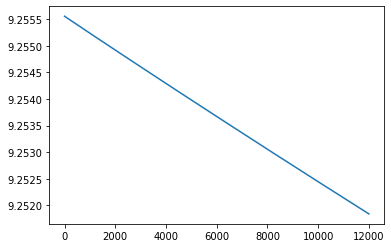

Weight value is  [[ 1.49875064e-05 -2.05620296e-04  1.36110688e-03  3.81011198e-03
   7.76907668e-04 -2.52695510e-03 -1.72437978e-04  2.55499386e-03
   5.36694962e-03  3.22543017e-03  1.24158905e-04 -6.55394479e-04
   1.54841183e-03  3.31152694e-03  1.89812151e-03  1.47006291e-04
  -7.85033460e-04  1.73511860e-03  2.10986735e-03  3.80058427e-03
  -8.44042121e-04 -6.87008128e-04  1.29077034e-03  3.08662927e-03
   8.37638570e-04 -2.07452546e-04 -1.32802729e-03  4.31686576e-04
   2.49314635e-03  9.71653620e-04 -1.08742933e-03  3.18868355e-04
   4.69026043e-04 -3.05474428e-03 -6.45077567e-04 -2.61705446e-03
  -5.67671787e-03 -5.08905652e-03 -1.57820912e-03  6.86156363e-04
   5.45868562e-04 -3.06059703e-03 -3.37888595e-03  6.97019352e-03
   4.41070655e-04 -2.09818060e-03 -3.86880739e-03  2.16575488e-04
   2.58094221e-03 -1.37702516e-03  1.64724463e-03 -1.97941607e-03
  -7.73686821e-04  2.27822382e-03 -2.04210758e-03 -1.02380646e-03
  -9.29936058e-04  8.94957926e-04 -1.87447133e-03 -6.251372

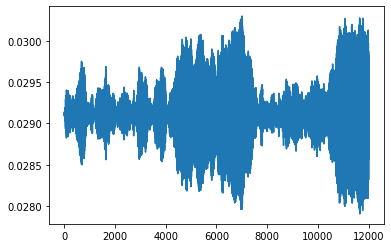

Weight value is  [[-0.00192167 -0.00162703  0.00091825  0.00335429  0.00045088 -0.00311528
  -0.00130704  0.00188486  0.0049123   0.00278905 -0.00088258 -0.00160339
   0.0013537   0.00283376  0.00160033 -0.00058345 -0.00175646  0.00140009
   0.0020006   0.00353167 -0.00151388 -0.00185178  0.00134232  0.00273213
   0.00048208 -0.00074331 -0.00213749  0.00038564  0.00259962  0.00085717
  -0.00185455 -0.00027975 -0.00037636 -0.00342496 -0.00224563 -0.00406259
  -0.00656897 -0.00618054 -0.0023027  -0.00083374 -0.00120378 -0.00343669
  -0.00443738  0.00557322 -0.00156273 -0.00350948 -0.00434318 -0.00048883
   0.00147247 -0.00314531  0.00052409 -0.00226815 -0.00148524  0.00058857
  -0.0036112  -0.0025393  -0.00124064 -0.00076158 -0.00326638 -0.00255956
   0.00077387]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

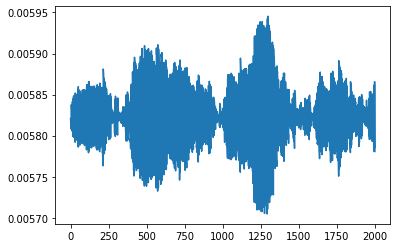

Weight value is  [[ 7.04168576e-04 -4.81268206e-05  1.75109368e-04  6.31920384e-04
   3.08759024e-04 -9.43596924e-05 -2.51649791e-04  1.38008121e-04
   6.68186637e-04  4.75553036e-04  1.67379651e-05  2.44803946e-05
   1.75832262e-04  8.63790244e-04  6.26410968e-04  2.77641888e-04
   4.83056520e-04  4.46067266e-04  5.17155605e-04  8.54572136e-04
   2.27836288e-04  5.81478364e-06 -9.06251785e-06  7.17743905e-04
   4.49231187e-04  3.44874476e-04 -1.00678061e-04  2.39506418e-05
   4.75908332e-04  5.84778190e-04  2.58303909e-04  1.20214499e-03
   1.91609727e-04  1.21236634e-04  6.87150794e-04  1.02190690e-04
   6.30653313e-05 -7.03304258e-04  3.62119258e-04  8.87125830e-04
   5.45899256e-04  4.46469110e-04 -9.84251701e-05  1.82859107e-03
   5.95104521e-04 -2.16432638e-04  4.03027298e-04  1.83097247e-05
   6.25496278e-04  4.52465878e-04  3.65727510e-04  6.30877023e-04
  -2.87269661e-04  3.14529835e-04  2.12477220e-04 -1.08112134e-04
   1.06171431e-03  9.38143297e-04 -7.45403215e-05  4.956982

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


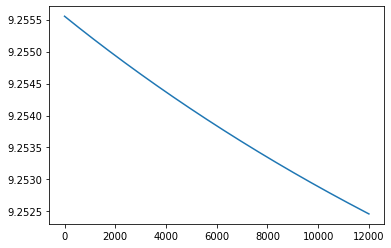

Weight value is  [[ 3.20311578e-06 -1.75126683e-04  1.14279674e-03  3.20052174e-03
   6.51188309e-04 -2.12304988e-03 -1.47396056e-04  2.14539995e-03
   4.50824078e-03  2.70779959e-03  1.03252529e-04 -5.54216854e-04
   1.29992711e-03  2.78135763e-03  1.59238094e-03  1.21857432e-04
  -6.63590591e-04  1.45688739e-03  1.77242188e-03  3.19048202e-03
  -7.10172066e-04 -5.81412081e-04  1.08302088e-03  2.59197882e-03
   7.01835691e-04 -1.75704857e-04 -1.12024717e-03  3.61225401e-04
   2.09353868e-03  8.14586612e-04 -9.14727994e-04  2.60809498e-04
   3.85268875e-04 -2.57302651e-03 -5.49956039e-04 -2.20481506e-03
  -4.77606822e-03 -4.28323142e-03 -1.33294155e-03  5.67973102e-04
   4.53159467e-04 -2.57780979e-03 -2.84591591e-03  5.84877586e-03
   3.62550717e-04 -1.76806076e-03 -3.25688267e-03  1.73955661e-04
   2.16162237e-03 -1.16407619e-03  1.37836217e-03 -1.66941153e-03
  -6.57403471e-04  1.90786607e-03 -1.72282467e-03 -8.64949588e-04
  -7.87869099e-04  7.44488991e-04 -1.57997384e-03 -5.327719

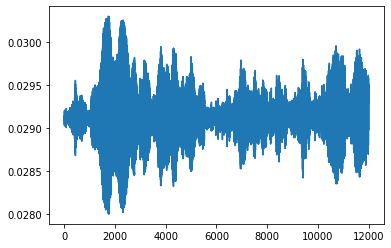

Weight value is  [[-4.97367605e-04  2.44844012e-04  1.50970601e-03  3.46601855e-03
   9.74465175e-04 -2.06606451e-03  7.24423123e-05  2.72548945e-03
   5.08421824e-03  2.97594898e-03  4.32698313e-04 -5.29686250e-04
   1.08630630e-03  2.73546479e-03  1.49755558e-03 -4.11466796e-05
  -7.16737099e-04  1.64584748e-03  2.37191123e-03  3.34446335e-03
  -6.66883944e-04 -9.50201889e-04  7.70025626e-04  3.01540597e-03
   4.47847567e-04 -1.53954045e-04 -1.34331510e-03  4.14336950e-04
   2.94382908e-03  9.19755868e-04 -8.83024520e-04 -9.15486454e-04
   1.00843268e-04 -2.99037318e-03 -1.29624043e-03 -2.68859879e-03
  -6.86976258e-03 -4.94483581e-03 -1.78198070e-03 -6.46761315e-05
   2.12429080e-04 -3.81472213e-03 -3.28498735e-03  5.77516687e-03
  -2.24042709e-04 -1.87637509e-03 -4.93572290e-03 -3.79596711e-04
   2.14212367e-03 -1.44523064e-03  1.63539930e-03 -2.23921948e-03
  -9.95923979e-04  1.40628301e-03 -2.23783783e-03 -1.08182132e-03
  -1.67171482e-03  3.39906691e-04 -2.22646927e-03 -1.009867

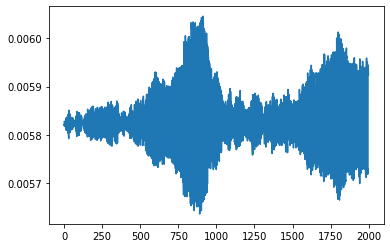

Weight value is  [[-1.44412427e-03 -6.16471069e-04 -2.06484099e-04  1.19706997e-04
  -2.35576213e-04 -5.46356627e-04 -7.27008480e-04 -1.97143442e-04
   4.06735910e-04  3.17076943e-04 -2.08951517e-04 -6.49215833e-04
  -1.42624991e-04  1.82231076e-04  9.90373411e-05 -1.89460771e-04
  -1.01296115e-03 -3.16027222e-04 -9.14019338e-05  2.71654320e-04
  -4.87873108e-04 -6.95770376e-04 -1.41566941e-05  1.90962537e-04
  -1.62881207e-04 -2.39308305e-04 -9.08182876e-04 -3.59785902e-04
  -5.10445988e-05 -3.16217667e-05 -4.03142004e-04 -1.07368803e-03
  -8.52126398e-04 -1.13755917e-03 -1.27811209e-03 -1.62235768e-03
  -1.40388916e-03 -1.79420346e-03 -1.47536364e-03 -1.46169234e-03
  -8.14989046e-04 -1.46550117e-03 -1.10777222e-03  1.29666496e-04
  -1.22133979e-03 -4.15778111e-04 -1.11506451e-03 -9.65266143e-04
  -6.86824909e-04 -1.46141902e-03 -3.23081429e-04 -1.10634194e-03
  -1.14395089e-03 -4.23755539e-04 -1.45911731e-03 -5.86703710e-04
  -6.18290814e-04 -8.15678637e-04 -1.08179599e-03 -1.260714

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

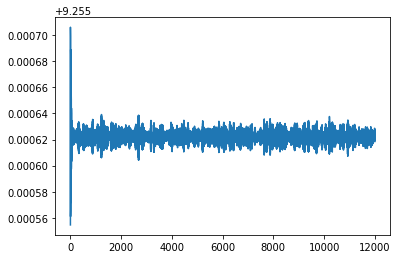

Weight value is  [[-2.29846491e-06  2.14345535e-06  1.20295920e-05  9.72299783e-06
   7.70348089e-06  1.04285795e-05  5.04109730e-06 -1.09754551e-05
  -8.01536909e-06  3.59144259e-06  1.10750728e-05  4.85811019e-07
   3.96115088e-06 -1.11862777e-05  5.39948358e-06 -5.29288102e-06
   1.01681748e-05 -9.36645055e-06  2.71859688e-06 -3.59536419e-06
   3.57475074e-06 -5.75383315e-06  9.49076405e-06 -1.05021159e-05
  -5.60019260e-07  9.46948615e-06 -5.94006813e-06  5.51689342e-06
  -3.05877730e-06 -8.70426718e-06 -3.20872075e-06  8.05658239e-06
   1.19470165e-05 -7.76360487e-06 -1.69236099e-06  3.76735692e-06
  -4.69161126e-06 -1.16383101e-05  8.34561651e-06  8.58630248e-06
  -8.38222182e-06  6.67142925e-07  1.23596334e-05  4.80066409e-06
   1.12951538e-05 -1.10101110e-05 -5.77724792e-06 -9.87138022e-06
  -3.60074497e-06  1.27322675e-06  1.17512447e-05  9.43203110e-06
  -1.34371176e-05  1.40530492e-06 -1.33294013e-05  2.01694671e-06
   9.63141492e-06 -1.23812994e-05 -1.39211521e-05 -3.739506

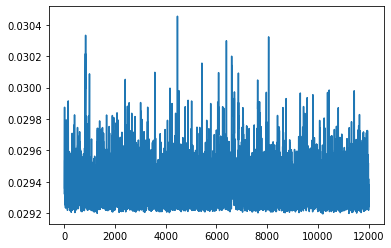

Weight value is  [[-4.75622016e-05 -2.52832320e-05 -2.66204337e-05 -2.18285414e-05
  -2.34288107e-05 -2.27912772e-05 -1.91558458e-05 -3.08210472e-05
  -1.25193681e-05 -9.54967558e-06 -2.38382443e-05 -8.36677369e-06
  -2.08923272e-05 -1.29307938e-05 -1.87831642e-05 -1.35045413e-05
  -1.62561493e-05 -2.74861068e-05 -1.12683795e-05 -1.43414605e-05
  -1.21894574e-05 -1.02258141e-05 -1.52596020e-05 -2.13840569e-05
  -7.40712992e-06 -2.56241212e-06 -2.49729453e-05 -2.60323550e-05
  -3.24118671e-05  1.42168883e-07  8.19611619e-06 -2.48347198e-05
  -3.43318452e-05 -3.51781209e-05 -4.65150936e-05 -4.17072870e-05
  -2.63145662e-05 -1.92691273e-05 -2.10205825e-05 -4.20091494e-05
  -1.34619259e-05 -1.73342986e-05 -3.61170947e-05 -1.86140127e-05
  -3.65967515e-05 -1.92186993e-05 -2.57808492e-05 -3.37335938e-05
  -1.75100631e-05 -4.31003825e-05 -2.40543200e-05 -3.48675889e-05
  -4.69840455e-05 -1.59412326e-05 -3.25167691e-05 -2.77257921e-05
  -8.10466571e-06 -3.23287799e-05 -2.32844530e-05 -4.423045

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

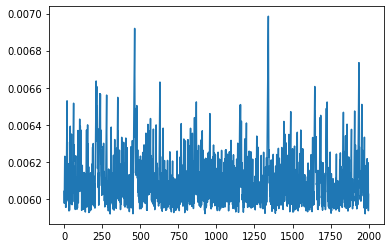

Weight value is  [[ 3.62844671e-05  7.40918518e-06  9.75956949e-06  1.50051143e-05
   2.30011199e-05  1.25326154e-07  7.06750897e-06  1.54665752e-05
   2.14297506e-05 -3.24343466e-06  1.44490870e-05  1.74006572e-05
   3.39500415e-05  2.52499239e-05  2.19995313e-05 -4.62953023e-06
   1.65589100e-05  1.76340789e-05  8.53719335e-06  1.55130692e-05
   1.19491327e-05  3.10437971e-05  3.80998857e-05  1.89208418e-05
   3.03171847e-05  9.36651988e-06  6.25095721e-06  1.68614148e-05
   1.91271511e-05  4.31315183e-06  1.08110923e-05  4.18636680e-05
   3.24375907e-05  3.98866806e-05  4.28859027e-05  4.01293675e-05
   1.65220721e-06  2.19008901e-05  1.22259802e-05  5.07816780e-05
   1.58820984e-05  1.75257441e-05  2.24828929e-05  4.52457972e-05
   3.72832034e-05  3.03238185e-05  5.41634782e-06  2.90979695e-05
   1.08539518e-05  3.39468252e-05  2.36992960e-05  6.23049844e-06
   1.43812454e-05  4.31065115e-05  4.41782973e-05  2.54030406e-05
   1.87339201e-05  2.33529291e-05  3.45022698e-05  5.079238

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


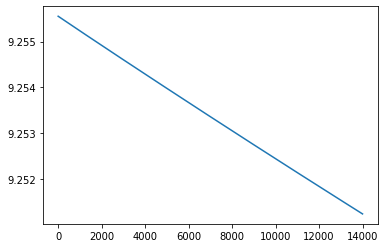

Weight value is  [[ 3.35202038e-05 -2.39069289e-04  1.58227884e-03  4.43419803e-03
   9.04495947e-04 -2.94840572e-03 -1.99608903e-04  2.97362705e-03
   6.25033049e-03  3.75982054e-03  1.44113759e-04 -7.59009870e-04
   1.80027832e-03  3.85490565e-03  2.21357587e-03  1.73233411e-04
  -9.08394031e-04  2.01811949e-03  2.45322751e-03  4.43154212e-03
  -9.83480109e-04 -7.92624450e-04  1.50213474e-03  3.59406306e-03
   9.76517070e-04 -2.40055065e-04 -1.53940720e-03  5.00380453e-04
   2.90195280e-03  1.13244461e-03 -1.26683844e-03  3.89354544e-04
   5.68513507e-04 -3.54575169e-03 -7.37376041e-04 -3.03937865e-03
  -6.59970617e-03 -5.91260812e-03 -1.82274047e-03  8.15861811e-04
   6.46860461e-04 -3.55191595e-03 -3.92153197e-03  8.13995107e-03
   5.28380461e-04 -2.43628484e-03 -4.49366301e-03  2.71998673e-04
   3.02251205e-03 -1.59314047e-03  1.93012445e-03 -2.29225516e-03
  -8.85124474e-04  2.66740842e-03 -2.36876158e-03 -1.18596389e-03
  -1.06888987e-03  1.05954889e-03 -2.17526218e-03 -7.158575

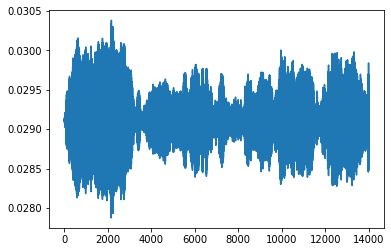

Weight value is  [[ 1.69110361e-03 -4.37715928e-04  1.77408764e-03  4.15429647e-03
   1.17191110e-03 -3.07901283e-03 -6.20120424e-06  3.45744618e-03
   6.32265257e-03  4.12065346e-03 -2.64452628e-04 -4.93362865e-04
   2.28687920e-03  3.95880050e-03  2.40585400e-03  5.71831479e-04
  -3.32438152e-04  2.55608750e-03  2.51022156e-03  4.55136878e-03
  -7.01304297e-04 -5.21158519e-04  2.49219442e-03  4.09252706e-03
   1.21115293e-03 -1.27114922e-04 -9.82062570e-04  1.53935115e-03
   3.35111342e-03  1.44081551e-03 -9.91221199e-04  1.69425313e-03
   2.20544337e-03 -2.00862800e-03  4.93588914e-04 -1.72926481e-03
  -5.48818809e-03 -4.30408369e-03 -9.91178974e-04  2.07188225e-03
   9.08690713e-04 -2.48387049e-03 -2.91150352e-03  9.49432347e-03
   1.87559798e-03 -1.88642711e-03 -2.98332936e-03  1.35320688e-03
   4.27287745e-03 -1.67566979e-05  2.34778630e-03 -9.07153826e-04
  -9.72359684e-05  3.85612162e-03 -1.02598060e-03 -3.46104890e-04
   6.42205264e-05  2.00289314e-03 -1.50816504e-03  7.746424

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


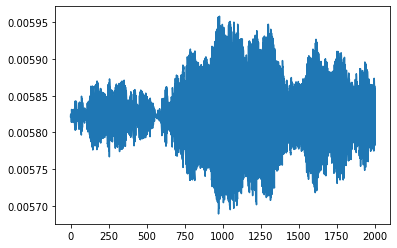

Weight value is  [[-5.95765100e-04 -9.38365247e-04  3.18899704e-04  1.06342290e-03
   9.97717517e-05 -3.84514195e-04 -8.20766289e-04  3.87820666e-04
   1.36374408e-03  4.86901432e-04  2.81058082e-05 -1.20111386e-03
  -1.26854466e-04  6.34603951e-04  1.43505323e-04 -1.68402269e-04
  -8.05796258e-04  4.03524273e-04  7.70594781e-04  6.42842631e-04
  -1.08068443e-04 -6.77117381e-04  1.22892636e-04  7.55973054e-04
   1.35128054e-04 -2.70692218e-05 -6.78278004e-04  1.91126260e-04
   7.17001860e-04  2.10913594e-04 -3.94331020e-05  1.58376375e-04
  -4.93096625e-04 -1.05856277e-03 -5.02433124e-04 -5.25469819e-04
  -1.24967858e-03 -1.42627621e-03 -8.29922356e-04 -3.67203609e-04
  -1.58761814e-04 -7.27831290e-04 -8.00589776e-04  6.35980037e-04
  -4.18301034e-04 -3.98199654e-04 -7.94916076e-04 -2.98824816e-04
  -4.56949003e-04 -6.94607902e-04  1.06972688e-04 -6.06535987e-04
  -3.83641178e-04 -4.16573117e-04 -7.58482585e-04 -9.86517118e-05
  -4.61598999e-04 -3.35764970e-04 -6.67239740e-04 -5.856467

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

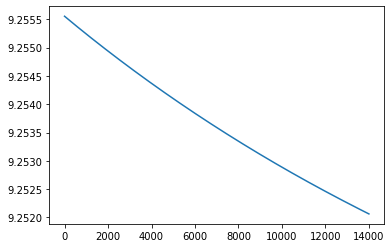

Weight value is  [[ 1.57522004e-05 -1.97771930e-04  1.29257640e-03  3.62314622e-03
   7.37593026e-04 -2.40843842e-03 -1.65790849e-04  2.42889589e-03
   5.10645007e-03  3.06967744e-03  1.16769162e-04 -6.24380337e-04
   1.47049331e-03  3.14932733e-03  1.80600140e-03  1.39619012e-04
  -7.47126456e-04  1.64853624e-03  2.00494509e-03  3.61775171e-03
  -8.04592921e-04 -6.52934045e-04  1.22615804e-03  2.93560678e-03
   7.95884818e-04 -1.97781321e-04 -1.26338886e-03  4.07751205e-04
   2.37037933e-03  9.23474235e-04 -1.03621641e-03  3.08531056e-04
   4.52627129e-04 -2.90552795e-03 -6.12459704e-04 -2.49080152e-03
  -5.40109699e-03 -4.84092569e-03 -1.49853898e-03  6.55802536e-04
   5.21545631e-04 -2.91052363e-03 -3.21338723e-03  6.64089425e-03
   4.21672738e-04 -1.99701551e-03 -3.68002383e-03  2.11476469e-04
   2.46063523e-03 -1.31042282e-03  1.56991838e-03 -1.88126351e-03
  -7.32872710e-04  2.17140735e-03 -1.94402412e-03 -9.74756649e-04
  -8.81970980e-04  8.55938411e-04 -1.78366189e-03 -5.942053

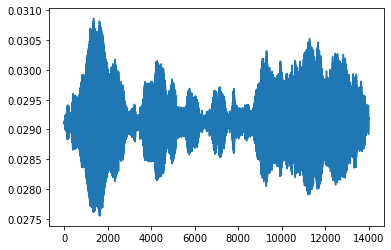

Weight value is  [[ 3.71228718e-04 -7.89939970e-04  1.28979106e-03  4.24267752e-03
   1.03017264e-03 -2.24848435e-03  2.67056944e-04  2.57592135e-03
   5.92500987e-03  3.25322767e-03  3.19105477e-04  4.69065711e-06
   1.75386235e-03  3.77407136e-03  2.10079947e-03  5.04261082e-04
  -4.74810812e-06  1.79147907e-03  2.59600620e-03  3.75901369e-03
  -4.87056662e-04 -1.18506071e-04  1.10066471e-03  3.10401342e-03
   8.10038142e-04  5.30781879e-06 -4.95862220e-04 -9.14252565e-05
   2.60812430e-03  8.36104561e-04 -8.36574850e-04  6.34091600e-04
   6.15445534e-04 -2.59970855e-03 -1.22064380e-04 -2.37368037e-03
  -5.67607894e-03 -4.87902312e-03 -9.92780107e-04  1.24421866e-03
   4.17090600e-04 -3.53177034e-03 -3.36915524e-03  6.94760020e-03
   5.81727576e-04 -2.08864057e-03 -3.31900331e-03 -6.13735554e-05
   2.62032965e-03 -9.67476079e-04  1.89571922e-03 -2.63295112e-03
  -9.23135103e-04  2.06263411e-03 -1.84289512e-03 -1.31673555e-03
  -5.88345551e-04  8.99095607e-04 -1.81365859e-03 -3.830687

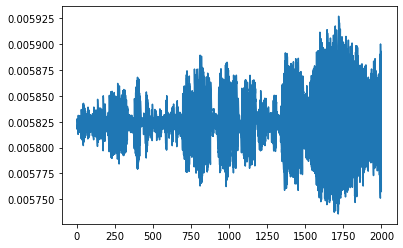

Weight value is  [[-1.00937138e-03 -6.58902467e-04  4.65425001e-05  5.14577214e-04
   1.07541220e-04 -4.39195161e-04 -6.28446521e-04  1.42365722e-04
   7.30362139e-04  4.44459840e-04 -1.16577349e-04 -8.49692376e-04
   2.34406296e-04  6.85922270e-04  2.30139955e-04 -5.22322278e-04
  -1.25295711e-03  2.20459098e-06  2.85382469e-04  3.28768835e-04
  -4.23080844e-04 -1.17415865e-03  2.61912466e-04  8.86441506e-04
   1.71766512e-04 -4.45935038e-04 -1.29417868e-03  1.01144516e-04
   7.98559398e-04  4.97918958e-05 -4.71502987e-04 -3.82851906e-04
  -5.14445338e-04 -1.16872883e-03 -1.03326121e-03 -1.11406571e-03
  -1.07964263e-03 -1.41221924e-03 -8.24304621e-04 -9.31959618e-04
  -5.98983985e-04 -3.76038616e-04 -1.62445386e-03  4.24298507e-04
  -7.93618973e-04 -9.45352700e-04 -4.17227477e-04 -7.92786835e-04
   2.02842167e-04 -1.09193337e-03  4.06049678e-04 -4.08369295e-04
  -5.60187302e-04 -8.59112305e-04 -1.40383411e-03 -4.45581244e-04
  -3.33192173e-04 -6.92951824e-04 -7.09394801e-04 -1.038585

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

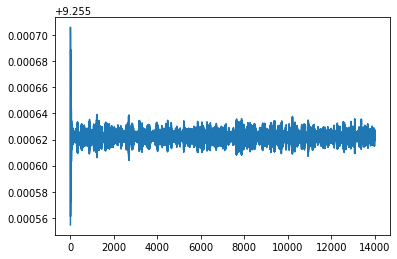

Weight value is  [[-5.23274902e-06  4.97926918e-06 -1.34831805e-05  3.82280298e-06
   1.46994758e-06 -3.43281219e-07  1.33605550e-05  9.67330361e-06
   8.13045579e-06 -1.33273330e-05 -9.59113008e-06  1.30442601e-05
   7.10010972e-06 -1.05699730e-05  3.78047070e-06  6.31343668e-06
  -6.59720282e-07 -3.44716964e-06 -1.43447608e-05  1.32864699e-05
   1.66030126e-06  7.66734110e-07 -1.44778019e-06  1.02270266e-05
   1.82857071e-06 -6.46194911e-06  1.05471239e-05 -1.08622299e-06
   8.91124669e-06 -1.26722187e-05  1.37461284e-05 -8.12534697e-06
   1.14088297e-05  8.41376895e-06 -1.45163179e-05  1.86174307e-06
  -8.00080966e-06 -1.11067830e-05  2.20989903e-06  7.47545696e-06
  -1.23055791e-05 -1.17477546e-05  1.89115746e-06 -6.92523028e-06
   6.35549199e-07 -1.03745172e-05 -4.26645658e-06  1.09568711e-05
  -1.72884524e-06 -1.10555630e-05  1.11822268e-05 -1.52197906e-06
  -8.20630348e-06  1.41110506e-05  1.19067208e-05  4.82408824e-06
  -6.29021294e-06  3.02615138e-06 -3.76835420e-06 -1.190478

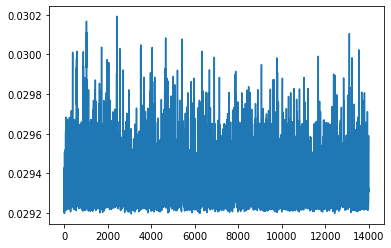

Weight value is  [[ 3.36376375e-05 -3.50387396e-05 -1.94788786e-05 -2.50727329e-05
  -2.21770612e-06 -1.92749125e-05 -1.34869441e-05 -2.84738377e-05
  -3.01196953e-05 -1.89823807e-05 -1.44013366e-05 -1.68318473e-05
  -2.50404476e-05 -1.30997564e-05 -2.48027624e-05 -5.51089576e-06
  -1.89322139e-05 -2.94178219e-05 -2.72298193e-05 -3.00645582e-05
  -2.39466563e-05 -1.70876876e-05 -3.79957676e-05 -2.79380967e-05
  -2.01492986e-05 -2.34600275e-05 -1.41816061e-05 -2.44428723e-05
  -1.60594194e-05 -2.02684350e-05 -1.46534817e-05 -1.93094938e-05
  -3.34159192e-05 -4.05029237e-05  7.37812423e-06 -2.49467694e-05
  -2.14628161e-05 -1.12740052e-05 -1.72386467e-05  5.36581902e-06
  -4.10124459e-05 -1.22989012e-05 -4.44300787e-05 -2.65515250e-05
  -1.23406046e-05 -2.28482196e-05 -1.35258287e-05 -2.28565100e-05
  -4.14121342e-05 -6.55219367e-06 -4.13269719e-05 -1.90902047e-05
  -3.74088340e-05 -3.99431356e-05  9.06822287e-06 -2.92509849e-05
  -3.33484290e-05 -3.71756163e-05 -2.45034443e-05 -6.451240

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

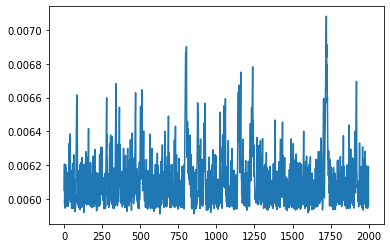

Weight value is  [[ 2.35715438e-05 -3.04744640e-06 -5.04398895e-06 -1.88057761e-05
   4.54086872e-06 -1.93154686e-05  2.76851962e-06  5.78763588e-06
  -1.01407348e-05  4.99878689e-06 -7.04064937e-06  4.88580674e-06
  -1.88853895e-05 -2.01629372e-05  1.87447416e-05  1.90963917e-06
  -2.47828841e-06 -1.26576517e-05  7.35982506e-06  3.54180471e-05
   2.50117111e-06 -1.58267803e-05  1.44196733e-05 -1.48523374e-05
   9.12600274e-06 -1.45065632e-05  1.05535527e-05 -4.37888855e-06
   1.40935623e-06 -1.18392883e-06 -1.76916066e-05 -3.54409800e-05
   2.48225785e-05 -3.94237235e-06  1.81519532e-05  1.60584048e-05
  -3.23766951e-05 -8.72990333e-06 -1.33995429e-05  3.55785695e-05
   2.58894995e-06 -3.94703974e-05 -2.32919337e-06 -4.69270517e-06
   2.54220873e-05 -5.09369760e-06 -2.10202277e-05  1.00311450e-05
   7.06705902e-06  2.76855538e-05  1.80514483e-05 -3.53870972e-05
  -8.55059019e-06  3.80324240e-05  3.78043778e-05  2.42206099e-05
  -7.92276466e-06  8.93434798e-06  9.94986565e-06  4.640575

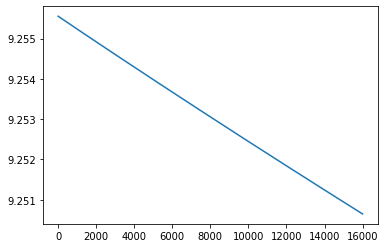

Weight value is  [[ 5.21353116e-05 -2.74160656e-04  1.80040433e-03  5.05349489e-03
   1.03007165e-03 -3.37076980e-03 -2.28167500e-04  3.38843499e-03
   7.12907378e-03  4.29184581e-03  1.62847247e-04 -8.63035911e-04
   2.04869523e-03  4.39430791e-03  2.52717531e-03  1.98978927e-04
  -1.03166221e-03  2.29781599e-03  2.79291943e-03  5.06020758e-03
  -1.12343383e-03 -8.97569183e-04  1.71080744e-03  4.09785574e-03
   1.11366643e-03 -2.72923633e-04 -1.75000744e-03  5.66354104e-04
   3.30723242e-03  1.29146814e-03 -1.44660074e-03  4.62612670e-04
   6.71351399e-04 -4.03419006e-03 -8.29022497e-04 -3.46071122e-03
  -7.51853312e-03 -6.73184869e-03 -2.06443399e-03  9.46251585e-04
   7.48406001e-04 -4.04020311e-03 -4.46098044e-03  9.30965999e-03
   6.15941019e-04 -2.77367317e-03 -5.11518671e-03  3.30371329e-04
   3.46482313e-03 -1.80903354e-03  2.21294605e-03 -2.60256569e-03
  -9.94293067e-04  3.05676592e-03 -2.69521823e-03 -1.34824327e-03
  -1.20566652e-03  1.22584291e-03 -2.47515222e-03 -8.064254

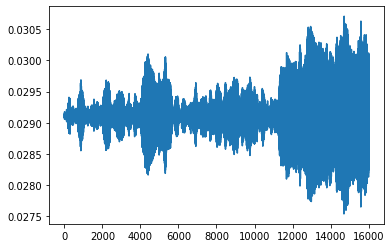

Weight value is  [[-2.37726512e-03 -1.53104716e-03  9.71543345e-04  4.22139401e-03
  -4.79536536e-06 -3.77927760e-03 -1.38339990e-03  3.01530186e-03
   6.87588284e-03  3.47749830e-03  1.51564439e-04 -1.80845459e-03
   1.54251351e-03  3.91627654e-03  1.06112098e-03  2.49679204e-04
  -1.84335225e-03  2.06583636e-03  2.60653680e-03  4.06887306e-03
  -1.20509374e-03 -1.76199658e-03  1.44001887e-03  3.89440681e-03
  -2.56489536e-04 -6.28535889e-04 -2.42013799e-03  1.76883389e-04
   3.11376749e-03  9.66232403e-06 -1.38337031e-03 -5.80480147e-05
  -8.62387439e-04 -5.27383215e-03 -3.09342525e-03 -4.88467071e-03
  -8.95609332e-03 -8.95779784e-03 -3.63597938e-03 -1.28601642e-03
   2.98624489e-05 -5.57198452e-03 -6.91538851e-03  7.95765513e-03
  -1.64526429e-03 -3.96535064e-03 -6.27415063e-03 -1.69170652e-03
   1.84499279e-03 -3.75770089e-03  4.76473470e-04 -3.56919868e-03
  -3.44290607e-03  2.09661002e-03 -5.06435842e-03 -2.87037783e-03
  -2.43736188e-03 -1.12748039e-03 -4.00175685e-03 -2.869181

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

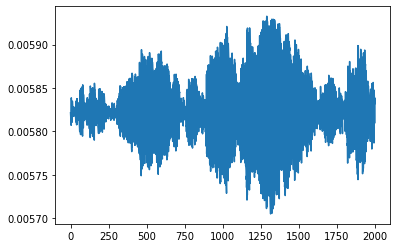

Weight value is  [[-8.25155978e-05  3.78218020e-04  6.06045984e-04  1.41717679e-03
   3.66517121e-05 -2.59404829e-04  2.42425867e-04  6.43913881e-04
   9.50254950e-04  4.10321922e-04  1.45667636e-05 -9.56214528e-05
  -8.99245318e-05  6.79173809e-04  1.01452457e-04  5.12896503e-05
  -1.06245158e-04  2.44355755e-05  8.45807693e-05  2.47183046e-04
  -9.11453533e-05 -2.13083444e-04  2.18114469e-05  7.67248049e-04
  -2.94659605e-04 -2.74759258e-05 -4.78731779e-04 -3.70495604e-04
   1.07809294e-04 -2.81039669e-04 -2.45297995e-04  4.62239571e-04
  -3.63161384e-04 -1.38679554e-03  7.21915121e-06 -5.64407927e-04
  -1.22020886e-03 -1.47009979e-03 -7.75107848e-04 -6.29293659e-05
   4.90749348e-04 -1.52081423e-04 -6.04693358e-04  7.48165168e-04
   5.23748479e-05 -5.58690038e-04 -7.29894112e-04 -1.62736230e-04
  -1.04415034e-06 -1.03005951e-04 -2.98012664e-04 -3.16892876e-04
   6.61295367e-04  7.12996994e-04 -2.88660251e-04 -8.21506142e-04
  -3.89931102e-04  4.50717818e-04 -5.84816231e-04  2.737677

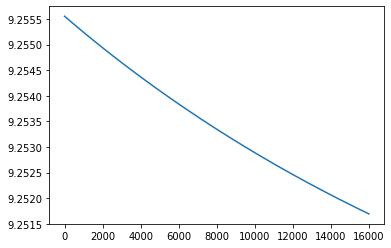

Weight value is  [[ 2.76236484e-05 -2.20145643e-04  1.43169065e-03  4.01810440e-03
   8.17682477e-04 -2.67778946e-03 -1.83999194e-04  2.69344262e-03
   5.66686431e-03  3.40897266e-03  1.28719802e-04 -6.90719400e-04
   1.62892652e-03  3.49333193e-03  2.00599858e-03  1.56039189e-04
  -8.25738305e-04  1.82691691e-03  2.22158766e-03  4.01867698e-03
  -8.93843864e-04 -7.19862260e-04  1.35924291e-03  3.25690112e-03
   8.83354273e-04 -2.18741708e-04 -1.39769698e-03  4.49832845e-04
   2.62884867e-03  1.02489359e-03 -1.15085493e-03  3.55241666e-04
   5.18199929e-04 -3.21702686e-03 -6.70907031e-04 -2.75950034e-03
  -5.98707205e-03 -5.36339204e-03 -1.65268235e-03  7.38954068e-04
   5.86302663e-04 -3.22192755e-03 -3.55741867e-03  7.38685196e-03
   4.77512143e-04 -2.21217985e-03 -4.07639746e-03  2.48693688e-04
   2.74270780e-03 -1.44810454e-03  1.75028229e-03 -2.07916503e-03
  -8.02499353e-04  2.41971160e-03 -2.15221536e-03 -1.07824639e-03
  -9.69203839e-04  9.61983991e-04 -1.97491303e-03 -6.519633

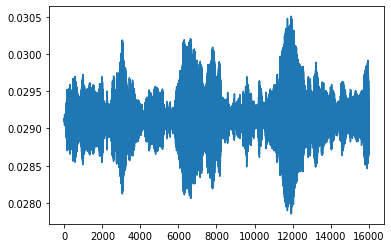

Weight value is  [[ 1.52445292e-03 -6.21897571e-04  2.05130489e-03  4.76148946e-03
   1.40448920e-03 -2.49105574e-03  5.07451633e-05  3.12058921e-03
   6.33501777e-03  3.83878370e-03  5.88543555e-04 -5.05234554e-04
   2.11053043e-03  3.50643210e-03  2.34434951e-03  3.93135174e-04
  -4.34006942e-04  2.13020925e-03  2.44079026e-03  4.51034405e-03
  -7.86997450e-04 -2.42190499e-04  2.12474807e-03  3.56687163e-03
   1.60869457e-03  1.85631399e-04 -7.87674053e-04  1.07353437e-03
   3.26985871e-03  1.79447703e-03 -8.81555645e-04  1.36643179e-03
   1.52222249e-03 -2.17768685e-03  4.40901577e-04 -1.90208114e-03
  -5.22630070e-03 -4.55913234e-03 -7.12368555e-04  1.92840249e-03
   1.49401503e-03 -2.13131826e-03 -2.78383528e-03  8.69191766e-03
   1.57511501e-03 -1.28494645e-03 -2.82170897e-03  9.09845147e-04
   4.25582183e-03 -2.13579642e-04  2.27884474e-03 -1.03168522e-03
  -1.65835603e-06  3.14538287e-03 -8.63304565e-04 -5.92580305e-04
   4.28245760e-04  1.35998789e-03 -1.53838106e-03  4.912160

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


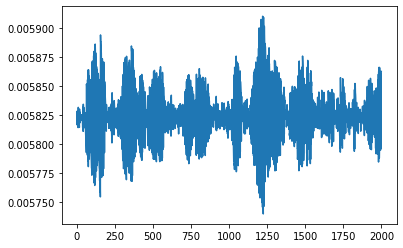

Weight value is  [[-4.38715189e-04  1.59594609e-04  5.13304371e-04  7.99823608e-04
  -4.35168976e-05 -6.04536697e-04 -6.34745475e-05  4.05665364e-04
   6.54443823e-04  7.03059788e-05  1.16726291e-05 -1.19711947e-04
   5.49808464e-04  4.91946280e-04  2.32929985e-04 -4.82113846e-04
  -3.01795509e-04 -6.40633650e-05  9.64626206e-05  2.98600016e-04
  -1.05671536e-04 -3.92380391e-04  1.60907631e-04  4.77098235e-04
   3.35388305e-05 -9.01016660e-05 -5.50522806e-04 -3.07202998e-04
   2.01337633e-04  9.09812873e-05 -3.50823814e-04 -4.05348197e-04
  -2.08810388e-04 -8.04955679e-04 -5.71612798e-04 -6.29151382e-04
  -1.42963999e-03 -1.08208809e-03 -2.69697858e-05 -3.12842016e-04
  -7.32612698e-06 -4.75983877e-04 -9.65253836e-04  9.69293835e-04
  -2.88374083e-04 -3.74506025e-04 -1.50144763e-03 -3.92225190e-04
   3.86061279e-04 -5.50982981e-04  4.43636322e-04 -4.36182029e-04
   7.69296525e-05  1.82782936e-04 -7.25271151e-04 -1.06351254e-03
  -4.55503042e-04  2.86706778e-04 -6.87251400e-04 -5.841072

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

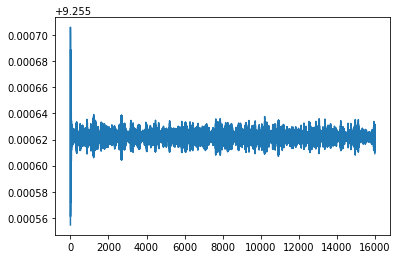

Weight value is  [[-8.12379637e-06  7.83223837e-06 -8.98183981e-06 -2.06105904e-06
  -4.74932546e-06 -1.11083193e-05 -8.30364295e-06  3.39310874e-07
  -5.70960511e-06 -2.32224740e-07 -2.49594068e-07 -4.37889708e-06
   1.02560745e-05 -9.93841982e-06  2.17695706e-06 -1.20722978e-05
  -1.14691168e-05  2.48772241e-06 -1.39518828e-06  1.83767354e-07
  -2.46842159e-07  7.30458418e-06 -1.23694458e-05  9.72718380e-07
   4.23205599e-06  7.61375766e-06 -2.94642289e-06 -7.67058881e-06
  -9.10240236e-06  1.33740605e-05  7.08600470e-07  5.71324740e-06
   1.08970076e-05 -5.38353533e-06  2.69534550e-06 -1.54189030e-08
  -1.12865534e-05 -1.05489213e-05 -3.90194621e-06  6.40027732e-06
   1.37934483e-05  5.85963775e-06 -8.55205109e-06  1.13716199e-05
  -9.98828419e-06 -9.71412408e-06 -2.73311884e-06  1.81006679e-06
   1.67252280e-07  6.65031159e-06  1.06365527e-05 -1.24536907e-05
  -2.94974424e-06 -3.15885227e-06  7.17860472e-06  7.65546556e-06
   7.81111625e-06 -1.15407588e-05  6.40748868e-06  9.965448

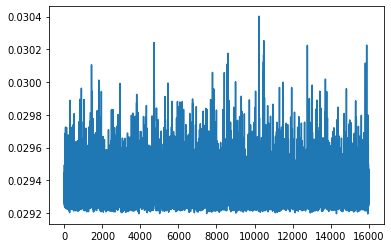

Weight value is  [[-5.81238947e-05 -9.64597382e-06 -1.62371534e-05 -3.09754630e-05
  -1.94230217e-05 -1.78278469e-05 -1.27168078e-05 -2.57361605e-05
  -1.34364663e-05 -3.27166361e-05 -5.86651819e-06 -3.56736558e-05
  -2.80714357e-05 -2.06354653e-05 -2.06368977e-05 -4.70747588e-06
  -2.00272413e-05 -1.77301125e-05 -7.70084524e-06 -3.10135602e-06
  -9.69557930e-06 -1.09111795e-05 -1.30754913e-05 -3.83077707e-06
  -2.24762239e-05 -2.33972776e-05 -3.61511294e-05 -3.63796198e-06
  -8.56751740e-06 -2.89671288e-05 -6.29850525e-07 -4.44777972e-06
  -1.72817066e-05 -6.50118457e-06 -3.20119678e-05 -4.07622897e-05
  -2.40210651e-06 -3.93421073e-05 -2.97156213e-05 -3.80021132e-05
  -3.23280104e-05  1.14963862e-06 -1.22813422e-05 -2.25113505e-05
  -3.31555430e-05 -2.61249243e-05 -4.75958749e-06 -3.85934097e-05
  -1.33562279e-05 -3.06081915e-05 -2.70036617e-05 -1.23215363e-05
  -1.83359943e-05 -3.04310186e-05 -5.75508370e-05 -1.55465303e-05
  -2.17084449e-05 -1.98002209e-05 -2.83877117e-05 -4.178930

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

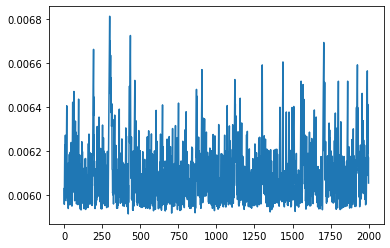

Weight value is  [[ 1.53068230e-04 -4.57293622e-07 -4.36937438e-05 -1.97660946e-05
  -2.28840075e-05 -3.90293887e-06 -5.23589443e-06 -4.81295874e-05
  -1.91761766e-05 -1.78537622e-05 -2.15006293e-05 -1.58099968e-05
  -4.30123939e-05 -2.80356656e-06 -3.08305311e-05 -2.11955752e-05
  -2.30156185e-06 -2.27670835e-05 -1.15784773e-05 -1.69399605e-05
  -1.34188736e-05 -1.80943121e-05 -3.29722191e-05  5.06824559e-06
  -9.24123919e-06 -1.67548942e-05 -2.68165714e-05 -1.79280030e-05
  -4.10933182e-06 -3.07764815e-06 -9.60672444e-06  2.10134546e-06
  -8.44509473e-06  3.73198960e-05  9.54883945e-05 -1.02254555e-05
  -5.42576178e-06  8.44817695e-07 -9.96578469e-06  8.74252895e-05
  -7.77124281e-06 -1.58835701e-05 -2.96015998e-05 -1.48045005e-05
   8.30825913e-05 -5.95200049e-06 -2.88311568e-05 -2.12674101e-05
   2.86159066e-06  7.38653765e-05  1.53183285e-05 -1.75775783e-05
  -1.35342340e-05 -1.71508703e-05  8.82993050e-05  2.37995573e-06
  -4.20258342e-05 -1.53904406e-05 -3.33290249e-06  7.115693

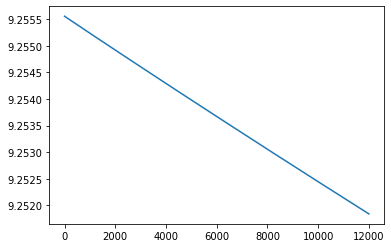

Weight value is  [[ 1.49875064e-05 -2.05620296e-04  1.36110688e-03  3.81011198e-03
   7.76907668e-04 -2.52695510e-03 -1.72437978e-04  2.55499386e-03
   5.36694962e-03  3.22543017e-03  1.24158905e-04 -6.55394479e-04
   1.54841183e-03  3.31152694e-03  1.89812151e-03  1.47006291e-04
  -7.85033460e-04  1.73511860e-03  2.10986735e-03  3.80058427e-03
  -8.44042121e-04 -6.87008128e-04  1.29077034e-03  3.08662927e-03
   8.37638570e-04 -2.07452546e-04 -1.32802729e-03  4.31686576e-04
   2.49314635e-03  9.71653620e-04 -1.08742933e-03  3.18868355e-04
   4.69026043e-04 -3.05474428e-03 -6.45077567e-04 -2.61705446e-03
  -5.67671787e-03 -5.08905652e-03 -1.57820912e-03  6.86156363e-04
   5.45868562e-04 -3.06059703e-03 -3.37888595e-03  6.97019352e-03
   4.41070655e-04 -2.09818060e-03 -3.86880739e-03  2.16575488e-04
   2.58094221e-03 -1.37702516e-03  1.64724463e-03 -1.97941607e-03
  -7.73686821e-04  2.27822382e-03 -2.04210758e-03 -1.02380646e-03
  -9.29936058e-04  8.94957926e-04 -1.87447133e-03 -6.251372

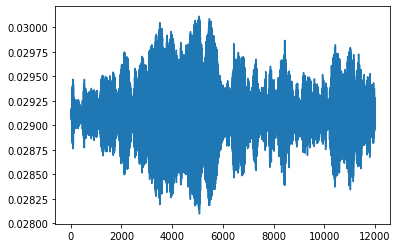

Weight value is  [[-2.87344972e-04 -1.05217019e-03  1.92832012e-03  4.12377000e-03
   8.88887775e-04 -2.97541266e-03 -9.52420011e-04  3.31737495e-03
   6.07598584e-03  3.39456021e-03 -2.08581194e-04 -1.81925977e-03
   2.51937193e-03  4.36602622e-03  2.32007438e-03  7.65689517e-05
  -2.14268201e-03  2.39709020e-03  3.14752351e-03  4.17295760e-03
  -8.89525795e-04 -1.76851563e-03  2.23093394e-03  4.39918073e-03
   1.06932915e-03 -5.15044766e-04 -2.50052933e-03  1.15663212e-03
   3.56522144e-03  1.31510652e-03 -1.24879648e-03  3.30157638e-04
   2.81291531e-04 -2.97089715e-03 -8.77261334e-04 -3.12184483e-03
  -5.40204676e-03 -5.27233482e-03 -1.67390730e-03  4.69384696e-04
   3.06922998e-05 -2.55202600e-03 -4.36404170e-03  7.50576429e-03
   1.51907856e-04 -2.56733211e-03 -3.28782851e-03 -6.52725909e-04
   2.60806943e-03 -1.39195125e-03  1.02675690e-03 -1.32520374e-03
  -1.25413941e-03  2.59407651e-03 -1.96194978e-03 -1.68299093e-03
  -2.18326395e-04  1.11831011e-04 -1.79511824e-03 -7.571815

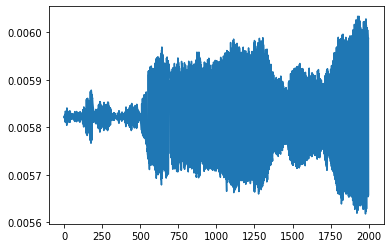

Weight value is  [[-2.57315570e-03 -1.84961436e-03 -1.21282529e-03 -4.06829030e-04
  -6.74457843e-04 -7.08300198e-04 -1.66379171e-03 -1.15827121e-03
  -6.79938989e-05 -8.07901892e-05 -4.84029160e-04 -1.42653550e-03
  -1.16499838e-03 -3.75563361e-04 -2.42683105e-04 -5.57357200e-04
  -1.02024944e-03 -6.85929671e-04 -1.55183082e-04  1.22558429e-04
  -6.61108202e-04 -1.29886534e-03 -1.14423604e-03 -9.10734085e-04
  -2.69069447e-04 -3.74962920e-04 -1.32597799e-03 -1.27791050e-03
  -6.50462317e-04 -4.01477311e-04 -5.79352536e-04 -8.08568511e-04
  -8.53752015e-04 -1.80293734e-03 -1.96265901e-03 -1.96080456e-03
  -1.85448671e-03 -1.69745339e-03 -1.62019535e-03 -2.04304073e-03
  -5.90175871e-04 -1.61388184e-03 -2.04109953e-03 -1.74901555e-04
  -1.97599709e-03 -1.82076570e-03 -1.78048969e-03 -1.27347288e-03
  -4.95287906e-04 -2.18407125e-03 -1.32131957e-03 -1.00539437e-03
  -1.71923538e-03 -1.21397973e-03 -2.36948129e-03 -1.62373664e-03
  -1.49044217e-03 -1.54414089e-03 -1.91873307e-03 -2.252403

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

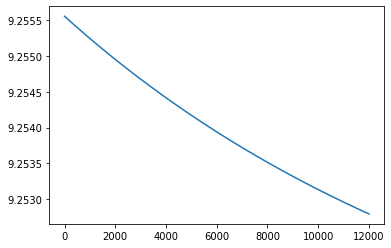

Weight value is  [[-2.91738638e-06 -1.58365264e-04  1.02308104e-03  2.86627250e-03
   5.82280978e-04 -1.90166434e-03 -1.33611581e-04  1.92082683e-03
   4.03744666e-03  2.42407084e-03  9.18013703e-05 -4.98636067e-04
   1.16366965e-03  2.49067325e-03  1.42482479e-03  1.08119371e-04
  -5.96872724e-04  1.30432393e-03  1.58736627e-03  2.85608455e-03
  -6.36763951e-04 -5.23360697e-04  9.69127254e-04  2.32078809e-03
   6.27421171e-04 -1.58257579e-04 -1.00616948e-03  3.22588827e-04
   1.87444344e-03  7.28509279e-04 -8.20027495e-04  2.29303813e-04
   3.39751644e-04 -2.30866835e-03 -4.97511076e-04 -1.97859771e-03
  -4.28202316e-03 -3.84112954e-03 -1.19817514e-03  5.03511020e-04
   4.02548819e-04 -2.31286002e-03 -2.55342836e-03  5.23431490e-03
   3.19802857e-04 -1.58689461e-03 -2.92113547e-03  1.50950592e-04
   1.93202724e-03 -1.04708234e-03  1.23116947e-03 -1.49918838e-03
  -5.93341750e-04  1.70507608e-03 -1.54754374e-03 -7.77700477e-04
  -7.09705259e-04  6.62314241e-04 -1.41833470e-03 -4.818652

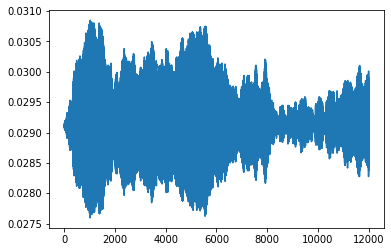

Weight value is  [[-2.16601047e-03 -1.45121234e-03  3.30267351e-04  2.09955467e-03
  -1.38557106e-04 -1.94395784e-03 -1.31765311e-03  1.20406364e-03
   3.81029637e-03  1.71001044e-03  5.89188006e-05 -1.12474199e-03
   1.58641055e-04  1.95257797e-03  5.34536512e-04 -1.36281992e-04
  -1.19310682e-03  6.67413899e-04  1.63564870e-03  1.87739292e-03
  -7.71676853e-04 -1.35712122e-03  1.85172453e-04  2.16345226e-03
  -1.73244625e-04 -3.38033822e-04 -1.69032287e-03 -5.68899117e-04
   1.92604129e-03 -1.62856723e-04 -9.90988689e-04 -1.39690209e-03
  -7.90239196e-04 -3.46489898e-03 -2.22645605e-03 -3.61396391e-03
  -6.06075516e-03 -5.01820939e-03 -2.18949182e-03 -1.13066070e-03
  -5.57069028e-04 -4.40886841e-03 -3.80469785e-03  4.10172195e-03
  -1.63197414e-03 -3.35775586e-03 -4.29317052e-03 -1.09740416e-03
   9.54164031e-04 -2.67420558e-03 -1.84371950e-04 -3.00616811e-03
  -2.11205411e-03  6.02600991e-04 -3.28128938e-03 -1.89707494e-03
  -1.84064019e-03 -1.05176707e-03 -2.99408903e-03 -2.325444

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

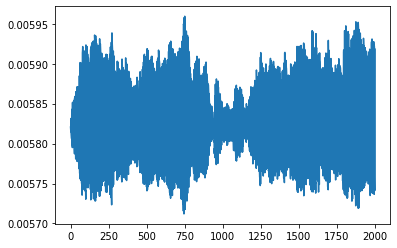

Weight value is  [[ 1.42678203e-03  4.50056113e-04  1.10517318e-03  1.16890187e-03
   4.74750012e-04 -1.29777513e-04  3.96928138e-04  1.24499383e-03
   1.14724789e-03  9.05783324e-04  5.95899153e-04  6.17341993e-05
   8.90116573e-04  7.22873950e-04  7.07912746e-04  4.82853909e-04
   6.65548201e-04  1.11137301e-03  7.71155110e-04  1.05857581e-03
   1.71294905e-04  2.00269645e-04  7.61182725e-04  1.05176166e-03
   4.91390247e-04  3.74598436e-04  5.04998342e-04  9.03824017e-04
   1.17129238e-03  4.45010992e-04  2.77619721e-04  1.32319352e-03
   4.89883953e-04  1.48189105e-05  9.96263178e-04  6.98942693e-04
   1.64399794e-04 -6.48564930e-04  2.19079400e-04  1.02286581e-03
   4.84644349e-04  4.48269091e-04  3.36604583e-04  1.95466585e-03
   1.01421189e-03  2.28158293e-04 -4.37250589e-04  8.07881978e-04
   1.20036352e-03  8.67612713e-04  7.29815145e-04  4.20398320e-04
   8.00312174e-04  1.13357455e-03  8.97845274e-04  4.46410184e-04
   4.00605517e-04  9.70281136e-04  6.41158698e-04  1.083843

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


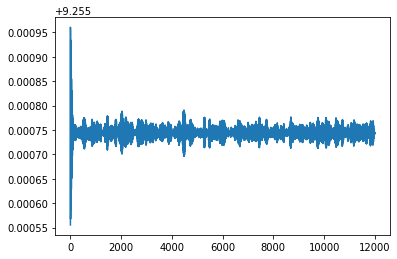

Weight value is  [[-2.14976787e-06 -1.77963707e-05  1.20808253e-05  1.97833618e-05
   7.75443040e-06 -9.54073322e-06  1.51002349e-05 -1.09113671e-05
  -7.96170328e-06  1.36424520e-05 -1.88871650e-05  5.50278331e-07
  -1.59767642e-05  1.88707153e-05  1.54553150e-05 -5.25692887e-06
   1.02330402e-05 -1.93091483e-05 -1.72329304e-05 -2.35396973e-05
   1.36062546e-05  1.43048683e-05  1.95499012e-05 -2.04416892e-05
   9.49344039e-06 -5.00670578e-07  4.12517316e-06 -4.41769780e-06
  -1.29995605e-05  1.34635733e-06  1.68230630e-05  8.13189418e-06
   2.03177970e-06  2.31972920e-06 -1.57060408e-06 -1.61352620e-05
   1.53893863e-05 -2.15554582e-05 -1.15775655e-05 -2.12921106e-05
   1.16942186e-05  1.07442575e-05  1.24412125e-05 -5.12409462e-06
  -8.58260706e-06 -1.09248729e-05 -5.69935943e-06  2.02050135e-05
  -2.35200220e-05 -1.86077897e-05  1.18314305e-05 -4.91448427e-07
  -2.33515898e-05 -1.85122557e-05  6.79335728e-06 -1.78987938e-05
  -2.89597774e-07  7.70265110e-06 -2.38430853e-05 -2.361740

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

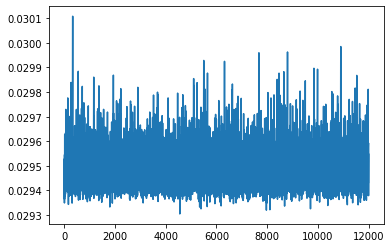

Weight value is  [[ 1.06475785e-04  1.15173381e-05  2.10440193e-05  1.36478453e-05
   6.63128802e-06  1.16261496e-05  5.09469032e-05  5.97672116e-06
  -6.47679836e-06  1.20597471e-05 -8.61249959e-06  4.58153464e-05
   4.49048111e-06  3.01531495e-06  4.09774104e-05  1.63167831e-05
   1.05673730e-05  2.61446145e-06  4.35022355e-06  3.82884725e-05
   2.56720448e-05  8.97997127e-06  2.72922530e-05 -3.67111917e-06
   3.95685692e-05 -1.09326500e-05  1.95664580e-05  2.06885092e-05
   3.63347423e-05  2.81810587e-06  2.32796564e-05  4.09698617e-05
   2.43598299e-05  3.13190735e-05  6.21986526e-05  4.17423911e-05
   1.57087040e-06  3.36563746e-05  5.19350234e-05  4.99936408e-05
   4.02878101e-05  3.66078408e-05  4.28164366e-05  5.31524185e-05
   4.99112983e-05  2.44732322e-05  1.35508722e-05  2.56652156e-05
   6.00737073e-05  5.21800367e-05  4.03633230e-05  2.06592224e-06
   6.10030860e-05  2.69529956e-05  7.91139817e-05  3.40488300e-05
   3.14621738e-05  2.42044558e-05  1.43235848e-05  6.650290

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


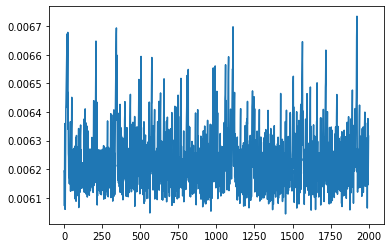

Weight value is  [[-7.70707842e-05 -3.71234840e-05 -3.42899535e-05 -2.55660828e-05
  -3.04845441e-05  4.81444590e-06 -4.22649967e-07 -2.75334617e-05
  -4.82956089e-08 -8.70817935e-06  1.39351282e-05 -1.55053413e-05
  -2.39860325e-05 -1.66118894e-05 -1.89035722e-05 -2.86978044e-05
  -1.91792250e-06 -1.65635218e-05 -3.13193443e-05  8.62806563e-07
  -1.12853110e-05 -4.64728829e-05 -5.98428441e-05 -2.05071479e-05
  -1.89987135e-05 -3.76928678e-05 -3.11816499e-05 -4.91660656e-05
  -4.10220671e-05 -5.93736541e-06 -2.57266542e-05 -1.33094781e-05
  -1.62618039e-05 -7.44135812e-05 -4.58856707e-05 -3.68805329e-05
  -3.56204769e-05 -1.81700005e-05 -2.97804853e-05 -4.46906840e-05
  -5.11282447e-05 -3.71252301e-06 -4.16915340e-05 -3.16559772e-05
  -4.66289559e-05 -5.03096198e-05 -5.18983641e-05 -3.92870173e-05
  -4.96307310e-05 -4.94284946e-05 -3.88976483e-05 -3.61454547e-05
  -2.60308707e-05 -5.66314535e-05 -8.68209441e-05 -5.53956217e-05
  -1.30339628e-05 -2.15754473e-05 -1.39872587e-05 -9.037980

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

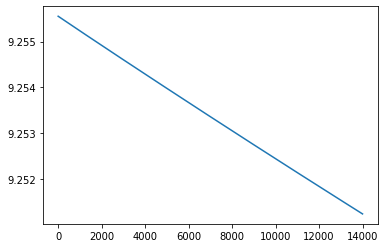

Weight value is  [[ 3.35202038e-05 -2.39069289e-04  1.58227884e-03  4.43419803e-03
   9.04495947e-04 -2.94840572e-03 -1.99608903e-04  2.97362705e-03
   6.25033049e-03  3.75982054e-03  1.44113759e-04 -7.59009870e-04
   1.80027832e-03  3.85490565e-03  2.21357587e-03  1.73233411e-04
  -9.08394031e-04  2.01811949e-03  2.45322751e-03  4.43154212e-03
  -9.83480109e-04 -7.92624450e-04  1.50213474e-03  3.59406306e-03
   9.76517070e-04 -2.40055065e-04 -1.53940720e-03  5.00380453e-04
   2.90195280e-03  1.13244461e-03 -1.26683844e-03  3.89354544e-04
   5.68513507e-04 -3.54575169e-03 -7.37376041e-04 -3.03937865e-03
  -6.59970617e-03 -5.91260812e-03 -1.82274047e-03  8.15861811e-04
   6.46860461e-04 -3.55191595e-03 -3.92153197e-03  8.13995107e-03
   5.28380461e-04 -2.43628484e-03 -4.49366301e-03  2.71998673e-04
   3.02251205e-03 -1.59314047e-03  1.93012445e-03 -2.29225516e-03
  -8.85124474e-04  2.66740842e-03 -2.36876158e-03 -1.18596389e-03
  -1.06888987e-03  1.05954889e-03 -2.17526218e-03 -7.158575

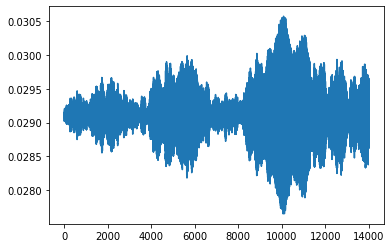

Weight value is  [[-1.35411702e-03 -1.90590200e-03  1.10304084e-03  3.82162508e-03
   9.66609844e-04 -3.63239200e-03 -1.64276771e-03  2.54219044e-03
   5.72466099e-03  3.92846485e-03 -3.84078403e-04 -2.13586186e-03
   1.04735938e-03  3.41143280e-03  2.03601287e-03 -2.75449905e-04
  -2.55348834e-03  2.13962850e-03  2.39417414e-03  4.79108904e-03
  -1.15406071e-03 -2.26438962e-03  1.23998937e-03  3.66153410e-03
   1.13992407e-03 -6.66323015e-04 -3.44201560e-03  2.68073644e-04
   3.05450757e-03  1.40730599e-03 -1.57326335e-03 -6.87144992e-04
  -2.54218188e-05 -3.91064727e-03 -2.13129445e-03 -3.61487421e-03
  -7.49833323e-03 -5.92195514e-03 -1.80499360e-03 -4.84481210e-04
   1.67561868e-04 -4.42416920e-03 -4.56079356e-03  7.18886613e-03
  -7.50409366e-04 -3.47058232e-03 -4.84005041e-03 -1.27190425e-03
   2.71882706e-03 -3.03170867e-03  8.73217285e-04 -2.84396426e-03
  -1.68841861e-03  3.21092499e-03 -3.41621456e-03 -2.53746910e-03
  -1.51960205e-03  1.13742812e-04 -2.64733369e-03 -1.806659

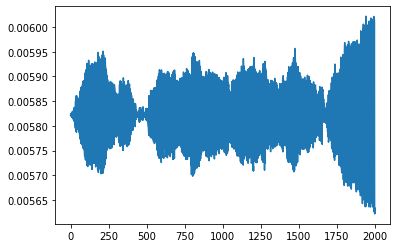

Weight value is  [[ 3.02038563e-03  7.97987213e-04  9.58107550e-04  1.46718332e-03
   8.50860065e-04 -3.11759366e-05  1.32028942e-03  1.79199630e-03
   2.12056032e-03  1.34425974e-03  4.17983799e-04  9.48493057e-04
   1.17068930e-03  1.77161018e-03  1.34091364e-03  4.98730719e-04
   1.28092948e-03  1.28284714e-03  1.55700091e-03  1.45327781e-03
   3.72946462e-04  1.23617675e-03  1.35199933e-03  1.95606073e-03
   1.19106907e-03  3.66309907e-04  1.00555268e-03  1.10775592e-03
   1.60179188e-03  8.60738048e-04  1.30584243e-04  1.54515823e-03
   1.49250780e-03  1.56995361e-03  2.58682003e-03  1.32416196e-03
  -1.63310872e-04  1.19890216e-03  1.47709997e-03  2.75738233e-03
   1.84744681e-03  7.56627202e-04  1.05201781e-03  2.53154127e-03
   2.42663335e-03  1.78709637e-03  5.50979263e-05  1.73109059e-03
   2.34829151e-03  2.38096293e-03  2.19013569e-03  6.02407405e-04
   1.84529697e-03  2.26079599e-03  2.13627898e-03  2.01551810e-03
   8.90036366e-04  2.51955374e-03  1.50210237e-03  2.412026

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


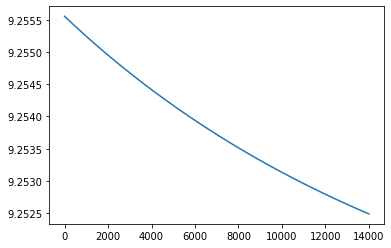

Weight value is  [[ 6.76086838e-06 -1.75827880e-04  1.13860470e-03  3.19223252e-03
   6.48924529e-04 -2.12177072e-03 -1.47796432e-04  2.13948138e-03
   4.49882743e-03  2.70317554e-03  1.02228178e-04 -5.52749524e-04
   1.29522574e-03  2.77447902e-03  1.58958409e-03  1.21818885e-04
  -6.61300568e-04  1.45213992e-03  1.76670750e-03  3.18562303e-03
  -7.09585854e-04 -5.78523704e-04  1.07952723e-03  2.58581957e-03
   6.99960048e-04 -1.75283789e-04 -1.11656988e-03  3.58476670e-04
   2.08796455e-03  8.12492516e-04 -9.13725713e-04  2.66104661e-04
   3.91696431e-04 -2.56511679e-03 -5.45718698e-04 -2.19916852e-03
  -4.76408798e-03 -4.27126244e-03 -1.32589816e-03  5.71248784e-04
   4.55291101e-04 -2.56947304e-03 -2.83684862e-03  5.84524165e-03
   3.65400559e-04 -1.76347885e-03 -3.24749168e-03  1.79883724e-04
   2.16264162e-03 -1.15995371e-03  1.37890852e-03 -1.66258502e-03
  -6.51551834e-04  1.90833372e-03 -1.71814582e-03 -8.62389824e-04
  -7.82285726e-04  7.48267410e-04 -1.57543212e-03 -5.292465

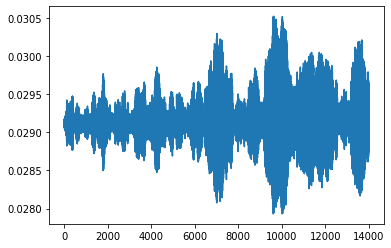

Weight value is  [[ 1.35041621e-03 -1.46353544e-04  1.68165556e-03  3.50552378e-03
   1.16837918e-03 -1.95082148e-03  6.16619639e-06  2.80701872e-03
   4.89713045e-03  3.01230993e-03  4.14091468e-04 -9.53362368e-05
   2.29131254e-03  3.62313619e-03  2.20175537e-03  3.54806951e-04
  -1.50109863e-04  2.26906289e-03  2.57962191e-03  3.64507750e-03
  -3.76899741e-04 -8.94474672e-05  2.37604562e-03  4.03713070e-03
   1.21751026e-03  1.30706897e-04 -8.74408067e-04  1.11225759e-03
   2.98030190e-03  9.95640581e-04 -8.16653418e-04  8.89405251e-04
   1.26168238e-03 -1.71877796e-03  3.09805087e-04 -1.39425786e-03
  -3.69933213e-03 -3.97224616e-03 -5.40233868e-04  1.58658297e-03
   1.49392173e-03 -1.64787519e-03 -2.21668387e-03  6.69288810e-03
   1.54420709e-03 -1.51988483e-03 -1.99437179e-03  5.78316825e-04
   2.42948933e-03 -8.26832478e-05  1.80477741e-03 -8.10396324e-04
  -4.49782040e-04  2.93014864e-03 -6.18626256e-04 -1.73309877e-04
  -1.13479699e-04  1.11163465e-03 -6.74006230e-04  3.644164

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


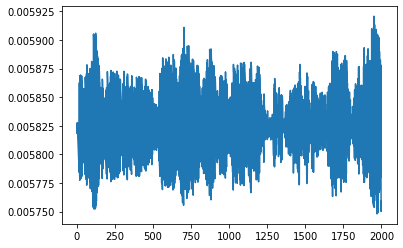

Weight value is  [[ 8.37842162e-04  9.92266092e-05  8.84428204e-04  1.30520149e-03
   7.05715532e-04 -2.88485015e-04  2.39931675e-04  1.34834084e-03
   1.63404709e-03  1.21781368e-03  1.99727584e-04 -1.78414502e-04
   8.49314593e-04  1.22947379e-03  1.25244136e-03  3.87141766e-04
   2.08740158e-04  9.14505468e-04  1.06522346e-03  1.45584433e-03
   3.75405133e-04 -1.05649809e-04  9.88278097e-04  1.25780629e-03
   1.31966296e-03  2.41532009e-04 -1.53247392e-05  7.90541740e-04
   1.20648699e-03  1.03890911e-03  1.58767105e-04  1.65993682e-03
   2.99458471e-04 -4.51284344e-04  4.24643103e-04 -5.42785959e-04
   5.67186397e-04 -9.89020971e-04 -6.07722347e-04  6.36173589e-04
   5.41197996e-04  1.02258303e-03  4.37246873e-05  1.48135540e-03
   6.38029452e-04 -3.32148690e-05  5.54891037e-04  9.21969814e-04
   2.51284110e-04  3.56994939e-04  5.95573510e-04  9.46292205e-04
   2.54925498e-04  1.06490431e-03  3.96606748e-04  1.12323906e-03
   7.96098234e-04  6.01104479e-04 -2.87502735e-04  5.252464

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


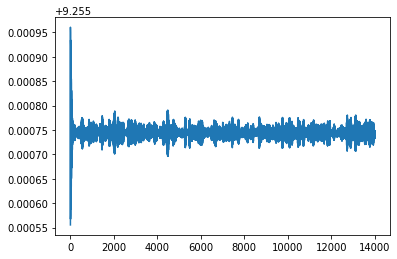

Weight value is  [[-1.51578707e-05 -2.49903471e-05 -2.34567740e-05 -6.14562491e-06
   2.14961691e-05  9.67391105e-06  1.33901706e-05 -2.92994286e-07
  -2.18408298e-05 -1.33005755e-05 -9.56934020e-06  1.30765208e-05
  -2.28668169e-05  9.46087049e-06  1.38095222e-05  6.33374231e-06
  -6.27131458e-07  6.58424012e-06 -2.43180999e-05 -6.68409261e-06
   1.16779746e-05  2.07956903e-05  1.85837692e-05 -1.97404228e-05
  -1.81435124e-05  3.55437906e-06  5.79527853e-07 -1.05110310e-06
  -1.10567536e-05 -2.64562196e-06  2.37637753e-05  2.19099387e-05
  -1.85494893e-05 -1.54454087e-06 -1.44547732e-05  1.91107840e-06
   2.20378841e-05 -2.10682261e-05 -1.77523922e-05 -1.24631368e-05
   1.77332689e-05  8.28914160e-06  1.92963001e-06  2.31120381e-05
   1.06977329e-05 -3.31523184e-07  5.77074270e-06  1.09884396e-05
   1.83112675e-05 -9.95353939e-07  1.22205365e-06 -2.14849562e-05
   1.83504378e-06  2.41524105e-05  1.19686217e-05  2.48669494e-05
   3.74802631e-06  1.30653367e-05 -2.37292990e-05  1.815678

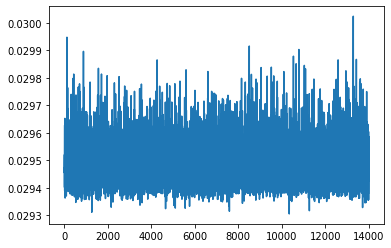

Weight value is  [[ 5.21337023e-06  4.31823661e-06  4.11383855e-05  4.65747376e-05
   3.65816589e-05  2.98817955e-05  4.45225680e-05  2.26536545e-05
   2.44939682e-05  2.95398781e-05  1.49333354e-05  4.65952372e-05
   1.03756498e-05  2.00532923e-05  9.44978948e-06 -1.28553028e-05
   3.52350158e-05 -1.44362311e-06  2.02593689e-05  4.20261400e-06
  -2.81262285e-06  7.43665010e-06  4.57538002e-05  1.22474242e-05
   1.61077522e-05 -7.73565309e-06  1.14247990e-06  1.32947510e-05
   3.79954662e-05  1.23860239e-05  1.69179696e-05  2.40298160e-05
  -7.23408095e-06  3.40766706e-05  4.89113675e-05  3.15036651e-05
   1.85973788e-05  2.94584472e-05  3.50731530e-05  3.38687051e-05
   2.68190054e-05  2.27858414e-05 -9.18148481e-06  4.65656209e-06
   3.17181031e-06  1.14746519e-06  2.22401825e-05  4.54013599e-05
   3.60851987e-05  3.73932503e-06  3.10907067e-05  2.10728785e-05
   3.04667086e-05  9.05879175e-07  5.17468972e-05  7.25609457e-06
   1.17574047e-05  1.55375447e-05  1.41440372e-05  2.908679

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


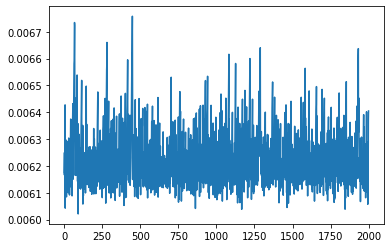

Weight value is  [[ 1.22984343e-04  3.89465539e-05  1.71790245e-05  4.08944071e-06
   2.42250565e-05  2.12074178e-05  3.84837641e-05  1.49805824e-05
  -8.24697647e-06  2.24819274e-05  1.54018216e-05  2.61687116e-05
   2.31083053e-06  3.01659217e-05  2.08716315e-05  1.19924128e-05
   3.57836222e-05  3.04774893e-06  2.32531974e-05  2.17997100e-05
   7.52721557e-06  4.91394887e-05 -5.82715991e-07  3.14880939e-05
   2.15333443e-06  1.54489691e-05  3.46770038e-05  1.78194872e-05
   2.64712215e-05 -1.49347147e-05 -1.68446883e-05  4.54066397e-05
   6.31725712e-05  3.08748666e-05  8.03208233e-05  2.66070690e-05
   8.48736315e-05  4.60380699e-05  4.86718840e-05  9.59006098e-05
   3.65386829e-05  5.89349025e-05  5.73339733e-05  1.60868923e-05
   5.21279169e-05  5.15229304e-05  4.86577941e-05  7.88912717e-05
   4.52590229e-05  7.03578829e-05  4.14136261e-05  5.80582454e-05
   7.02385422e-05  3.97965024e-05  5.88276070e-05  6.66530173e-05
   3.56891724e-05  5.29724651e-05  4.41854128e-05  5.320209

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


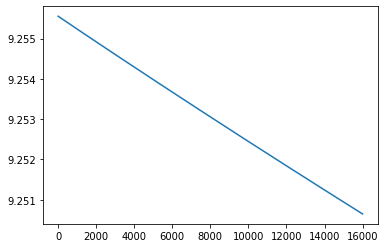

Weight value is  [[ 5.21353116e-05 -2.74160656e-04  1.80040433e-03  5.05349489e-03
   1.03007165e-03 -3.37076980e-03 -2.28167500e-04  3.38843499e-03
   7.12907378e-03  4.29184581e-03  1.62847247e-04 -8.63035911e-04
   2.04869523e-03  4.39430791e-03  2.52717531e-03  1.98978927e-04
  -1.03166221e-03  2.29781599e-03  2.79291943e-03  5.06020758e-03
  -1.12343383e-03 -8.97569183e-04  1.71080744e-03  4.09785574e-03
   1.11366643e-03 -2.72923633e-04 -1.75000744e-03  5.66354104e-04
   3.30723242e-03  1.29146814e-03 -1.44660074e-03  4.62612670e-04
   6.71351399e-04 -4.03419006e-03 -8.29022497e-04 -3.46071122e-03
  -7.51853312e-03 -6.73184869e-03 -2.06443399e-03  9.46251585e-04
   7.48406001e-04 -4.04020311e-03 -4.46098044e-03  9.30965999e-03
   6.15941019e-04 -2.77367317e-03 -5.11518671e-03  3.30371329e-04
   3.46482313e-03 -1.80903354e-03  2.21294605e-03 -2.60256569e-03
  -9.94293067e-04  3.05676592e-03 -2.69521823e-03 -1.34824327e-03
  -1.20566652e-03  1.22584291e-03 -2.47515222e-03 -8.064254

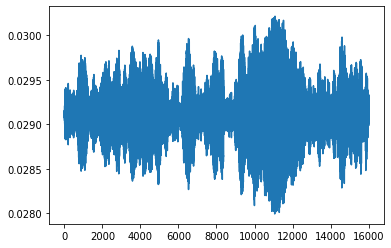

Weight value is  [[ 7.89219665e-06 -9.23642673e-04  1.70830814e-03  4.91253919e-03
   7.93361991e-04 -3.45201367e-03 -1.30898485e-04  3.40508732e-03
   7.45848047e-03  4.11382200e-03  4.54063623e-04 -8.47664660e-04
   1.73668897e-03  4.02553806e-03  2.11437978e-03 -5.62871043e-05
  -7.75686455e-04  2.03919750e-03  2.79065371e-03  4.66694498e-03
  -9.85235145e-04 -2.38796015e-04  2.30497563e-03  4.63329528e-03
   1.07484351e-03 -2.94268231e-04 -1.52276732e-03  6.15585440e-04
   3.83706115e-03  9.29136808e-04 -1.16399530e-03  5.32157947e-04
   6.83966791e-04 -3.87641522e-03 -1.09997636e-03 -3.86511947e-03
  -8.10927062e-03 -6.66808168e-03 -2.11652686e-03  1.08220707e-03
   4.41123382e-04 -3.95419349e-03 -4.76213780e-03  9.48348055e-03
   6.45212921e-04 -2.90138083e-03 -4.86941613e-03 -3.96882517e-04
   3.36541187e-03 -1.59319969e-03  1.82103128e-03 -2.38789374e-03
  -1.55870844e-03  3.16555335e-03 -2.63733857e-03 -4.17792762e-04
  -5.91947692e-04  4.47832413e-04 -2.65318496e-03 -7.628511

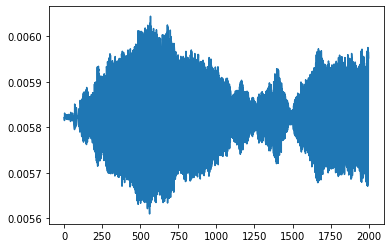

Weight value is  [[ 2.05693843e-03  1.06101281e-03  1.29373365e-03  9.97173495e-04
   6.26316388e-04 -3.49070591e-04  8.26189029e-04  1.38413716e-03
   1.34358251e-03  8.26210656e-04  1.23271396e-04  8.01114571e-04
   1.23391226e-03  7.47775514e-04  7.52837019e-04  1.55361066e-04
   6.07412433e-04  1.15909746e-03  9.53048637e-04  8.81138159e-04
  -7.16436583e-05  8.44307945e-04  1.18089712e-03  1.11519270e-03
   5.46186144e-04  4.00087855e-05  6.29616896e-04  1.17271309e-03
   8.38450912e-04  4.81251406e-04  4.00969351e-05  1.68835922e-03
   1.34174529e-03  8.42143217e-04  1.30681289e-03  7.43931287e-04
   2.79461987e-04  7.97803889e-04  1.15319310e-03  1.71873693e-03
   1.21777533e-03  7.21047486e-04  1.18494006e-03  1.98410850e-03
   1.81243436e-03  1.19475989e-03  1.05095613e-03  1.18422959e-03
   1.55750243e-03  1.49216514e-03  1.29244873e-03  9.04784055e-04
   1.76752357e-03  1.77330471e-03  1.25960463e-03  6.81320455e-04
   9.80045296e-04  2.05860714e-03  3.05786576e-04  1.696862

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


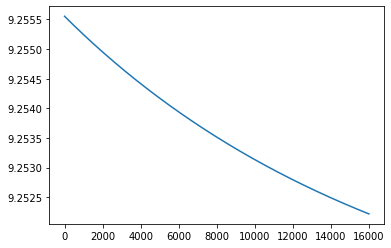

Weight value is  [[ 1.55578034e-05 -1.92404615e-04  1.24169494e-03  3.48490939e-03
   7.08275010e-04 -2.32136231e-03 -1.61286949e-04  2.33552006e-03
   4.91410937e-03  2.95460173e-03  1.11085627e-04 -6.01907045e-04
   1.41263221e-03  3.02939734e-03  1.73778769e-03  1.33987219e-04
  -7.19553149e-04  1.58432752e-03  1.92724827e-03  3.48271786e-03
  -7.75721284e-04 -6.28119414e-04  1.17814909e-03  2.82390876e-03
   7.64778795e-04 -1.90815313e-04 -1.21609522e-03  3.89663882e-04
   2.27949935e-03  8.87648396e-04 -9.98673946e-04  3.00713823e-04
   4.40281908e-04 -2.79594569e-03 -5.89029856e-04 -2.39827957e-03
  -5.19831002e-03 -4.65842381e-03 -1.44012476e-03  6.32864357e-04
   5.03276239e-04 -2.80023224e-03 -3.09178552e-03  6.39800714e-03
   4.06778103e-04 -1.92291969e-03 -3.54121511e-03  2.07457902e-04
   2.37166042e-03 -1.26197805e-03  1.51256093e-03 -1.80923657e-03
  -7.03149469e-04  2.09233055e-03 -1.87241869e-03 -9.39076937e-04
  -8.46929697e-04  8.26846252e-04 -1.71715322e-03 -5.720461

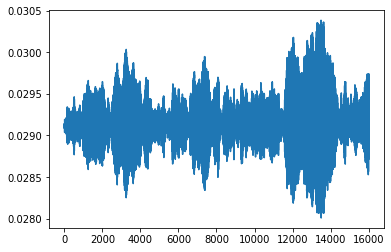

Weight value is  [[ 1.71084119e-03  4.25677024e-05  1.66024730e-03  3.67028458e-03
   8.92324430e-04 -2.31344485e-03  4.51388943e-04  3.22965811e-03
   5.28040940e-03  3.32166706e-03  1.46565256e-04  3.07951136e-04
   1.94574698e-03  3.37794148e-03  2.05192127e-03 -4.93785826e-05
   3.51322556e-04  2.59781520e-03  2.68215609e-03  4.14534227e-03
  -3.79053574e-04  1.78449622e-04  1.84467094e-03  3.29537836e-03
   1.20580874e-03 -1.22846990e-05 -2.56833222e-04  1.28395712e-03
   3.04572967e-03  1.38617712e-03 -9.45624721e-04  9.47247275e-04
   1.66292882e-03 -1.43815696e-03  8.44694897e-04 -1.14961368e-03
  -4.31043305e-03 -4.08718101e-03 -4.33725268e-04  2.01719377e-03
   1.46432892e-03 -2.43111662e-03 -2.21980276e-03  6.97140529e-03
   1.51416116e-03 -1.30785400e-03 -2.91590205e-03  6.24314803e-04
   2.72638232e-03  3.17670877e-05  2.30553647e-03 -1.42499632e-03
  -7.12001405e-05  2.92724213e-03 -6.60725977e-04 -2.13692473e-05
   2.89222361e-05  1.51555769e-03 -8.67164220e-04  5.516804

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


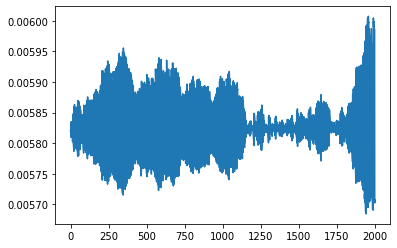

Weight value is  [[-2.19519369e-03 -9.59951140e-04 -3.98923809e-04 -4.00241471e-04
  -6.85106232e-04 -1.09775339e-03 -1.30124781e-03 -7.43687806e-04
   6.15714307e-06 -3.31019271e-04 -7.14581182e-04 -1.28515973e-03
  -9.34182499e-04 -6.31737578e-04 -5.84018660e-04 -9.83919848e-04
  -1.14749775e-03 -8.10637879e-04 -4.73329243e-04 -5.77188513e-04
  -1.13030758e-03 -1.07388397e-03 -7.88088041e-04 -4.70941690e-04
  -7.05597264e-04 -6.76642746e-04 -1.00664088e-03 -8.88158229e-04
  -4.38237613e-04 -5.06731600e-04 -9.97741844e-04 -1.31819791e-03
  -7.76167716e-04 -1.57074763e-03 -1.87583594e-03 -1.73118679e-03
  -2.22308651e-03 -1.77142598e-03 -1.27745594e-03 -1.66503529e-03
  -7.09091968e-04 -1.29050869e-03 -1.15602772e-03  6.39290192e-05
  -1.73453794e-03 -1.15255314e-03 -1.99210770e-03 -8.11860630e-04
  -4.68822282e-04 -1.88063849e-03 -6.10511275e-04 -1.02661204e-03
  -9.27620720e-04 -8.31402054e-04 -2.33395984e-03 -1.25270731e-03
  -1.55627077e-03 -1.10251328e-03 -1.19313598e-03 -2.135534

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

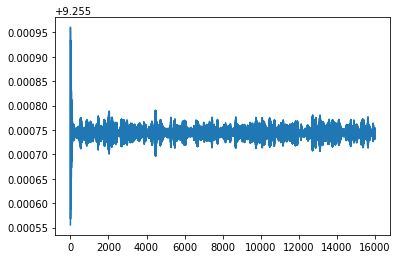

Weight value is  [[ 2.20286347e-05  1.78931333e-05 -8.93128504e-06  1.79986377e-05
  -1.46978596e-05 -2.10785897e-05  1.17562482e-05  1.04025407e-05
   1.43431961e-05  9.81892088e-06 -2.13680196e-07 -2.43125294e-05
   2.03175816e-05  1.18099633e-07  1.22337728e-05  1.79634993e-05
  -1.14023069e-05 -1.74558377e-05  1.86526059e-05  1.02399926e-05
   9.78412391e-06 -2.26344569e-05  1.76894732e-05 -1.89672692e-05
   4.28603393e-06  7.64320177e-06 -2.87878456e-06  2.39443463e-06
  -9.04367257e-06 -6.57481572e-06 -1.92600668e-05 -1.42081338e-05
   1.09881334e-05 -5.29661695e-06  2.28203606e-05  2.00843957e-05
  -2.12023178e-05 -2.04603318e-05 -2.38210977e-05 -3.47481896e-06
   2.38712378e-05  5.93945515e-06 -8.46607198e-06  1.44972523e-06
  -1.98632844e-05  1.03730859e-05  1.73473576e-05  1.89220336e-06
   1.02511230e-05  1.67721893e-05 -9.28118802e-06  7.62535251e-06
  -2.28606446e-05  1.69261494e-05  1.73043557e-05  1.77416050e-05
   7.89230419e-06  1.85473026e-05 -2.35118720e-05  1.009048

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


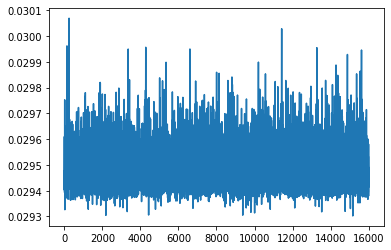

Weight value is  [[ 5.32206495e-05  1.45874643e-05  9.98689164e-06 -6.29836387e-06
   2.46270330e-05  2.64076223e-05  2.41578794e-05  3.80565170e-05
   2.99384988e-05  1.73316716e-05  3.22661905e-05  4.20980352e-05
   2.07013232e-05 -4.04534249e-06  6.86917428e-06  4.29126713e-06
   3.00985938e-05  3.07893837e-05  3.43405030e-05  1.61399488e-05
  -9.07011880e-06  1.13471820e-05  1.10594468e-05  2.74718178e-05
   2.55395598e-05  1.47248675e-05  6.97899383e-06  2.51617423e-05
  -9.28265352e-06  2.22384892e-05  1.68508456e-05  9.14285705e-06
   4.00445819e-05  5.04530599e-05  6.49489725e-05  2.08256354e-05
   1.95466063e-05  4.42127450e-05  2.34944916e-05  5.81096368e-05
   2.68202763e-05  9.52398419e-06  2.60412643e-05  3.73453393e-05
   2.83892272e-05  3.30863513e-05  1.51409491e-05  4.12863572e-05
   2.57469160e-05  1.52327814e-05  4.47278336e-05  3.54810972e-05
   5.27958103e-05  7.62074237e-06  2.33252702e-05  1.41971563e-05
   3.21988349e-06  2.82917725e-05  1.90949539e-05  2.215623

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


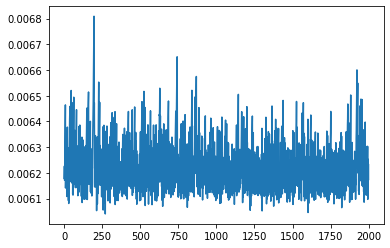

Weight value is  [[ 2.36848773e-05  1.68043096e-05  3.91794103e-05  2.13764409e-05
  -1.71596074e-06  1.24647638e-05  2.89954333e-05  4.90146125e-05
   9.21502580e-06  4.64944337e-05 -1.11865141e-06  5.17830270e-05
   4.24605476e-05  2.53822300e-05  1.13926244e-05  1.53671526e-05
   3.65593704e-05  3.78675678e-05  4.87761350e-05  1.30468605e-06
   1.99656961e-05  1.15427032e-05  2.49348052e-06  3.44235814e-05
   9.48745879e-06  6.49491732e-06  3.12540538e-05  4.59993543e-05
  -5.18098782e-06  2.67849175e-05  3.07995420e-05  1.33533261e-05
   4.85503296e-05  2.43368474e-05 -1.22319799e-05  3.44943990e-05
   1.17982033e-05  1.10488486e-05 -1.29863862e-05 -6.43418287e-06
  -7.44407486e-06  1.38855037e-05  3.40056312e-05  3.02728163e-05
   3.70229823e-05  4.62410842e-06  8.30941830e-06  2.62892142e-05
   4.18073625e-05 -1.41488863e-05  2.65690262e-05  1.74213548e-05
  -4.21224244e-06  4.53161805e-05  2.27324915e-05  3.67108301e-05
   5.98038772e-06  8.67117717e-06  3.32410436e-05  2.586952

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


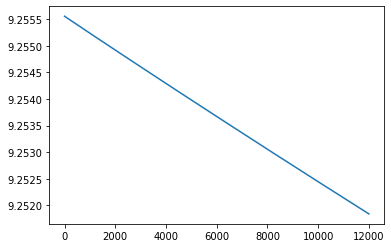

Weight value is  [[ 1.49875064e-05 -2.05620296e-04  1.36110688e-03  3.81011198e-03
   7.76907668e-04 -2.52695510e-03 -1.72437978e-04  2.55499386e-03
   5.36694962e-03  3.22543017e-03  1.24158905e-04 -6.55394479e-04
   1.54841183e-03  3.31152694e-03  1.89812151e-03  1.47006291e-04
  -7.85033460e-04  1.73511860e-03  2.10986735e-03  3.80058427e-03
  -8.44042121e-04 -6.87008128e-04  1.29077034e-03  3.08662927e-03
   8.37638570e-04 -2.07452546e-04 -1.32802729e-03  4.31686576e-04
   2.49314635e-03  9.71653620e-04 -1.08742933e-03  3.18868355e-04
   4.69026043e-04 -3.05474428e-03 -6.45077567e-04 -2.61705446e-03
  -5.67671787e-03 -5.08905652e-03 -1.57820912e-03  6.86156363e-04
   5.45868562e-04 -3.06059703e-03 -3.37888595e-03  6.97019352e-03
   4.41070655e-04 -2.09818060e-03 -3.86880739e-03  2.16575488e-04
   2.58094221e-03 -1.37702516e-03  1.64724463e-03 -1.97941607e-03
  -7.73686821e-04  2.27822382e-03 -2.04210758e-03 -1.02380646e-03
  -9.29936058e-04  8.94957926e-04 -1.87447133e-03 -6.251372

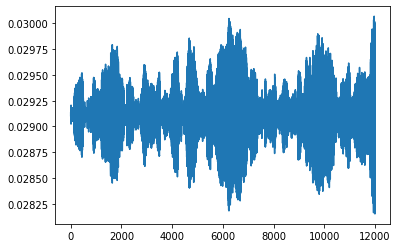

Weight value is  [[-2.42853806e-03 -3.19729823e-03 -2.62454566e-04  1.14438277e-03
  -7.27690925e-04 -3.49978559e-03 -2.74777093e-03  1.52055756e-03
   3.83445495e-03  1.92863275e-03 -4.69203696e-04 -2.25266823e-03
   1.16543743e-03  2.17113008e-03  5.94242951e-04 -4.60039721e-04
  -2.42884037e-03  1.65352508e-03  1.30829380e-03  2.64017678e-03
  -1.12708879e-03 -1.62282856e-03  1.46546633e-03  2.32755343e-03
  -1.83422083e-04 -7.49445967e-04 -2.89876665e-03  2.07119936e-04
   1.95404622e-03  3.36390041e-05 -1.18979093e-03 -3.86358952e-04
   8.54352743e-04 -2.96542847e-03 -2.41433269e-03 -4.24570056e-03
  -6.74935618e-03 -5.65612551e-03 -1.69697543e-03 -1.20939038e-03
  -2.33052057e-04 -4.24414036e-03 -4.13717818e-03  5.99263610e-03
  -1.65011506e-03 -4.16710911e-03 -5.06172114e-03 -1.61942332e-03
   1.49603595e-03 -3.49374337e-03 -3.37382212e-04 -3.49120971e-03
  -2.83531893e-03  6.95647890e-04 -4.00321714e-03 -3.23315694e-03
  -2.28532911e-03 -1.08998511e-03 -3.12349863e-03 -2.754037

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

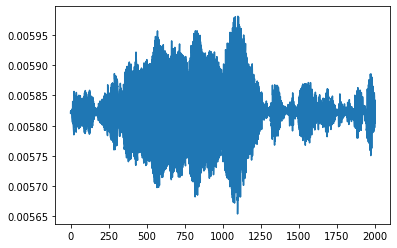

Weight value is  [[-4.01521951e-04 -2.78503379e-04  1.68181177e-04  5.05154180e-04
   4.71555175e-04 -3.62841767e-04  1.86054614e-04  7.11359019e-04
   1.07224847e-03  1.18761677e-03 -6.57908840e-05 -3.03030545e-04
   2.34654003e-04  6.04723247e-04  9.26400661e-04 -1.65757330e-04
  -6.02643134e-04  1.69213288e-04  4.04222241e-05  9.05699303e-04
  -4.17696127e-04 -5.92325955e-04  2.89211818e-04  5.26544123e-04
   3.82654641e-04 -2.54117698e-04 -6.60234543e-04  2.22887827e-04
   1.77527177e-04  2.49163104e-04 -4.99071100e-04 -8.69678990e-04
  -7.24442995e-05 -7.07254570e-04 -7.10843617e-04 -4.52704980e-04
  -2.05717230e-03 -1.44035812e-03 -3.12704786e-04 -3.19498073e-04
   5.58980049e-05 -4.48918110e-04 -8.95757544e-04  1.06978861e-03
  -2.94171941e-04 -6.48717908e-04 -1.18400978e-03 -1.64982670e-04
   4.33094595e-04 -5.56609054e-04  3.18608416e-04 -2.67290942e-04
  -1.05054948e-04 -2.55369290e-04 -6.94032301e-04 -3.16203110e-04
  -2.72829652e-04 -1.14375692e-04 -3.42548043e-04 -4.452720

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

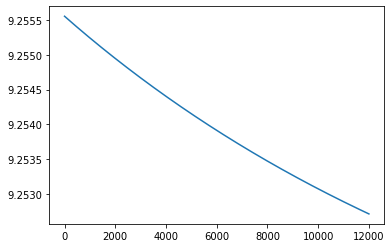

Weight value is  [[-1.49953864e-06 -1.62322026e-04  1.05131850e-03  2.94511003e-03
   5.98531624e-04 -1.95387554e-03 -1.36867083e-04  1.97379449e-03
   4.14848665e-03  2.49098522e-03  9.45012475e-05 -5.11753551e-04
   1.19580844e-03  2.55923412e-03  1.46433884e-03  1.11355765e-04
  -6.12618921e-04  1.34030843e-03  1.63101633e-03  2.93494732e-03
  -6.54078864e-04 -5.37064405e-04  9.95989149e-04  2.38474974e-03
   6.44969163e-04 -1.62375816e-04 -1.03308765e-03  3.31701679e-04
   1.92611892e-03  7.48808380e-04 -8.42364580e-04  2.36710392e-04
   3.50457149e-04 -2.37103811e-03 -5.09902771e-04 -2.03196815e-03
  -4.39856652e-03 -3.94542508e-03 -1.22998295e-03  5.18689832e-04
   4.14469338e-04 -2.37536966e-03 -2.62243485e-03  5.37921277e-03
   3.29862530e-04 -1.62963725e-03 -3.00034296e-03  1.56349531e-04
   1.98615645e-03 -1.07469460e-03  1.26586908e-03 -1.53935627e-03
  -6.08474266e-04  1.75288595e-03 -1.58890261e-03 -7.98290569e-04
  -7.28161317e-04  6.81671738e-04 -1.45647196e-03 -4.938921

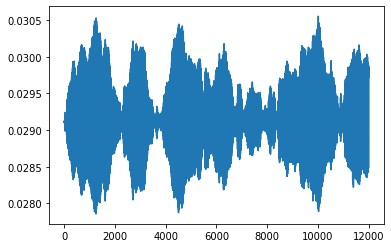

Weight value is  [[ 1.99639984e-03  6.13845121e-04  1.83999582e-03  3.58541729e-03
   1.16771427e-03 -1.80925029e-03  7.32702905e-04  3.17529815e-03
   4.99519594e-03  3.23234786e-03  5.40111544e-04  4.89632006e-04
   2.15309659e-03  3.35457841e-03  2.19833227e-03  6.08033625e-04
   2.79378451e-04  2.17350460e-03  2.30231124e-03  3.79877893e-03
  -4.83332995e-04  4.42518633e-04  2.24058648e-03  3.45564571e-03
   1.39464534e-03  3.58010093e-04  1.65606611e-04  1.62389015e-03
   3.09952012e-03  1.67219678e-03 -3.12412071e-04  1.06978234e-03
   1.72816493e-03 -1.00867328e-03  1.09463701e-03 -1.21735545e-03
  -3.75314552e-03 -2.95659239e-03 -2.16091619e-04  2.21040280e-03
   4.41224889e-04 -1.14699619e-03 -1.63333083e-03  6.43765665e-03
   1.99067841e-03 -6.97028422e-04 -1.90450635e-03  1.21157508e-03
   3.13916115e-03  7.07548868e-04  2.30738645e-03  9.95455847e-05
   2.74666138e-04  2.99306015e-03 -1.56572962e-05 -9.28881364e-06
   5.86190393e-04  1.51586066e-03 -9.03015261e-04  1.025411

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


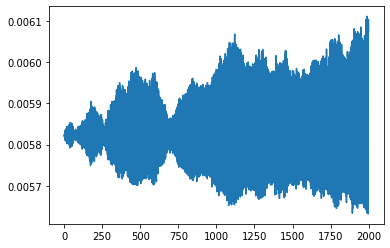

Weight value is  [[-3.06378113e-03 -1.58852722e-03 -8.57173575e-04 -6.29531889e-04
  -8.00354605e-04 -1.04942776e-03 -1.28774394e-03 -5.55982995e-04
   8.75665588e-05 -3.70757436e-04 -8.75627255e-04 -1.45137536e-03
  -7.76807435e-04 -6.49268090e-04 -8.11203323e-04 -1.25536611e-03
  -1.34239738e-03 -6.24479993e-04 -2.93211253e-04 -7.99766925e-05
  -9.63656513e-04 -1.42312496e-03 -7.61505605e-04 -3.82388930e-04
  -7.47436995e-04 -8.82580034e-04 -1.71184686e-03 -1.08210162e-03
  -4.31165510e-04 -6.13908974e-04 -1.28769369e-03 -1.69137260e-03
  -1.81471440e-03 -2.00489658e-03 -2.77178558e-03 -2.33988581e-03
  -2.36069808e-03 -3.20610640e-03 -2.07575325e-03 -2.44030704e-03
  -1.31161921e-03 -2.04291546e-03 -2.43209705e-03 -6.41689029e-04
  -2.48499104e-03 -1.58001275e-03 -2.58474332e-03 -1.75146662e-03
  -1.51315877e-03 -2.82720477e-03 -1.24596368e-03 -2.02523852e-03
  -1.95550974e-03 -1.74975458e-03 -2.79876518e-03 -1.57613307e-03
  -1.97609207e-03 -1.43699100e-03 -2.19413839e-03 -2.737047

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

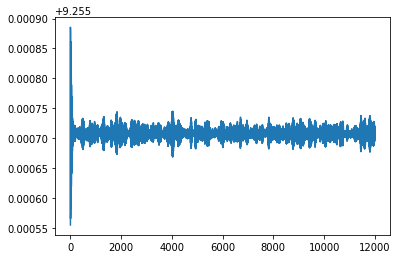

Weight value is  [[ 5.11018414e-06 -5.39808821e-06  4.50049897e-06 -1.28113466e-05
  -1.48263837e-05  2.91279475e-06 -1.74986132e-05  1.14893313e-05
  -1.55449543e-05  1.10622751e-05 -1.14433219e-05  7.94215176e-06
  -3.57211451e-06 -1.87170887e-05  1.28674710e-05  2.18830659e-06
   2.62478227e-06  1.31040686e-05  1.01930179e-05 -1.11269029e-05
   1.10581854e-05  1.67063715e-05  1.95930210e-06  1.19655525e-05
  -8.09022364e-06  1.69532025e-05 -1.34836281e-05 -1.70175782e-05
   4.40978934e-06 -1.23272711e-06 -1.07255299e-05  1.55174805e-05
   1.93913007e-05 -1.53157127e-05 -9.26710869e-06  1.12075097e-05
   2.76211997e-06 -1.91950993e-05 -1.42042133e-05  1.60112854e-05
  -9.29368396e-07 -6.87732114e-06  4.80434383e-06 -2.74669450e-06
   3.72049246e-06 -1.85625350e-05 -1.33227952e-05  1.25712697e-05
  -1.11519758e-05 -6.29985803e-06  1.92015914e-05  1.88608847e-06
   9.00610821e-06  8.85424470e-06 -5.90474459e-06 -5.53456864e-06
   1.70842935e-05 -1.99389006e-05 -6.47013954e-06  1.868550

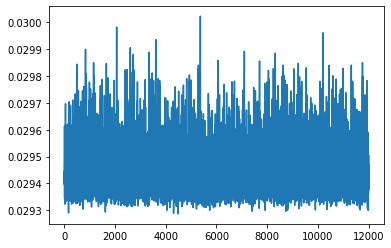

Weight value is  [[-5.18321334e-05 -4.52809014e-06 -2.72611623e-05 -2.69927476e-05
   1.43870167e-06  1.25075532e-05 -4.18819394e-06 -3.85590277e-05
  -4.39478855e-05  1.63565868e-07  1.64160713e-06 -8.97182939e-06
  -9.46831853e-08 -2.50957086e-06 -3.03841121e-05 -2.17667154e-05
  -1.67476532e-05 -1.26259833e-05 -3.53736610e-05 -1.23415753e-05
  -1.41962760e-05 -1.00940275e-05 -3.74849103e-05 -2.02579147e-05
  -1.86037562e-05 -2.95249611e-05 -2.66744980e-05 -2.20825155e-05
  -1.03260809e-05 -3.44364659e-06 -4.52623360e-06  1.88971426e-06
  -2.43611051e-05 -2.68135915e-05 -5.28890759e-05 -1.96519815e-05
  -1.46014817e-05 -2.45068576e-05 -1.96942216e-05 -3.54273038e-05
  -1.04093948e-05 -8.58779060e-06 -4.21758611e-05 -3.63004735e-05
  -3.08839997e-05 -3.97783050e-05 -2.22346072e-05 -4.19366002e-05
  -3.52649268e-05 -5.40230175e-05 -1.50621492e-05 -3.83388843e-05
  -4.57623792e-05 -1.94861813e-05 -2.16042952e-05 -2.76330171e-05
  -2.60093261e-05 -2.94817248e-05 -2.94174804e-05 -6.046563

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

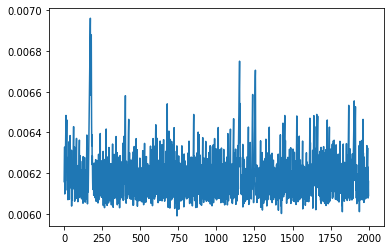

Weight value is  [[-4.52235883e-05 -3.27613479e-05 -2.92159449e-05 -1.26384421e-05
  -1.96433499e-05 -1.07882747e-05 -2.83874162e-05 -2.52137692e-07
   1.10907612e-05 -1.21357529e-05  6.32459020e-06 -4.57412479e-05
  -2.11571236e-05  5.14485427e-06 -2.03900053e-05 -4.70021883e-06
  -3.86337150e-05  5.62568272e-06  3.45516983e-07 -3.28191866e-05
  -2.90625410e-06 -1.12704021e-05 -2.85407379e-05 -5.97523971e-06
  -5.52227754e-06 -2.00131965e-06 -1.75326919e-05 -1.51240152e-05
  -2.23230887e-05 -3.51876175e-05  6.85804966e-07  1.09988705e-05
  -3.91691576e-05 -3.18700758e-06 -3.07637757e-05 -4.46605726e-05
  -1.45722921e-05 -1.74892224e-05 -2.37721936e-05 -2.81161433e-05
  -2.62465787e-05 -9.26715177e-06 -2.91345458e-05 -2.13396490e-05
  -4.51397961e-05 -3.35256474e-05  6.21761775e-07 -1.64169701e-05
  -1.55649829e-06 -3.28329564e-05 -2.52358612e-05  2.88989234e-06
  -1.67181125e-05 -1.85454673e-05 -5.56158176e-05 -2.08252554e-05
  -2.85802756e-05 -1.66483205e-05 -8.31378329e-06 -1.571745

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

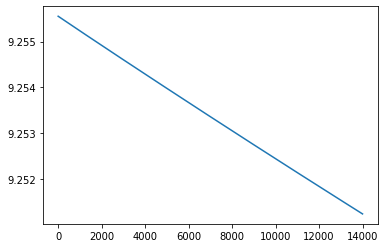

Weight value is  [[ 3.35202038e-05 -2.39069289e-04  1.58227884e-03  4.43419803e-03
   9.04495947e-04 -2.94840572e-03 -1.99608903e-04  2.97362705e-03
   6.25033049e-03  3.75982054e-03  1.44113759e-04 -7.59009870e-04
   1.80027832e-03  3.85490565e-03  2.21357587e-03  1.73233411e-04
  -9.08394031e-04  2.01811949e-03  2.45322751e-03  4.43154212e-03
  -9.83480109e-04 -7.92624450e-04  1.50213474e-03  3.59406306e-03
   9.76517070e-04 -2.40055065e-04 -1.53940720e-03  5.00380453e-04
   2.90195280e-03  1.13244461e-03 -1.26683844e-03  3.89354544e-04
   5.68513507e-04 -3.54575169e-03 -7.37376041e-04 -3.03937865e-03
  -6.59970617e-03 -5.91260812e-03 -1.82274047e-03  8.15861811e-04
   6.46860461e-04 -3.55191595e-03 -3.92153197e-03  8.13995107e-03
   5.28380461e-04 -2.43628484e-03 -4.49366301e-03  2.71998673e-04
   3.02251205e-03 -1.59314047e-03  1.93012445e-03 -2.29225516e-03
  -8.85124474e-04  2.66740842e-03 -2.36876158e-03 -1.18596389e-03
  -1.06888987e-03  1.05954889e-03 -2.17526218e-03 -7.158575

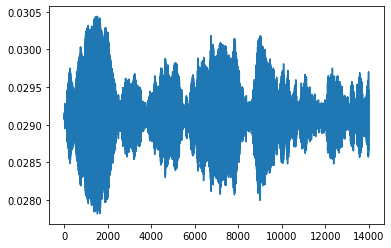

Weight value is  [[-9.19483385e-04 -2.53000385e-04  9.76817902e-04  3.19547802e-03
  -7.08597471e-06 -3.34750615e-03 -2.08776856e-04  2.44669492e-03
   5.54255650e-03  2.80674371e-03 -3.01215372e-04 -8.53074593e-04
   1.05532094e-03  3.02158552e-03  1.25027984e-03 -2.04839013e-04
  -8.51950931e-04  1.86131571e-03  2.15528441e-03  3.69311019e-03
  -1.18190665e-03 -1.19566661e-03  1.03473448e-03  3.47483727e-03
  -3.06013295e-04 -8.98149676e-04 -1.88281094e-03 -1.23353728e-04
   2.68716624e-03 -1.70006920e-04 -1.65794223e-03 -7.16176821e-05
   7.52879884e-04 -4.22324860e-03 -1.71733102e-03 -3.04243229e-03
  -6.76208948e-03 -6.32400300e-03 -2.36630464e-03 -4.53310509e-05
   8.52312064e-06 -3.23065752e-03 -4.31556016e-03  7.43591324e-03
  -4.11605389e-04 -3.10659857e-03 -4.83934508e-03 -7.57971662e-04
   2.59404207e-03 -2.60977062e-03  9.47828581e-04 -1.76295095e-03
  -1.86894848e-03  2.18447262e-03 -3.02072808e-03 -1.94224395e-03
  -1.21624163e-03  3.19212743e-04 -3.09766785e-03 -1.285499

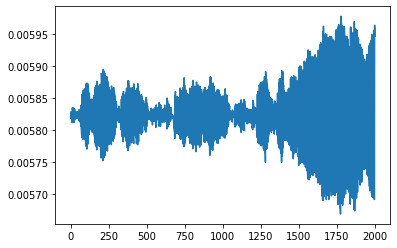

Weight value is  [[1.82872445e-03 7.46366197e-04 9.30453758e-04 1.15100727e-03
  4.13893758e-04 2.11582589e-04 6.86179009e-04 1.28021756e-03
  1.42054422e-03 8.42419244e-04 8.66677990e-04 1.03793042e-03
  1.42268576e-03 1.50526894e-03 9.74471440e-04 8.62905196e-04
  5.20675454e-04 1.23271074e-03 1.02985214e-03 1.31166494e-03
  5.64030318e-04 5.15941445e-04 1.29872265e-03 1.49912638e-03
  1.11564401e-03 5.07226291e-04 2.27835122e-04 1.18066246e-03
  1.39493048e-03 9.41926657e-04 2.39419261e-04 9.00865249e-04
  1.41455131e-03 6.20678781e-04 1.47402998e-03 8.05511141e-04
  2.89904987e-04 1.05202275e-04 9.46914885e-04 1.57973690e-03
  9.24712851e-04 7.70674417e-05 6.22054987e-04 2.00813646e-03
  1.24710621e-03 8.00475704e-04 3.25396798e-04 1.01101587e-03
  1.79856801e-03 1.24429576e-03 1.17580656e-03 1.13264554e-04
  1.09385494e-03 1.17980907e-03 1.12572178e-03 9.08289342e-04
  5.33745150e-04 8.46061274e-04 2.50768177e-04 1.32511899e-03
  1.17603807e-03]] 

Accuracy is  0.5126050420168067 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


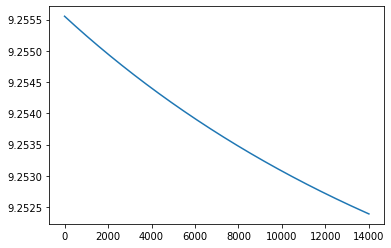

Weight value is  [[ 8.82797064e-06 -1.80956667e-04  1.17458958e-03  3.29293175e-03
   6.69644418e-04 -2.18874600e-03 -1.52003988e-04  2.20711363e-03
   4.64081256e-03  2.78880988e-03  1.05626898e-04 -5.69496841e-04
   1.33618715e-03  2.86207446e-03  1.64014858e-03  1.25973970e-04
  -6.81368212e-04  1.49803774e-03  1.82238529e-03  3.28658864e-03
  -7.31785532e-04 -5.95927160e-04  1.11379303e-03  2.66755665e-03
   7.22372841e-04 -1.80544172e-04 -1.15089282e-03  3.69995507e-04
   2.15396043e-03  8.38424032e-04 -9.42347773e-04  2.75980926e-04
   4.05887672e-04 -2.64468670e-03 -5.61343597e-04 -2.26733331e-03
  -4.91296404e-03 -4.40440726e-03 -1.36627172e-03  5.90971464e-04
   4.70749590e-04 -2.64919366e-03 -2.92486411e-03  6.03111756e-03
   3.78518857e-04 -1.81806556e-03 -3.34858806e-03  1.87224706e-04
   2.23223970e-03 -1.19513670e-03  1.42351775e-03 -1.71371161e-03
  -6.70587758e-04  1.96977724e-03 -1.77094773e-03 -8.88660498e-04
  -8.05609134e-04  7.73391023e-04 -1.62410629e-03 -5.444514

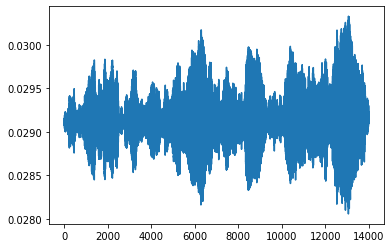

Weight value is  [[ 3.32472645e-04  2.62807073e-04  1.57202168e-03  3.09022014e-03
   1.57876209e-03 -2.61613689e-03  6.47618728e-04  2.75948237e-03
   4.69994664e-03  3.63500579e-03  2.20908612e-04 -1.25268157e-04
   1.13383482e-03  2.29000747e-03  2.15790058e-03 -3.64001216e-04
  -1.82780105e-04  1.51592290e-03  1.56313046e-03  4.18149800e-03
  -1.04424785e-03 -1.84792039e-04  8.90876207e-04  1.95293398e-03
   1.32606889e-03 -4.82724630e-04 -8.54391334e-04  3.93919788e-04
   1.86379165e-03  1.59062631e-03 -1.16090933e-03  3.21589483e-04
   8.23577185e-04 -2.78596552e-03 -6.51791955e-04 -2.05156852e-03
  -5.08424605e-03 -3.97596590e-03 -1.55587817e-03  4.90373351e-04
  -6.51081182e-05 -2.67525553e-03 -2.25242243e-03  6.74616744e-03
   6.00988065e-04 -1.34425856e-03 -3.04683672e-03  7.16715528e-04
   2.49834977e-03 -7.93751242e-04  9.31989961e-04 -1.53420332e-03
  -5.41525420e-04  2.83336118e-03 -1.44276642e-03 -8.67347111e-04
  -6.06232913e-04  1.16106871e-03 -9.29099820e-04 -2.629621

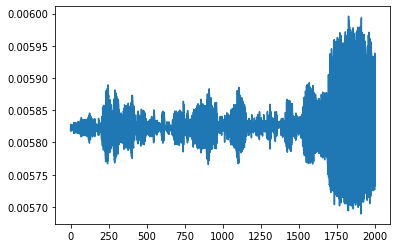

Weight value is  [[ 1.54489266e-03  1.30124653e-03  7.76144432e-04  1.12111551e-03
   4.00189749e-04  2.58976772e-04  8.90892036e-04  1.27209280e-03
   1.34502800e-03  6.65979866e-04  6.99476408e-04  3.53130562e-04
   7.57135650e-04  1.02626566e-03  9.28573512e-04  7.64894927e-04
   6.01828367e-04  1.29744892e-03  1.08402675e-03  1.06014821e-03
   2.59177656e-04  5.06061168e-04  1.08212855e-03  1.51769844e-03
   7.02588160e-04  2.79477693e-04  4.51039753e-04  1.10302991e-03
   1.27790510e-03  6.77812729e-04  2.30866854e-04  6.87658830e-04
   8.60196819e-04  1.44870859e-04  1.46052494e-03  6.33729230e-04
  -2.85820306e-04 -1.13894183e-04  3.71666236e-04  1.69191095e-03
   9.16212068e-04  2.43837753e-04  9.90721040e-05  1.74530392e-03
   1.52301492e-03  8.01205018e-04  1.95972529e-05  3.87734419e-04
   1.38304436e-03  1.18352308e-03  8.76100118e-04  2.21095063e-04
   9.27994356e-05  7.48170809e-04  1.17373393e-03  9.90696402e-04
   8.31363736e-04  6.36377740e-04  4.25098071e-04  1.309315

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


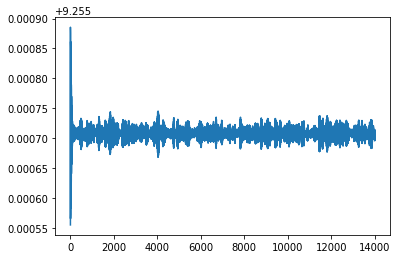

Weight value is  [[-1.27274591e-05 -1.75204761e-05 -5.98045887e-06 -1.86744076e-05
   8.97234228e-06  2.21584253e-05  2.08610233e-05  1.71768842e-05
   1.56330142e-05 -5.82501899e-06 -2.08939887e-06  5.54488472e-06
   1.46042951e-05 -1.80666482e-05 -3.71643554e-06  1.38161976e-05
   2.18409263e-05  1.90568713e-05 -6.84196543e-06  2.07893530e-05
  -5.83785914e-06  8.26723217e-06  2.10562188e-05  1.77305794e-05
  -2.06685139e-05  1.60397954e-05  3.04812564e-06 -8.58150389e-06
   1.41495250e-06  9.83067716e-06  2.12482433e-05 -1.56190009e-05
   3.91130075e-06  1.59161787e-05  7.98795860e-06 -2.06347769e-05
  -4.95557456e-07 -1.86051126e-05 -5.28860742e-06 -1.50202950e-05
   1.01980406e-05 -1.92431204e-05 -2.06074814e-05  5.76912250e-07
  -2.18602091e-05 -2.87161380e-06  1.82380565e-05  3.45713624e-06
   2.07733043e-05 -1.85514419e-05 -1.13148360e-05 -9.01840022e-06
   1.42952902e-05 -8.38614819e-06  4.41103954e-06  1.23268758e-05
   1.21367717e-06 -4.47268899e-06  3.73389428e-06 -4.400539

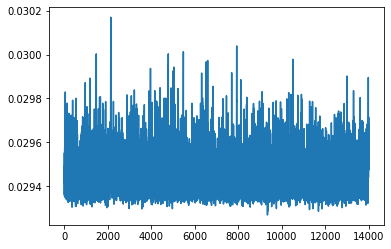

Weight value is  [[ 3.17728305e-05 -4.42395072e-07 -9.53771345e-06 -4.44400717e-06
  -1.02675024e-05 -2.92079180e-05  4.04083032e-06 -4.17420591e-05
  -4.00001298e-05 -3.86253525e-05 -1.48800601e-05 -2.41755030e-05
  -2.84364616e-05 -4.36137028e-06 -4.24772607e-05 -2.07758517e-06
  -2.09156687e-05 -4.67276525e-06 -3.74055407e-06 -3.75274563e-05
   8.88202492e-06 -3.00342322e-05 -3.69813085e-05 -8.20098463e-06
  -2.19739941e-05 -1.07568562e-05 -1.81570073e-05 -1.34579443e-05
  -9.06642168e-06 -3.10329085e-05 -1.56993298e-05 -1.89933122e-05
   5.83426706e-05 -2.88704514e-06  8.09864424e-05  3.07381215e-05
  -2.53813539e-06  4.30974117e-05  8.07313305e-06  5.95383707e-05
  -6.32058190e-06 -8.02925887e-06  3.79385455e-05  1.08383473e-05
   5.55196191e-05  9.89528734e-06 -1.62546147e-05  5.18866041e-05
   3.72858354e-05  5.78903469e-05 -5.17958116e-07 -1.23873511e-05
   4.32466135e-05 -1.75890463e-05  1.25801488e-05  7.78131280e-06
   2.42621822e-05  4.66671240e-05 -9.67853568e-06  3.039888

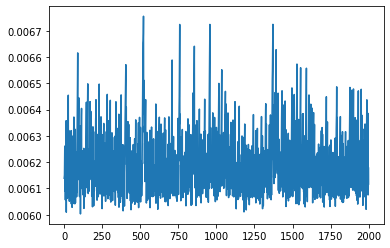

Weight value is  [[-5.21057157e-05  3.39436725e-05  2.45719911e-05  4.65446343e-05
   5.25895480e-06 -1.12020756e-05  2.48020270e-05  4.59131783e-05
   3.86365409e-05  3.39205765e-05  2.11734739e-05  3.54973627e-05
   2.23390554e-05 -1.28753089e-06  3.16332564e-05  2.58881662e-05
   1.81771502e-05  3.46104405e-05  2.26685642e-05 -2.57905700e-06
   2.90690457e-05  1.59861052e-05  2.89786158e-05  3.38629117e-05
   2.04550264e-05  2.46254052e-05 -1.25533509e-06 -1.13254753e-05
   3.02420396e-05  1.63731904e-05  2.52043868e-06  1.42045505e-05
   2.00199387e-05 -2.27185620e-05  4.61624209e-06 -9.71263652e-06
   2.00029967e-05  4.93197693e-06 -2.81979110e-05 -7.11340018e-06
   5.57546034e-06  2.23391754e-06  2.79066127e-05  2.13200580e-05
   1.64482813e-06  7.96903339e-06  4.60422233e-05  3.54102915e-05
   2.75125278e-05  2.36171357e-05  1.23154887e-05  2.42015120e-05
   2.75315014e-05  2.26780065e-05  2.38944204e-05  7.63847141e-06
   1.99571646e-05  6.09350641e-06  5.35361436e-05  1.538781

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


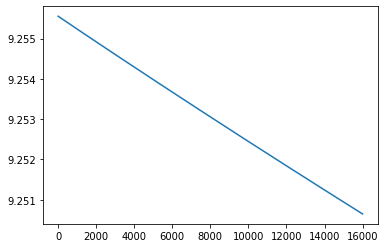

Weight value is  [[ 5.21353116e-05 -2.74160656e-04  1.80040433e-03  5.05349489e-03
   1.03007165e-03 -3.37076980e-03 -2.28167500e-04  3.38843499e-03
   7.12907378e-03  4.29184581e-03  1.62847247e-04 -8.63035911e-04
   2.04869523e-03  4.39430791e-03  2.52717531e-03  1.98978927e-04
  -1.03166221e-03  2.29781599e-03  2.79291943e-03  5.06020758e-03
  -1.12343383e-03 -8.97569183e-04  1.71080744e-03  4.09785574e-03
   1.11366643e-03 -2.72923633e-04 -1.75000744e-03  5.66354104e-04
   3.30723242e-03  1.29146814e-03 -1.44660074e-03  4.62612670e-04
   6.71351399e-04 -4.03419006e-03 -8.29022497e-04 -3.46071122e-03
  -7.51853312e-03 -6.73184869e-03 -2.06443399e-03  9.46251585e-04
   7.48406001e-04 -4.04020311e-03 -4.46098044e-03  9.30965999e-03
   6.15941019e-04 -2.77367317e-03 -5.11518671e-03  3.30371329e-04
   3.46482313e-03 -1.80903354e-03  2.21294605e-03 -2.60256569e-03
  -9.94293067e-04  3.05676592e-03 -2.69521823e-03 -1.34824327e-03
  -1.20566652e-03  1.22584291e-03 -2.47515222e-03 -8.064254

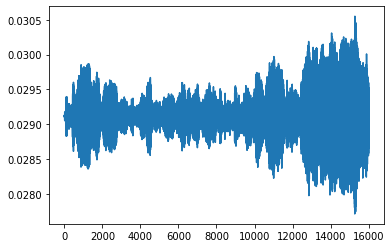

Weight value is  [[ 1.20448434e-03  5.68351412e-04  2.34620279e-03  4.98322271e-03
   1.40759635e-03 -2.79230976e-03  1.47902305e-03  4.90576828e-03
   8.23510188e-03  4.74227341e-03  7.45178651e-04 -8.01797720e-04
   2.99991959e-03  4.67688064e-03  2.74830657e-03  2.93808535e-04
  -9.68649599e-05  3.31193426e-03  3.72127935e-03  6.00457822e-03
  -8.54509281e-04 -1.25267891e-03  2.87566107e-03  5.03822674e-03
   1.74982427e-03 -1.11319741e-04 -1.52891955e-03  1.70048246e-03
   4.70172434e-03  2.01008001e-03 -1.10338416e-03  5.30642084e-04
   9.70401944e-04 -3.15745715e-03 -2.17847944e-05 -2.83257298e-03
  -7.92364677e-03 -7.17602067e-03 -1.47388156e-03  1.87907262e-03
   1.04169102e-03 -3.57391620e-03 -3.95932476e-03  1.02211500e-02
   1.46095328e-03 -1.72218054e-03 -4.59637438e-03 -1.55104682e-04
   3.79990301e-03 -8.85830373e-04  3.02811336e-03 -2.22693535e-03
  -3.92778237e-04  3.56860491e-03 -1.58411871e-03 -4.77704136e-04
  -9.56056360e-04  8.25657084e-04 -1.60681389e-03  2.096238

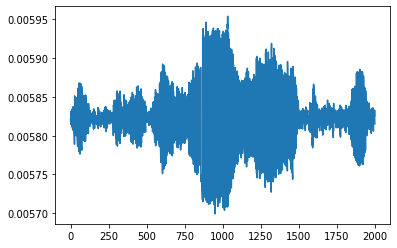

Weight value is  [[-2.92716930e-04 -3.13614538e-04  4.98477979e-04  6.52088768e-04
   5.36544230e-04 -7.38669775e-04 -1.38575304e-04  9.18122891e-04
   9.82351645e-04  7.87408098e-04 -1.07824618e-04 -4.04844499e-04
   9.04750531e-05  2.87581888e-04  2.87070264e-04 -1.38601427e-04
  -2.13492853e-05  7.04063278e-04  4.55821468e-04  8.71719265e-04
  -8.80908594e-05 -4.38466947e-04  1.16690154e-04  1.57675962e-04
   3.92701583e-04 -2.63893701e-04 -5.58800742e-04 -1.02494026e-04
   2.92634835e-04  1.99721318e-04 -5.00051176e-04  8.34598210e-04
  -6.03654085e-04 -1.43525076e-03 -2.36652772e-04 -1.58764424e-04
  -1.16955423e-03 -1.52664174e-03 -5.49628624e-04 -1.36185972e-04
   3.10961552e-04 -8.41230847e-04 -1.04889940e-03  1.19560894e-03
   8.41774844e-05 -3.10619075e-04 -6.98536367e-04 -8.08819192e-05
   6.49305798e-04 -4.83458539e-04 -1.86604569e-04 -8.25637260e-05
  -2.11194198e-04  1.66427951e-04 -2.70328231e-04 -4.20186451e-04
   4.98517169e-05  2.95779384e-04 -3.23166235e-04 -1.269708

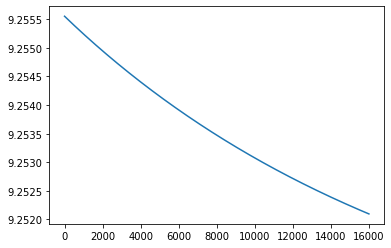

Weight value is  [[ 1.83093012e-05 -1.98823746e-04  1.28569900e-03  3.60837693e-03
   7.33611543e-04 -2.40386618e-03 -1.66544640e-04  2.41840256e-03
   5.08840154e-03  3.05979605e-03  1.15172957e-04 -6.22478997e-04
   1.46272644e-03  3.13682380e-03  1.79988166e-03  1.39088798e-04
  -7.44152821e-04  1.64050819e-03  1.99541463e-03  3.60679651e-03
  -8.03066511e-04 -6.49381160e-04  1.22008658e-03  2.92416769e-03
   7.92233777e-04 -1.97284163e-04 -1.25816093e-03  4.03607975e-04
   2.36039520e-03  9.19426314e-04 -1.03390512e-03  3.13283776e-04
   4.58254420e-04 -2.89347307e-03 -6.08024132e-04 -2.48193483e-03
  -5.38096689e-03 -4.82168808e-03 -1.48938402e-03  6.57380971e-04
   5.22468173e-04 -2.89790473e-03 -3.19963383e-03  6.62688815e-03
   4.23115641e-04 -1.98991062e-03 -3.66516185e-03  2.16945317e-04
   2.45752043e-03 -1.30509847e-03  1.56756827e-03 -1.87177166e-03
  -7.26198799e-04  2.16808907e-03 -1.93722297e-03 -9.71313938e-04
  -8.75281548e-04  8.58083956e-04 -1.77685294e-03 -5.905808

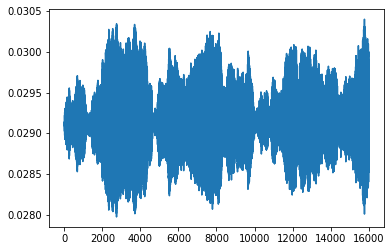

Weight value is  [[ 1.93005919e-03  4.03662885e-04  2.30015529e-03  4.50679488e-03
   8.06756724e-04 -2.36209749e-03 -3.72465843e-05  3.64908658e-03
   6.18716833e-03  3.22465793e-03  5.35283936e-04 -7.95481013e-04
   2.63846001e-03  4.13918593e-03  1.94562764e-03  2.30569440e-04
  -4.43908580e-04  3.19579025e-03  3.23075716e-03  4.01202751e-03
  -5.92629551e-04 -5.27906637e-04  2.77144302e-03  4.70452722e-03
   1.34947054e-03 -1.50642164e-04 -6.18015281e-04  2.44692791e-03
   4.54480588e-03  1.75559811e-03 -8.01962759e-04  1.70332212e-03
   1.56178805e-03 -1.99533846e-03  1.09146708e-03 -1.47798577e-03
  -3.43380227e-03 -3.44157769e-03 -9.52481821e-04  2.18421235e-03
   1.16729664e-03 -1.16186123e-03 -1.76392760e-03  7.55097002e-03
   1.99722037e-03 -8.49232295e-04 -2.13180694e-03  1.26466628e-03
   3.41294506e-03  3.15015766e-04  2.71481842e-03 -3.36009935e-04
   4.76859484e-04  3.08127864e-03 -1.97039981e-04 -1.91396345e-04
   6.62594479e-04  1.26182424e-03 -1.06371256e-03  9.084388

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


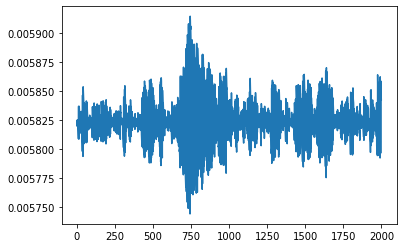

Weight value is  [[ 3.11048898e-04 -2.08749261e-04 -2.04616039e-04  2.26704684e-04
   1.29076152e-04 -2.36936094e-04 -2.06905953e-04  1.22006514e-04
   6.33085550e-04  4.03939025e-04  5.16477879e-04 -3.31579568e-04
   1.79784696e-04  4.79304291e-04  5.75184625e-04  5.40435644e-04
  -4.49354941e-05  4.44285720e-04  4.93687923e-04  9.75543611e-04
   3.86616571e-04 -5.45122852e-05 -2.18879722e-04  7.45926526e-05
   2.42483459e-04  3.11272536e-04 -2.39134602e-04 -5.53347799e-04
   3.88407139e-05  2.59843228e-04  3.19036393e-04  5.49847632e-04
   4.91820021e-04 -4.27922781e-05  5.84919550e-05 -2.50232868e-04
  -2.20421154e-04 -1.26653209e-05  2.31838827e-04  4.94563698e-04
   1.26168212e-04  5.00658795e-05  1.64367116e-05  7.87504948e-04
   1.59499460e-04 -2.51130764e-04 -1.67773911e-04  3.70024254e-04
   4.12558600e-04 -1.46157749e-04  6.61638047e-06 -4.69587764e-05
   4.13489749e-04  4.88756679e-04 -1.25447349e-04 -3.66002369e-05
   2.31907307e-04  7.87120625e-04 -3.45333656e-04  2.243910

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


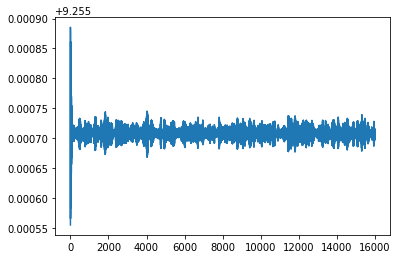

Weight value is  [[ 1.42703929e-05  1.52862028e-05 -1.65165487e-05  2.03986339e-05
  -1.22838369e-05 -3.62623307e-06  1.41519114e-05 -2.22030054e-05
   1.75556784e-06  2.22340819e-05  7.22971177e-06  3.07277992e-06
  -1.22840538e-05 -1.74748830e-05 -2.03602458e-05 -1.95932740e-05
  -4.01773209e-06 -2.00485059e-05  2.10741869e-05  7.64700895e-06
   2.22343877e-05 -2.39845613e-07 -4.90788948e-06 -2.15661648e-05
   1.16966660e-05  1.50953387e-05  1.95043716e-05 -2.13045120e-07
  -1.64045301e-06  2.08405749e-05  8.18930201e-06 -1.83782721e-06
  -1.16658012e-05  2.05613923e-06 -1.98912347e-05 -7.58456014e-06
  -3.84330965e-06 -1.81130933e-05  3.54056052e-06 -1.18656475e-06
   2.12394103e-05  1.33052914e-05 -1.11448995e-06  3.81690772e-06
  -2.57486503e-06  1.27250698e-05  4.71187952e-06 -5.75355237e-06
   7.60839197e-06  1.40657063e-05  3.07927358e-06 -2.00082471e-05
   1.94862729e-05  1.92822117e-05  1.45912417e-05 -1.49040829e-05
  -1.47449743e-05  1.08948658e-05  1.38511838e-05  1.737862

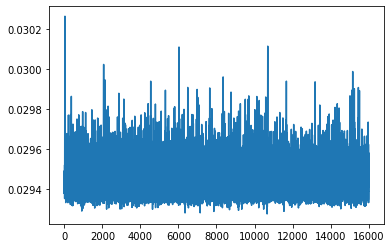

Weight value is  [[-2.81136382e-05 -3.47239143e-05 -4.90626909e-06 -1.43166396e-05
  -3.58964806e-05 -2.44941669e-06 -2.89075182e-05 -1.67755196e-05
  -2.79639545e-05  2.13293744e-06 -2.59772789e-05  2.96023103e-06
  -9.92715627e-06 -3.47851229e-05 -2.87696228e-06  2.20752145e-06
  -1.17033143e-06  1.59030590e-06 -5.88758855e-06 -3.48107102e-05
  -3.12682388e-05 -2.72734992e-05 -3.03111834e-05 -3.54485179e-05
  -2.95035527e-05  4.83952745e-06 -1.54714182e-05 -3.47654730e-05
  -2.54711210e-05 -3.19143370e-05 -1.16731483e-05 -1.60033392e-06
  -4.96217018e-06  1.87156719e-06 -1.61473193e-05 -2.87983467e-05
   1.96850632e-06 -3.06840833e-05 -4.04421703e-05 -1.63152713e-05
  -3.29338090e-05 -2.17852316e-05 -4.08692089e-05  2.65905400e-06
  -6.99911364e-06 -1.46611229e-05 -2.31509570e-05  3.77907101e-07
  -1.79754006e-05 -1.77890084e-05 -2.44913865e-05 -1.63408511e-05
  -2.27687562e-05 -3.57217617e-05 -3.51726164e-05 -2.28948683e-05
  -2.69187921e-05 -3.80902706e-05 -4.85818008e-05 -2.139151

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

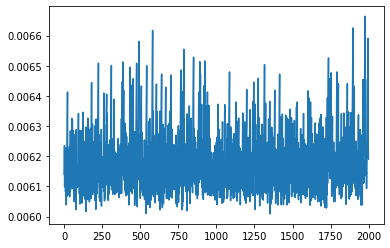

Weight value is  [[-1.30623648e-04  5.31253261e-06  1.03201064e-05 -3.04007673e-05
  -1.23738537e-06 -1.39498264e-05 -1.92677799e-05 -1.98100610e-05
  -1.29035526e-05 -1.28810618e-05 -1.92039780e-05 -3.52528382e-05
  -2.20005601e-05  2.21160953e-06 -3.07289542e-05  5.02076317e-06
  -2.04159652e-06 -4.96359497e-06 -8.51173665e-06 -3.59830272e-05
  -1.87488792e-05 -3.71825700e-05  4.99380404e-06 -2.67932734e-05
  -7.88152265e-06  1.65144704e-06 -3.18110012e-05  1.66916624e-05
  -1.62294068e-05  7.48050144e-08  5.87780561e-06 -4.04944720e-05
  -2.36983818e-05 -5.80057346e-05 -7.48367508e-05 -3.65531110e-05
  -1.37619401e-05 -4.29972004e-05 -1.26282214e-05 -4.91322795e-05
   1.89344189e-06  2.18387412e-07 -2.57035967e-05 -4.77369809e-05
  -7.06754849e-05 -5.11970868e-05 -4.35375042e-05 -2.73728284e-05
  -1.09303643e-05 -8.12181388e-05  8.35399095e-06  8.41479076e-08
  -2.03473074e-05 -3.34646312e-05 -7.76414115e-05 -4.40510731e-05
  -1.78474838e-05 -3.96985514e-05 -2.19050023e-05 -6.447931

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

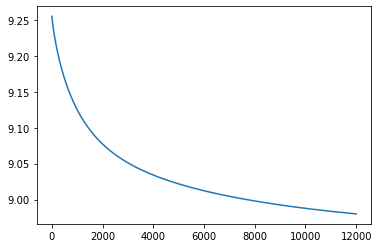

Weight value is  [[ 0.36163823  0.16076147  0.09779342 -0.01930548 -0.4819677  -1.36290265
  -0.39772985 -0.01112132  0.71301496  0.53219262  0.26611931 -0.21426435
  -0.07875774  0.43830366  0.12889784  0.5014836  -0.09255111  0.25785593
  -0.72872683  1.02242176 -0.32217245  0.16897445 -0.04828738  0.30657563
  -0.42959937  0.16806483  0.00717583 -0.09385533  0.05659632 -0.3940144
  -0.20106909  0.5617263   0.49907654 -0.59339602 -0.14358325 -0.69923664
  -0.5181722  -0.77628207 -0.09157538  0.87546834  0.17835886 -0.28038144
  -0.43195224  1.03817597  0.6244421  -0.18938647 -0.25544002  0.44818271
   0.48760731 -0.73651835  0.25349162  0.00245822  0.21421316  0.32372103
  -1.06292285 -0.15780132  0.271259    0.17211153 -0.59498083 -0.13739451
   0.24036885]] 

Accuracy is  0.4957983193277311 

Precision is  0.5066666666666667 

Classification Report is                precision    recall  f1-score   support

         0.0       0.48      0.36      0.41        58
         1.0       0.5

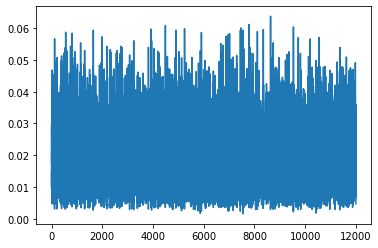

Weight value is  [[ 0.40719572  0.32042242 -0.15019967  0.01077341 -0.60713651 -1.47678277
  -0.41083809 -0.16015427  0.95159897  0.78506738  0.2695802  -0.33611305
  -0.14585776  0.32235015  0.00894424  0.56846821 -0.09222507  0.10094559
  -0.70091135  1.27597261 -0.26528914  0.243699    0.02644541  0.11887589
  -0.52833488  0.38167236  0.04875452 -0.01725435  0.13443009 -0.42819152
  -0.24903253  0.58375034  0.68174022 -0.47615776 -0.3666358  -0.84968077
  -0.79420553 -0.86447479 -0.23647347  0.79537213 -0.05725454 -0.64548375
  -0.66069698  1.19674806  0.54003209 -0.2814304  -0.38829826  0.55620815
   0.54963223 -0.85052769 -0.14032237 -0.01111983  0.22739459  0.35310991
  -1.30854445 -0.25077409  0.27107451  0.22631823 -0.610499   -0.13057537
   0.33604129]] 

Accuracy is  0.47058823529411764 

Precision is  0.3333333333333333 

Classification Report is                precision    recall  f1-score   support

         0.0       0.48      0.93      0.63        58
         1.0       0

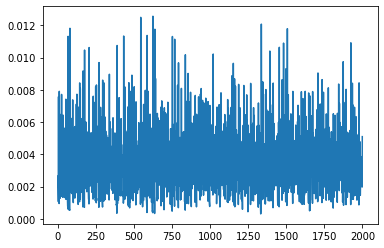

Weight value is  [[ 0.01921369  0.02279718 -0.06463431  0.31148426 -0.22183244 -0.23194764
  -0.14225298  0.17724041  0.44802049  0.09101297  0.33097178  0.12079784
  -0.02397018  0.38803575  0.27440359  0.55372413  0.3246305   0.03450929
   0.2730409   0.58968913 -0.03739149  0.11216283  0.03975427  0.3033467
  -0.27081171  0.03582115  0.10971759 -0.19295144  0.10703469 -0.01674842
  -0.05519073  0.02758823  0.26241928 -0.3226867  -0.01515616 -0.10365878
  -0.35658752 -0.21024961 -0.05102102  0.09224522 -0.2831549  -0.60974027
  -0.59816156  1.20389322 -0.09195467 -0.13608146 -0.33953769 -0.13738929
   0.80109407 -0.43076595  0.04199701 -0.10873388  0.20056803  0.42812707
  -0.45357499 -0.1167725  -0.12165869  0.30762685 -0.31303378 -0.19511291
  -0.28820984]] 

Accuracy is  0.4789915966386555 

Precision is  0.49206349206349204 

Classification Report is                precision    recall  f1-score   support

         0.0       0.46      0.45      0.46        58
         1.0       0.

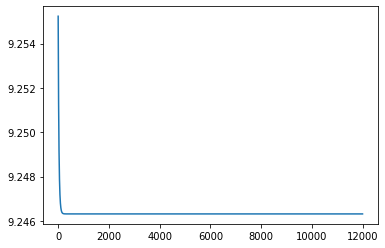

Weight value is  [[ 0.0001989  -0.00082266  0.00322251  0.0096663   0.00179255 -0.00716773
  -0.00068647  0.00638958  0.01400951  0.00851786  0.00013826 -0.00182757
   0.00366977  0.00844468  0.00494055  0.00035131 -0.00208758  0.0042107
   0.00515679  0.01013226 -0.00241415 -0.00170758  0.00309897  0.00788812
   0.00201908 -0.0005974  -0.00345783  0.0007162   0.00626167  0.0023806
  -0.00305544  0.00151745  0.00204117 -0.00790118 -0.00154845 -0.00697534
  -0.0148278  -0.01318794 -0.00375506  0.00215538  0.00169343 -0.00780438
  -0.00866159  0.01937272  0.00138899 -0.00559562 -0.00998046  0.00126222
   0.00736994 -0.00366849  0.00462935 -0.00490809 -0.00161139  0.00641905
  -0.00551557 -0.00278637 -0.00206082  0.00289785 -0.00496053 -0.00159123
   0.00375158]] 

Accuracy is  0.4369747899159664 

Precision is  0.44642857142857145 

Classification Report is                precision    recall  f1-score   support

         0.0       0.43      0.47      0.45        58
         1.0       0.4

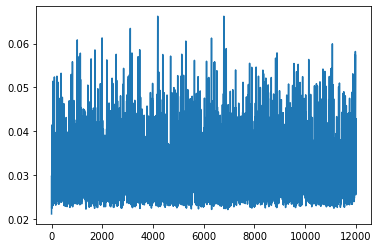

Weight value is  [[-0.05069692  0.01700087  0.02908     0.05210234  0.00538919 -0.0135727
   0.01426575  0.00375991  0.0297336   0.00648701 -0.01285457  0.00719922
   0.01644196  0.02880131 -0.00266919 -0.02779633 -0.00753236  0.01168693
   0.02301545  0.01148412 -0.0229944  -0.02985763 -0.0159166   0.01739646
  -0.00190833 -0.02426834 -0.04662657 -0.00652821  0.01631283  0.00021834
  -0.03203479 -0.0247351  -0.08529036 -0.08014191 -0.0600155  -0.05605092
  -0.08305272 -0.07849551 -0.07644767 -0.05083357 -0.02671031 -0.02684444
  -0.07038817 -0.04489537 -0.05402774 -0.04845569 -0.04421335 -0.05216122
  -0.04811103 -0.04996445 -0.03824455 -0.06272323 -0.04637935 -0.06018054
  -0.05333968 -0.04753828 -0.02963573 -0.03003486 -0.03956958 -0.05356457
  -0.04014198]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

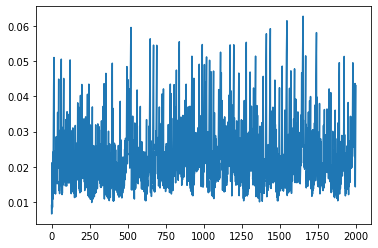

Weight value is  [[-0.11373916 -0.04253008 -0.05123025 -0.05665097 -0.02917463 -0.06851011
  -0.04251635 -0.06601649 -0.03889729 -0.00781394 -0.06309296 -0.04825021
  -0.0579779  -0.06760904 -0.0384831  -0.06456959 -0.03045855 -0.03467672
  -0.01946727  0.00628891 -0.05084962 -0.03055093 -0.01382064 -0.02330646
  -0.00555127 -0.02804438 -0.03667649 -0.0205363   0.00101426  0.00754226
  -0.03792578 -0.0289409  -0.06984687 -0.08163777 -0.08135379 -0.09185768
  -0.10065685 -0.04026478 -0.05735893 -0.08889577 -0.06281137 -0.02315358
  -0.07990264 -0.08115766 -0.08625961 -0.11440967 -0.10535605 -0.07693108
  -0.10452119 -0.09214447 -0.08979893 -0.04692285 -0.13122827 -0.07860718
  -0.10696427 -0.08373097 -0.04200889 -0.08318927 -0.1163849  -0.1031124
  -0.07120408]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

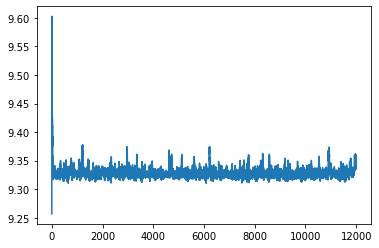

Weight value is  [[-0.01200299 -0.01332501 -0.00971453  0.00304564 -0.0077386   0.01084615
  -0.01542569 -0.01154399 -0.00162116 -0.01436855 -0.00533837 -0.00535657
  -0.01104936 -0.00349465 -0.00493062  0.00342523  0.00862936 -0.00470692
  -0.00554893  0.01393581  0.00627415  0.0053548  -0.01236638  0.00184067
   0.01211957  0.00885562 -0.00879679 -0.00446538  0.00687574 -0.00272689
  -0.0015921  -0.00285911 -0.0108184  -0.01329668 -0.01342237 -0.00200726
   0.01148122  0.00413289 -0.00728642 -0.00274729 -0.01210799  0.00743704
  -0.00210609  0.00169624 -0.00115789 -0.0136683   0.00499998 -0.00538911
   0.01025477 -0.01673408 -0.01292305 -0.00987766  0.00991781 -0.0142469
   0.00753864 -0.00714351 -0.00678205  0.00202276 -0.00179953 -0.0148719
  -0.00521338]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

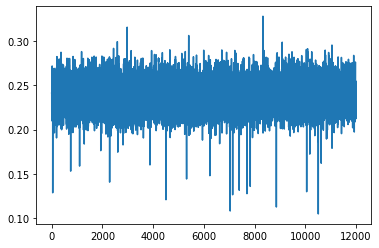

Weight value is  [[ 0.08101057  0.03208951  0.02435293  0.02606029  0.02310233  0.01195213
   0.01287899  0.01360291  0.00994526  0.01553329  0.00297251  0.02935947
   0.02868285  0.0085023   0.02330675 -0.00661158  0.00519395  0.02146063
   0.02117671  0.02749854 -0.00280067  0.02371412  0.01756665  0.0388395
   0.00726569  0.01065752  0.04038461  0.02150949  0.0209583   0.01470696
   0.00474893  0.00637508  0.05349765  0.03495442  0.0581247   0.02093798
   0.02170442  0.03824387  0.02324257  0.06351295  0.03301155  0.02167234
   0.00858873  0.03786644  0.06295714  0.03657231  0.0166494   0.0247117
   0.02313893  0.05914424  0.03625171  0.03314481  0.03192924  0.02250394
   0.06582076  0.00317524  0.00609628  0.00909119  0.03946224  0.05000529
   0.02733477]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


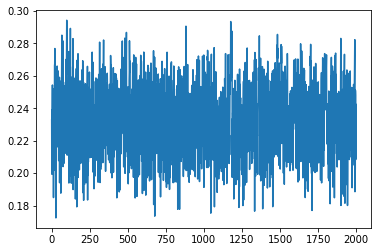

Weight value is  [[-0.01889476  0.02255923  0.0190835   0.00556194 -0.01922102 -0.00846812
  -0.00275132  0.01194277 -0.00803974 -0.00296434 -0.02378433 -0.01619149
   0.00907415 -0.01698238 -0.00405069 -0.0201483  -0.00762891  0.00623755
  -0.02763423 -0.00521975 -0.01799942 -0.02842453  0.0004369  -0.01009024
  -0.02149103 -0.00162361 -0.03726317  0.00713741 -0.01119714  0.00282413
  -0.01752079 -0.02796884 -0.06840606 -0.05556246 -0.03956818 -0.05338069
  -0.00953679 -0.03274826 -0.06317112 -0.03949009 -0.04467122 -0.0690639
  -0.04194527 -0.04631704 -0.02754456 -0.0390055  -0.04235006 -0.02439061
  -0.05023797 -0.0103708  -0.02623509 -0.04271285 -0.03941276 -0.03797429
  -0.02397618 -0.04446301 -0.03288312 -0.05194859 -0.03137997 -0.02057381
  -0.04702545]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

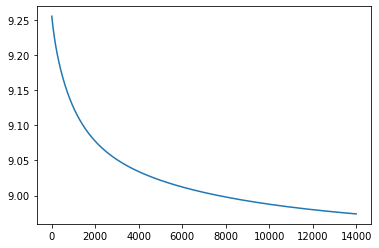

Weight value is  [[ 0.42239364  0.19961178  0.13156208 -0.03645049 -0.51358353 -1.46422342
  -0.44580832 -0.03589322  0.76068486  0.55509889  0.31799996 -0.24474262
  -0.10106545  0.47354955  0.13424324  0.54830714 -0.09320363  0.29604377
  -0.84232113  1.10456788 -0.35775002  0.18634547 -0.06851378  0.32677249
  -0.47010592  0.18576449  0.0163342  -0.093338    0.06872146 -0.44402101
  -0.20525464  0.57158452  0.50334932 -0.60395495 -0.17551041 -0.72964672
  -0.52312038 -0.78907095 -0.09650226  0.96577573  0.17830784 -0.2879189
  -0.43867832  1.04355637  0.69832997 -0.18305589 -0.26219963  0.45704302
   0.48834872 -0.81098794  0.2550569   0.0073647   0.21745029  0.32856846
  -1.15510029 -0.15152667  0.27720414  0.16165147 -0.60418339 -0.13293792
   0.24182722]] 

Accuracy is  0.47058823529411764 

Precision is  0.4864864864864865 

Classification Report is                precision    recall  f1-score   support

         0.0       0.44      0.34      0.39        58
         1.0       0.

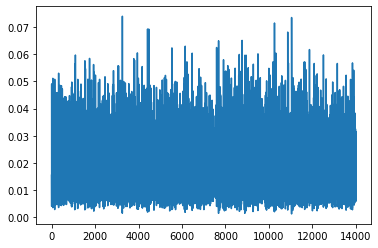

Weight value is  [[ 0.50214736  0.24611499  0.31590466  0.06034414 -0.41421239 -1.7696124
  -0.2020912   0.04317665  0.74542949  0.54031167  0.39224054 -0.09462471
  -0.03600284  0.36053716  0.28368863  0.64661373  0.03847973  0.40290368
  -0.76011775  1.24646216 -0.58444473  0.23286038 -0.09222113  0.31495237
  -0.59256052  0.30369152  0.23432116 -0.13384554  0.0347827  -0.47297938
  -0.38323352  0.77250442  0.72453633 -0.70332091 -0.0853986  -0.63456173
  -0.69137568 -0.80022077  0.03839746  1.06830529  0.44805386 -0.34318664
  -0.48685564  1.29526017  0.5847175  -0.36537983 -0.2943736   0.62246306
   0.84950897 -0.83453327  0.35625103  0.02826899  0.22646264  0.426026
  -1.12795664 -0.3510803   0.17658559  0.07582557 -0.59704902 -0.34134566
   0.22625587]] 

Accuracy is  0.5126050420168067 

Precision is  0.5132743362831859 

Classification Report is                precision    recall  f1-score   support

         0.0       0.50      0.05      0.09        58
         1.0       0.51 

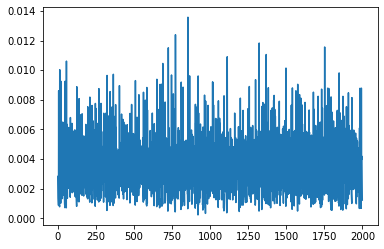

Weight value is  [[-0.16111342 -0.12736319  0.03632145 -0.1569987   0.22129837 -0.69128619
  -0.11874919  0.15043091  0.36991524  0.30267996 -0.33382565 -0.37222887
   0.05252397 -0.0752051  -0.15472798  0.0957206  -0.40325892  0.13615986
  -0.19095564  0.17739258 -0.28278938 -0.0287582  -0.02006188  0.23042648
  -0.17960503 -0.01772608  0.17060146  0.22187973  0.2580305  -0.12871459
   0.06119845  0.12107217  0.44330466 -0.38986164 -0.19580215 -0.24428188
  -0.1812349  -0.37069812 -0.07746744  0.18289964  0.22257112 -0.46188438
  -0.60283949  0.62966273  0.22669818 -0.35024981 -0.24926878  0.24364419
   0.65755704 -0.23470086  0.32549326 -0.3800756  -0.19533064  0.00582883
  -0.19006975 -0.24088356 -0.12506636  0.0240002  -0.17376781 -0.25101317
  -0.27285895]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

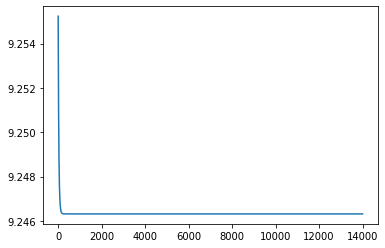

Weight value is  [[ 0.0001989  -0.00082266  0.00322251  0.0096663   0.00179255 -0.00716773
  -0.00068647  0.00638958  0.01400951  0.00851786  0.00013826 -0.00182757
   0.00366977  0.00844468  0.00494055  0.00035131 -0.00208758  0.0042107
   0.00515679  0.01013226 -0.00241415 -0.00170758  0.00309897  0.00788812
   0.00201908 -0.0005974  -0.00345783  0.0007162   0.00626167  0.0023806
  -0.00305544  0.00151745  0.00204117 -0.00790118 -0.00154845 -0.00697534
  -0.0148278  -0.01318794 -0.00375506  0.00215538  0.00169343 -0.00780438
  -0.00866159  0.01937272  0.00138899 -0.00559562 -0.00998046  0.00126222
   0.00736994 -0.00366849  0.00462935 -0.00490809 -0.00161139  0.00641905
  -0.00551557 -0.00278637 -0.00206082  0.00289785 -0.00496053 -0.00159123
   0.00375158]] 

Accuracy is  0.4369747899159664 

Precision is  0.44642857142857145 

Classification Report is                precision    recall  f1-score   support

         0.0       0.43      0.47      0.45        58
         1.0       0.4

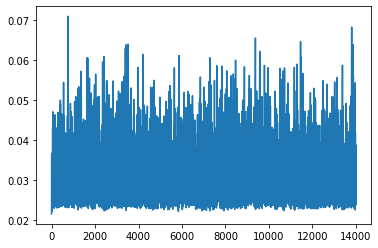

Weight value is  [[-0.09650568 -0.03650398 -0.01561338 -0.01500408 -0.00672772 -0.01852001
  -0.01850115 -0.02770678 -0.02540787 -0.01722613 -0.02948744 -0.03385177
  -0.03837396 -0.02874474 -0.00448517  0.00572693 -0.02523238 -0.02878317
  -0.03556383 -0.01045332 -0.0116253  -0.03100113 -0.05975309 -0.06665204
  -0.02714445 -0.01049605 -0.02971149 -0.05618327 -0.06690085 -0.03512677
  -0.0275797  -0.01254596 -0.06577605 -0.09091625 -0.07699502 -0.06354329
  -0.0337714  -0.05871813 -0.11638286 -0.07907709 -0.05382846 -0.02082288
  -0.05974432 -0.05928104 -0.07980447 -0.0579854  -0.0414727  -0.07609083
  -0.06736174 -0.08393887 -0.06060426 -0.02397399 -0.06107257 -0.05902365
  -0.07692546 -0.07168196 -0.04150687 -0.07232913 -0.03190279 -0.07829466
  -0.07493643]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

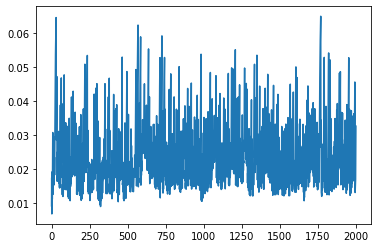

Weight value is  [[-0.09764659 -0.02479318  0.01894855 -0.02766446 -0.04113139 -0.01160488
  -0.04344032 -0.00969047 -0.05493297 -0.05289115 -0.00999184 -0.10080167
  -0.04580481 -0.07625132 -0.0481827  -0.04478792 -0.06473003 -0.02019448
  -0.08712367 -0.04702932 -0.03391892 -0.09062926 -0.035789   -0.07605562
  -0.04030578 -0.03339376 -0.06595654 -0.02553721 -0.06681883 -0.02747791
  -0.03217203  0.0021753  -0.09304364 -0.11920755 -0.09451402 -0.08667614
   0.04451563 -0.10223285 -0.09413382 -0.07708567 -0.06052105  0.00856188
   0.00687758  0.0349682  -0.0679744  -0.02751398  0.02076837 -0.01910894
  -0.02501382 -0.09576661  0.01431169 -0.03663732 -0.03234966 -0.05062023
  -0.07602543 -0.05311451  0.006942   -0.06751897 -0.02652582 -0.10830339
  -0.01812933]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

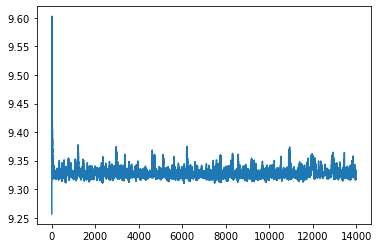

Weight value is  [[-4.29976965e-03 -1.03367877e-02  6.61377034e-03 -1.46066966e-02
  -1.95296815e-03 -5.29238868e-03 -8.64078476e-03  5.84645223e-04
  -3.47574232e-03  1.01711379e-02  3.89585649e-03  9.12576168e-03
   8.80852789e-03  9.88821808e-03  8.20835249e-03  1.36614895e-02
   1.04744478e-03  1.41615284e-02  1.36834840e-02  1.51971286e-02
   3.33636966e-05  8.65384203e-03 -9.22810583e-03  7.83351530e-03
  -2.92389130e-03 -1.23921728e-02  1.03942391e-02  8.03840645e-03
   3.15403349e-03  3.34491776e-03  1.11297997e-02  1.41360780e-02
   5.35955643e-03 -1.34902049e-02 -9.54204923e-03 -8.23686632e-03
  -1.08622200e-02 -7.38375192e-03 -3.92592459e-03  1.28940088e-02
  -1.08230117e-02  3.05802291e-03  5.49830375e-03 -4.06572059e-03
   5.12040420e-03  2.76066467e-03 -1.43932175e-02 -8.57044199e-05
  -6.04528116e-03 -1.44416106e-02 -3.77789588e-03 -1.23811071e-02
   6.34781880e-03  1.07707045e-02 -9.20635655e-03  9.89383804e-03
  -1.21593907e-02  6.41482961e-03 -1.16181731e-02 -5.629072

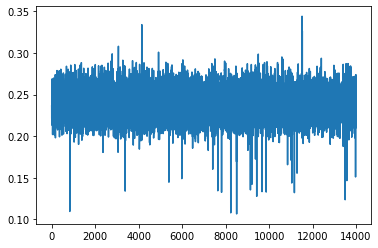

Weight value is  [[-0.05525041 -0.03588465 -0.0078975  -0.01843217 -0.00636356 -0.02165032
  -0.01319129 -0.0127705  -0.00023884 -0.01204521 -0.02647109 -0.0241819
   0.00034636 -0.0126758   0.0008343  -0.00827299 -0.03349322  0.00371182
  -0.0084841  -0.0113161   0.00490082 -0.02714061 -0.01619842 -0.00418214
  -0.01813329 -0.0111856  -0.01571287  0.00033059  0.00356565 -0.00071477
  -0.02450064 -0.00927374 -0.05223082 -0.03234754 -0.05810836 -0.055591
  -0.00187283 -0.04629515 -0.02849382 -0.06156605 -0.03264688 -0.02878815
  -0.04825321 -0.02356096 -0.04785078 -0.01047225 -0.00347163 -0.05248169
  -0.03062997 -0.04929456 -0.011558    0.00382487 -0.04619099 -0.01437055
  -0.05647384 -0.01665923 -0.00834454 -0.06234161 -0.02635185 -0.05641583
  -0.0156778 ]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

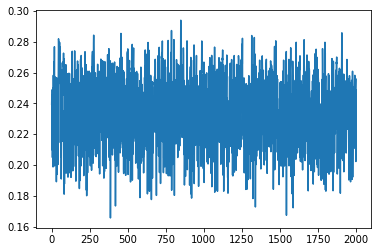

Weight value is  [[ 0.04049876  0.01330456  0.00642888  0.00603148  0.01071391  0.01600093
   0.01387988  0.02210328  0.0074058   0.0149716  -0.00346382  0.01349876
   0.0428404   0.02360428  0.0187223   0.00341749  0.01784636  0.03335751
   0.02753719  0.0408407  -0.00603     0.02077953  0.03067844  0.02900955
   0.01575027  0.01429672  0.04039393  0.02307599  0.01778006  0.00859433
  -0.00556012  0.04246546  0.03986207  0.00947565  0.03588984  0.02268597
   0.03654379  0.03741702  0.06114168  0.04139083  0.04619951  0.04655595
   0.01531825  0.06716965  0.02338959  0.0283839   0.05694247  0.01819859
   0.05077588  0.03384125  0.00543671  0.03860168  0.01395954  0.0248878
   0.02759248  0.01871923  0.05062057  0.05113455  0.02992067  0.03723232
   0.03605625]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


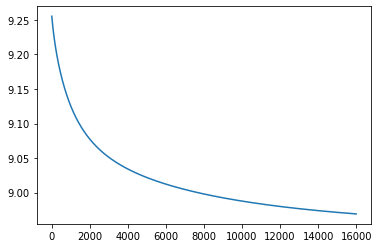

Weight value is  [[ 0.480384    0.23329398  0.16454009 -0.05297865 -0.53893033 -1.55023015
  -0.48940186 -0.05991387  0.80501091  0.57069943  0.36503253 -0.27228053
  -0.12162165  0.50531412  0.1398894   0.58678811 -0.09107534  0.33277723
  -0.94815697  1.17553504 -0.39159534  0.2012447  -0.08832704  0.34394721
  -0.50305019  0.20103853  0.02347453 -0.09455753  0.08337708 -0.48888567
  -0.20736259  0.57926653  0.5058709  -0.61142013 -0.20886302 -0.75382317
  -0.52720692 -0.79798462 -0.10131042  1.0438531   0.17795587 -0.29379268
  -0.44365378  1.04753338  0.76375727 -0.17842456 -0.26816279  0.46266356
   0.48696839 -0.87768844  0.25623769  0.01153644  0.21829976  0.33220336
  -1.23452947 -0.14617999  0.28117179  0.15334852 -0.61005588 -0.12674858
   0.24273684]] 

Accuracy is  0.453781512605042 

Precision is  0.47368421052631576 

Classification Report is                precision    recall  f1-score   support

         0.0       0.42      0.31      0.36        58
         1.0       0.

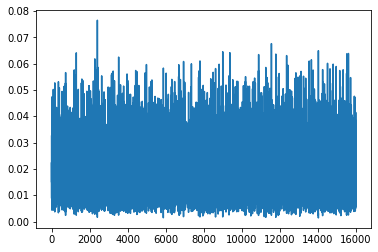

Weight value is  [[ 0.44823337  0.12380557  0.11169873 -0.12812108 -0.82933392 -1.78637324
  -0.4659401  -0.10138549  0.83008837  0.58505721  0.21766764 -0.32620116
  -0.02771908  0.38919273 -0.09136305  0.6193845  -0.17623473  0.25802265
  -1.01955068  1.15517991 -0.34808684  0.05514369 -0.02083188  0.39719238
  -0.70130626  0.18301389 -0.03962132 -0.04381143  0.19912141 -0.45029714
  -0.23644449  0.63697449  0.53119812 -0.56649999 -0.3437222  -0.9196144
  -0.77432109 -1.1428807  -0.1826264   1.02846734  0.47542966 -0.55683043
  -0.4485152   1.30549802  0.61881894 -0.28879072 -0.38696462  0.56352123
   0.52721601 -1.00965139  0.28266956 -0.23975632 -0.03397351  0.23710863
  -1.35048245 -0.05655332  0.40017474  0.23746448 -0.95960045 -0.2738159
   0.42198747]] 

Accuracy is  0.47058823529411764 

Precision is  0.3333333333333333 

Classification Report is                precision    recall  f1-score   support

         0.0       0.48      0.93      0.63        58
         1.0       0.3

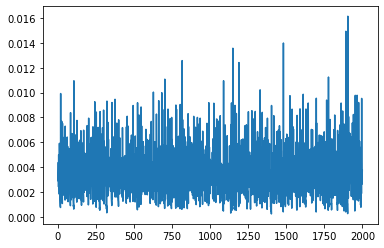

Weight value is  [[-0.03806831 -0.11472021  0.25976139  0.06582253 -0.30484978 -0.47468201
  -0.22374977  0.22150181  0.19351183  0.01709323 -0.22991216 -0.31354686
   0.36618045  0.41168123 -0.00304814 -0.15065961 -0.01957731  0.37187892
   0.15951943  0.32082327 -0.24164019  0.00722366  0.40314514  0.15935591
  -0.06320336 -0.10668557 -0.36142586 -0.19283204 -0.09999648 -0.29648821
  -0.53834491  0.33206939  0.25688248 -0.57244924 -0.1144125  -0.35270215
  -0.4824686  -0.84691425 -0.27447115  0.18535864  0.79205989 -0.37346715
  -0.21418143  0.78152325 -0.08788493  0.12892809 -0.08682493  0.00104665
   0.51384263 -0.13146425  0.4528251  -0.10910298  0.05711874  0.21565108
  -0.34030431 -0.03901644  0.0064261  -0.06271488  0.20494657 -0.04394102
   0.03169907]] 

Accuracy is  0.5042016806722689 

Precision is  0.5161290322580645 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      0.48      0.49        58
         1.0       0.

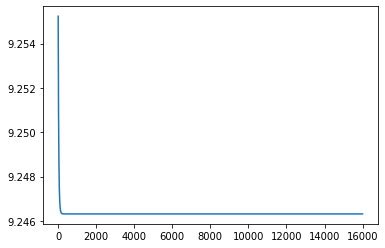

Weight value is  [[ 0.0001989  -0.00082266  0.00322251  0.0096663   0.00179255 -0.00716773
  -0.00068647  0.00638958  0.01400951  0.00851786  0.00013826 -0.00182757
   0.00366977  0.00844468  0.00494055  0.00035131 -0.00208758  0.0042107
   0.00515679  0.01013226 -0.00241415 -0.00170758  0.00309897  0.00788812
   0.00201908 -0.0005974  -0.00345783  0.0007162   0.00626167  0.0023806
  -0.00305544  0.00151745  0.00204117 -0.00790118 -0.00154845 -0.00697534
  -0.0148278  -0.01318794 -0.00375506  0.00215538  0.00169343 -0.00780438
  -0.00866159  0.01937272  0.00138899 -0.00559562 -0.00998046  0.00126222
   0.00736994 -0.00366849  0.00462935 -0.00490809 -0.00161139  0.00641905
  -0.00551557 -0.00278637 -0.00206082  0.00289785 -0.00496053 -0.00159123
   0.00375158]] 

Accuracy is  0.4369747899159664 

Precision is  0.44642857142857145 

Classification Report is                precision    recall  f1-score   support

         0.0       0.43      0.47      0.45        58
         1.0       0.4

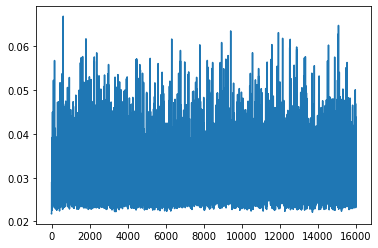

Weight value is  [[ 0.01764938  0.02924157  0.01367805  0.04269024  0.01519145 -0.01275879
   0.01794259  0.02288958  0.03684292  0.01087078  0.00685296  0.02085269
   0.02965152  0.03531469  0.00554945  0.0092268   0.01836416  0.02338677
   0.02887061  0.01763601  0.01445797  0.00533614  0.00960548  0.0239953
   0.00848249  0.0080727   0.00580648  0.00818124  0.02927426  0.00365511
   0.00871559 -0.03963396 -0.01260639 -0.01986636  0.01627883  0.00436186
  -0.05285831  0.00309825 -0.02030107  0.01090237  0.01524383 -0.01266988
  -0.01135973  0.03100047  0.01967987 -0.00743322 -0.03442587  0.02409119
  -0.00898584  0.00552583 -0.0071761  -0.00216273  0.01197017  0.01275164
   0.00995788  0.02298412 -0.00167954  0.02732096  0.01969955  0.01627281
  -0.0073645 ]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


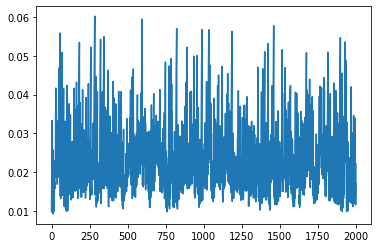

Weight value is  [[ 0.06517612  0.01081674  0.03571981  0.05392824  0.03318598  0.02267823
   0.0323897   0.03376924  0.03267198  0.01584627  0.02319109  0.03869209
   0.03573374  0.04716485  0.05454917 -0.01085935  0.06443475  0.02653598
   0.02704714  0.01283607 -0.01149532  0.03030294  0.03453662  0.05114558
   0.027607   -0.01593666  0.03676357  0.02449689  0.01645399  0.01890135
  -0.00684672  0.10134705  0.02582644  0.04745155  0.04878517 -0.01009726
   0.01861547  0.05077708  0.03757126  0.0546405  -0.01498116  0.0138326
   0.03905788  0.04455605  0.05776181  0.07105646 -0.03741892  0.06551574
   0.0268556   0.06889787  0.05911322  0.0684084   0.05284561  0.02126345
   0.05245586  0.04668096  0.05467488  0.07045853  0.06351499  0.06809152
   0.13395459]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


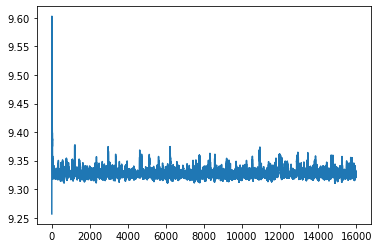

Weight value is  [[-0.01166751 -0.00051483  0.00599577  0.00893789 -0.01131727 -0.0001718
   0.00561991 -0.00835749  0.007926   -0.01057262  0.00236893  0.00145969
   0.00991717  0.00694061  0.00542461  0.01429117  0.00123693 -0.01440521
  -0.01112611  0.00039731 -0.01486623 -0.00732597  0.00659217 -0.00336472
  -0.00314    -0.01173037  0.00821007  0.00119163  0.01248731 -0.00509247
  -0.01465159  0.00892195 -0.0025304  -0.00697392 -0.01172579 -0.01310406
   0.00382918 -0.0130326   0.00724863 -0.00756569 -0.00170848  0.00613693
  -0.01209158 -0.00178301  0.0048506  -0.00631297  0.00347475  0.01123162
   0.01346399  0.01216085  0.01160397 -0.00681026  0.00582292  0.01102143
  -0.00303347  0.00201039 -0.01094009  0.01456702 -0.01500608 -0.00333723
   0.01385605]] 

Accuracy is  0.4789915966386555 

Precision is  0.49206349206349204 

Classification Report is                precision    recall  f1-score   support

         0.0       0.46      0.45      0.46        58
         1.0       0.

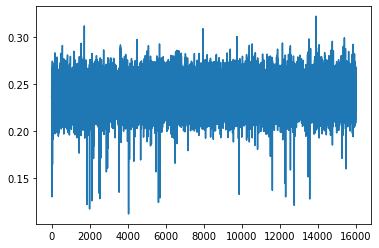

Weight value is  [[ 0.04786614  0.02608589 -0.00212238  0.01100609  0.01733981  0.00046742
   0.02985007  0.02359214  0.02262892  0.01707603  0.01019415  0.02850613
  -0.00778777  0.01365964  0.02745464  0.01024096  0.01125017 -0.00374316
   0.008068    0.01031638  0.00992303  0.0100424   0.01393195  0.000867
  -0.0044519   0.01957325  0.01264224  0.00331593  0.00749811  0.02165578
   0.00859305  0.03196485  0.05851814  0.05136071  0.03623003  0.0601926
   0.03347176  0.04056525  0.05176062  0.03425239  0.0283572   0.01897718
   0.04854401  0.0279271   0.04531084  0.03596903  0.03555879  0.05689881
   0.02526428  0.04639808  0.04177432  0.02377984  0.04680613  0.02388997
   0.0467684   0.01917574  0.02491407  0.04277795  0.02081822  0.05144919
   0.02989502]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


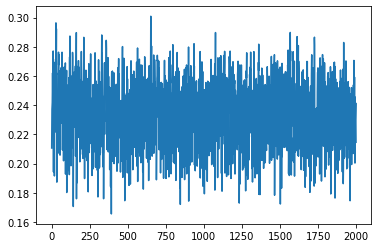

Weight value is  [[ 0.00495254  0.0287812   0.03355794  0.02263045  0.01488621  0.01071737
   0.02852958  0.01429184  0.02547862  0.02640966  0.00975354  0.03002673
   0.00948277  0.02208727  0.02975927  0.0195421   0.0093865  -0.00699257
   0.0024079   0.01243612  0.02354491  0.01768458  0.00733205 -0.01825115
   0.01077971  0.00595966  0.02962726  0.00179544 -0.01657419  0.0053515
  -0.01224371  0.0405671   0.03901664 -0.00858168  0.00749406  0.00828257
   0.00949873  0.0289427   0.01791203  0.02321671  0.04430374  0.04967009
   0.05761238  0.02967904  0.03696026  0.01388713  0.03590438  0.05439352
   0.03078301  0.01732978  0.03987331  0.0127051   0.02912801  0.04520868
   0.01374542  0.03530157  0.06189641  0.05150029  0.04133473  0.00897815
   0.00331581]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


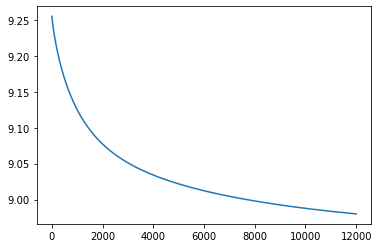

Weight value is  [[ 0.36163823  0.16076147  0.09779342 -0.01930548 -0.4819677  -1.36290265
  -0.39772985 -0.01112132  0.71301496  0.53219262  0.26611931 -0.21426435
  -0.07875774  0.43830366  0.12889784  0.5014836  -0.09255111  0.25785593
  -0.72872683  1.02242176 -0.32217245  0.16897445 -0.04828738  0.30657563
  -0.42959937  0.16806483  0.00717583 -0.09385533  0.05659632 -0.3940144
  -0.20106909  0.5617263   0.49907654 -0.59339602 -0.14358325 -0.69923664
  -0.5181722  -0.77628207 -0.09157538  0.87546834  0.17835886 -0.28038144
  -0.43195224  1.03817597  0.6244421  -0.18938647 -0.25544002  0.44818271
   0.48760731 -0.73651835  0.25349162  0.00245822  0.21421316  0.32372103
  -1.06292285 -0.15780132  0.271259    0.17211153 -0.59498083 -0.13739451
   0.24036885]] 

Accuracy is  0.4957983193277311 

Precision is  0.5066666666666667 

Classification Report is                precision    recall  f1-score   support

         0.0       0.48      0.36      0.41        58
         1.0       0.5

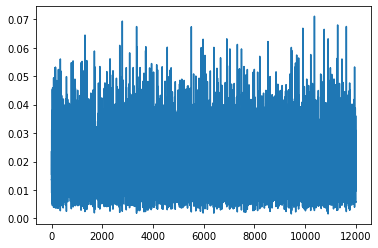

Weight value is  [[ 0.20752039 -0.23215097  0.32801743 -0.03482619 -0.71214494 -1.82976914
  -0.40762687 -0.04481364  0.70286225  0.51737511  0.21562635 -0.12357228
  -0.19370326  0.36277535 -0.13364132  0.29961444 -0.11380168  0.12410882
  -0.89435679  0.98560093 -0.30610677  0.45155728  0.03361572  0.47094835
  -0.32892012  0.37721281 -0.08496183 -0.22663238  0.04706232 -0.34444052
  -0.42625443  0.7769286   0.69963402 -0.91541608 -0.43899196 -1.02337084
  -0.64260958 -1.03979826 -0.26346869  0.74236943  0.23254857 -0.54003712
  -0.74360627  1.32753402  0.49406826 -0.21936814 -0.45625474  0.50131799
   0.53868174 -0.89412334  0.30334466 -0.24819317  0.20762831  0.24977729
  -1.09782027 -0.18450495  0.24457239 -0.05958452 -0.74912984 -0.26045727
   0.30385907]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

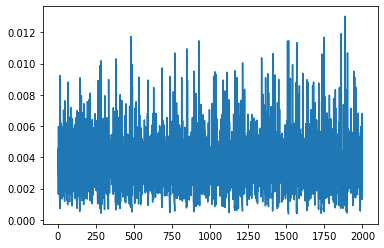

Weight value is  [[ 0.0175465   0.03133456  0.05748431  0.31378222 -0.02857576 -0.72465591
   0.13276317  0.2662866   0.49818304  0.30687729 -0.09816254  0.00188038
  -0.01482116  0.24611333 -0.07223989  0.15644297 -0.0920933  -0.07204637
  -0.09492514  0.20612734 -0.17060789  0.33639014  0.16833336  0.52142154
  -0.15303859  0.26461424  0.03543819  0.02880771  0.00214658 -0.25985998
  -0.00574161 -0.28469828  0.1237621  -0.32874582 -0.23082973 -0.29699659
  -0.96270298 -0.37933853 -0.34799167 -0.08920574  0.03753204  0.04893125
  -0.17192847  1.07689491  0.00282328 -0.027103   -0.47373833  0.23849917
  -0.11976645 -0.24923525  0.10672422 -0.04872499  0.08514511  0.46699247
  -0.27201418  0.01732308  0.1180213  -0.32937265 -0.50791738 -0.06702349
   0.41799741]] 

Accuracy is  0.4957983193277311 

Precision is  0.5172413793103449 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      0.76      0.59        58
         1.0       0.

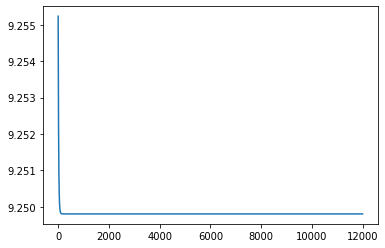

Weight value is  [[ 9.32667794e-05 -4.20346014e-04  2.09085805e-03  6.05909446e-03
   1.18256095e-03 -4.25811772e-03 -3.49985460e-04  4.03394287e-03
   8.65994456e-03  5.23933174e-03  1.42445358e-04 -1.08880342e-03
   2.38020092e-03  5.28013009e-03  3.06295525e-03  2.28756732e-04
  -1.27190256e-03  2.69846836e-03  3.29344395e-03  6.20413856e-03
  -1.42712430e-03 -1.07369039e-03  1.99852149e-03  4.92824266e-03
   1.30288155e-03 -3.50447083e-04 -2.13179266e-03  5.67949991e-04
   3.94615131e-03  1.52249633e-03 -1.82171406e-03  7.44426050e-04
   1.03547875e-03 -4.88924264e-03 -9.81400025e-04 -4.25508023e-03
  -9.14990724e-03 -8.16236388e-03 -2.41375246e-03  1.23939171e-03
   9.77140250e-04 -4.86742568e-03 -5.38547263e-03  1.16374796e-02
   8.02760730e-04 -3.41254406e-03 -6.19303264e-03  5.87626216e-04
   4.38052011e-03 -2.23027474e-03  2.77382000e-03 -3.09929871e-03
  -1.10351897e-03  3.83970757e-03 -3.33846960e-03 -1.67833124e-03
  -1.37217559e-03  1.63819462e-03 -3.03322318e-03 -9.804269

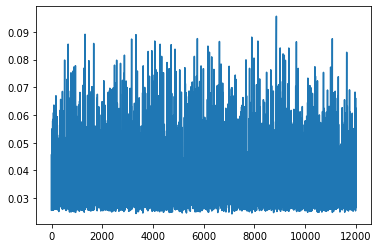

Weight value is  [[0.12304939 0.03871824 0.05785919 0.04897413 0.03754186 0.02174164
  0.03874882 0.0646602  0.04190493 0.03586446 0.02865035 0.0363643
  0.04614624 0.03138454 0.03885295 0.02238261 0.0398482  0.05173825
  0.03286444 0.04463743 0.01761172 0.03503027 0.0456376  0.04951551
  0.04305498 0.0193617  0.03796641 0.04908999 0.03273452 0.03349851
  0.0208945  0.07821758 0.07118419 0.0854357  0.09827013 0.08305052
  0.0623093  0.06052986 0.08761083 0.10624956 0.06206258 0.05446925
  0.0704825  0.09866818 0.0958535  0.07415898 0.05100107 0.06511682
  0.08109844 0.09129481 0.06325382 0.05749013 0.07611742 0.08050296
  0.0991699  0.05825391 0.05471196 0.07578431 0.07812653 0.09856714
  0.05793555]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51      1.00      0.68        61

    accuracy                

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


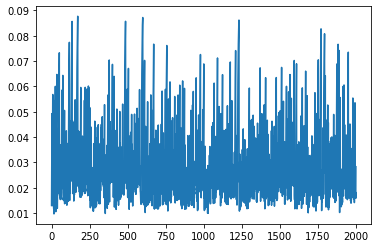

Weight value is  [[-0.06818566 -0.01776994 -0.02336545 -0.0133929  -0.00722472 -0.02201384
  -0.01375778 -0.0324198  -0.03005894 -0.00478079 -0.00386695 -0.01444137
  -0.05855132 -0.04159547 -0.03518356 -0.03642522 -0.01458979 -0.05053512
  -0.05596435 -0.0200763  -0.01762683 -0.00867243 -0.05154835 -0.04221109
  -0.03754765 -0.01053496 -0.01167838 -0.0405452  -0.04279119 -0.01567992
  -0.02024652 -0.06073351  0.00171452 -0.08484051 -0.05274885 -0.07866776
  -0.0467482  -0.01612113 -0.07500798 -0.0632073  -0.07372496 -0.03568478
   0.00850403 -0.01839331 -0.07214023 -0.06664822 -0.01861183  0.00657828
   0.00368276 -0.06118964 -0.04906004 -0.03380064 -0.03996473  0.00967802
  -0.05933951 -0.00908947 -0.02698604 -0.03511032  0.00030084 -0.05997967
  -0.05762082]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

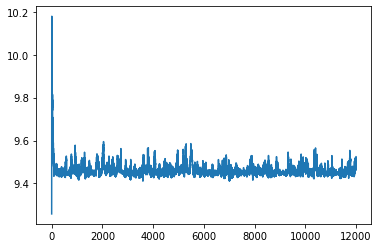

Weight value is  [[-2.30369504e-02 -1.41151681e-02  1.98201196e-02 -6.95332969e-03
  -2.14956081e-02  7.92022964e-03  1.51592476e-02  2.00161694e-02
  -5.06306116e-03 -1.94901433e-02  1.19055798e-02 -2.55060498e-02
  -3.70449775e-03  2.31241364e-02 -8.13794366e-03  2.36357840e-02
  -5.35025094e-03 -1.73672938e-02  1.98053900e-02  2.33013790e-05
  -1.32720091e-02 -2.67922325e-02 -2.63618715e-02 -1.16345519e-02
  -2.34456555e-02  2.05457961e-02 -1.46361238e-02  1.39214957e-02
  -7.16938049e-03  1.03067960e-02 -1.13816283e-02  1.34018822e-02
  -2.66448893e-02  1.26368367e-02  4.32306497e-03 -2.68958768e-02
   8.98999942e-03  1.45076464e-02 -1.04462832e-02 -1.63810677e-02
  -2.26442851e-02 -7.12196908e-03 -2.69859395e-03  1.46670929e-02
  -5.74830881e-03 -3.05238178e-03 -1.90568350e-02 -1.40132653e-02
   1.83442951e-02 -2.27862358e-02 -1.03070697e-02 -1.10709005e-02
  -2.75863173e-02  1.81810147e-02  1.37856557e-02 -2.25153637e-02
  -7.16527958e-03 -1.38350715e-02  1.63849182e-02 -1.973326

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

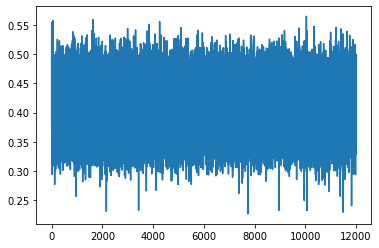

Weight value is  [[ 0.02566202  0.00314552  0.04552981  0.00642323 -0.00028717  0.03650364
   0.02883215  0.02220365  0.02316791 -0.00226095  0.03849212  0.0325008
   0.0144675   0.05642581  0.00542852  0.01486691  0.02381661  0.03373551
   0.04568479  0.03323809  0.0398578   0.01067907  0.01087456  0.05418243
   0.00457189  0.00391023  0.01820645  0.04669163  0.04436938  0.03552599
   0.00456764  0.03489999  0.04429082  0.05341386  0.01248708  0.04786438
   0.044117    0.02266895  0.05943333  0.03426693 -0.00474904  0.03963259
   0.04873255  0.04739757  0.01674142  0.05203172  0.04425399  0.01667532
   0.03353544  0.0202246   0.03417285  0.03966962  0.04257622  0.06588855
   0.04101293  0.06074302  0.03040658  0.03457715  0.05353694  0.02301273
   0.04323244]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


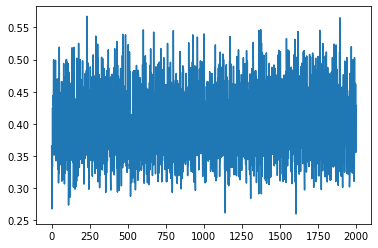

Weight value is  [[-0.05579615  0.000855   -0.02064995 -0.02299297 -0.03337106 -0.01523863
  -0.0038428   0.0126391  -0.02709044 -0.01911048  0.01075236 -0.01308026
   0.00500649 -0.00559443 -0.02612128  0.0145886  -0.00722799  0.00876861
  -0.02910484 -0.02683488 -0.02541354 -0.0178604  -0.02252275 -0.02679907
  -0.00054841 -0.0175143  -0.03029408 -0.02304694  0.00772743 -0.01203848
   0.00075094 -0.00653219 -0.05231803 -0.02518436 -0.02314031 -0.04493636
  -0.0497458  -0.03667574 -0.06239318 -0.07034108 -0.03134951 -0.03368293
  -0.03295591 -0.02365018 -0.05816988 -0.02170686 -0.02163715 -0.0536918
  -0.05296072 -0.05026125 -0.03595943 -0.04016202 -0.02337144 -0.01037038
  -0.01920059 -0.03846131 -0.02120554 -0.02929802 -0.00691658 -0.03683919
  -0.01818497]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

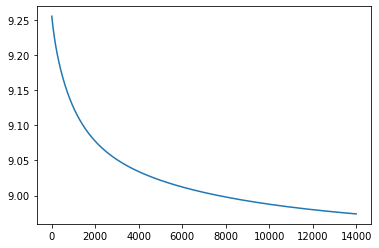

Weight value is  [[ 0.42239364  0.19961178  0.13156208 -0.03645049 -0.51358353 -1.46422342
  -0.44580832 -0.03589322  0.76068486  0.55509889  0.31799996 -0.24474262
  -0.10106545  0.47354955  0.13424324  0.54830714 -0.09320363  0.29604377
  -0.84232113  1.10456788 -0.35775002  0.18634547 -0.06851378  0.32677249
  -0.47010592  0.18576449  0.0163342  -0.093338    0.06872146 -0.44402101
  -0.20525464  0.57158452  0.50334932 -0.60395495 -0.17551041 -0.72964672
  -0.52312038 -0.78907095 -0.09650226  0.96577573  0.17830784 -0.2879189
  -0.43867832  1.04355637  0.69832997 -0.18305589 -0.26219963  0.45704302
   0.48834872 -0.81098794  0.2550569   0.0073647   0.21745029  0.32856846
  -1.15510029 -0.15152667  0.27720414  0.16165147 -0.60418339 -0.13293792
   0.24182722]] 

Accuracy is  0.47058823529411764 

Precision is  0.4864864864864865 

Classification Report is                precision    recall  f1-score   support

         0.0       0.44      0.34      0.39        58
         1.0       0.

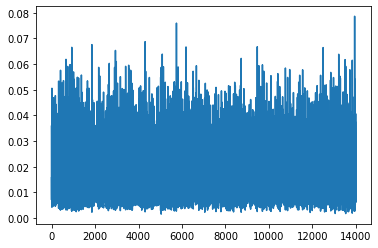

Weight value is  [[ 0.49544374  0.2131121   0.04127247 -0.06872499 -0.43846555 -1.77867207
  -0.57798376  0.23657377  0.79905622  0.76082861  0.27048908 -0.26960331
   0.12611042  0.56708127  0.43616916  0.67347797 -0.46186018  0.43596094
  -0.71421325  1.2666187  -0.51298117  0.30170249  0.06178954  0.42222474
  -0.52460775  0.05687382  0.02467251 -0.04075124  0.19760385 -0.48437121
  -0.44927309  0.88490957  0.54953865 -0.54536654 -0.30817531 -0.81422851
  -0.39528817 -0.99855581 -0.12380159  1.00473643  0.32039711 -0.19312588
  -0.43698165  1.35393444  0.58739834 -0.1670708  -0.16312584  0.59205498
   0.79184067 -0.68268145  0.12917344  0.22124984  0.03982914  0.37091622
  -1.14487515 -0.30676783  0.62831215  0.12148716 -0.52193506 -0.20412431
   0.39885276]] 

Accuracy is  0.5210084033613446 

Precision is  0.5178571428571429 

Classification Report is                precision    recall  f1-score   support

         0.0       0.57      0.07      0.12        58
         1.0       0.

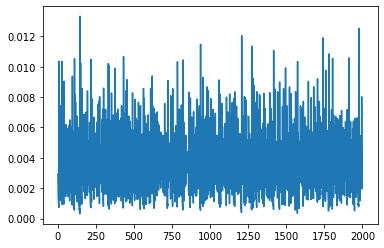

Weight value is  [[ 0.07373538  0.17662698  0.10298601  0.21085251 -0.04434774 -0.25112003
   0.04922793 -0.07268766  0.22790402  0.28314077 -0.11586409  0.35451446
   0.01632042  0.35248325  0.18378032  0.2552712  -0.06725285 -0.11735079
  -0.24710006  0.31853581 -0.12686315  0.16904122  0.18023294  0.05963865
   0.01512668  0.17916355 -0.09549321 -0.09071711 -0.03075477 -0.1153561
  -0.09988297 -0.21860352  0.15825612  0.09978421 -0.09960734 -0.39817471
  -0.31231548 -0.5107999   0.34141713  0.34799696 -0.03627226  0.06428671
  -0.40019146  0.6891889   0.14479107 -0.52371063 -0.28609586  0.50876599
   0.16933682 -0.15395229  0.20191263  0.18296503  0.29304289  0.57678788
  -0.24070331 -0.35174295 -0.0966763   0.21516309  0.20436787  0.07698542
   0.11855429]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


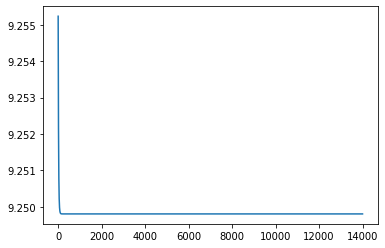

Weight value is  [[ 9.32667794e-05 -4.20346014e-04  2.09085805e-03  6.05909446e-03
   1.18256095e-03 -4.25811772e-03 -3.49985460e-04  4.03394287e-03
   8.65994456e-03  5.23933174e-03  1.42445358e-04 -1.08880342e-03
   2.38020092e-03  5.28013009e-03  3.06295525e-03  2.28756732e-04
  -1.27190256e-03  2.69846836e-03  3.29344395e-03  6.20413856e-03
  -1.42712430e-03 -1.07369039e-03  1.99852149e-03  4.92824266e-03
   1.30288155e-03 -3.50447083e-04 -2.13179266e-03  5.67949991e-04
   3.94615131e-03  1.52249633e-03 -1.82171406e-03  7.44426050e-04
   1.03547875e-03 -4.88924264e-03 -9.81400025e-04 -4.25508023e-03
  -9.14990724e-03 -8.16236388e-03 -2.41375246e-03  1.23939171e-03
   9.77140250e-04 -4.86742568e-03 -5.38547263e-03  1.16374796e-02
   8.02760730e-04 -3.41254406e-03 -6.19303264e-03  5.87626216e-04
   4.38052011e-03 -2.23027474e-03  2.77382000e-03 -3.09929871e-03
  -1.10351897e-03  3.83970757e-03 -3.33846960e-03 -1.67833124e-03
  -1.37217559e-03  1.63819462e-03 -3.03322318e-03 -9.804269

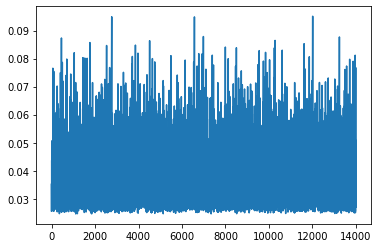

Weight value is  [[-0.01959514  0.01440261  0.00327142  0.02226318  0.01180516  0.02001704
   0.01856611 -0.00674176  0.00871542  0.01154814  0.01575291  0.00084065
  -0.01926981 -0.0083549  -0.00669708 -0.00434216  0.0244188  -0.01044533
  -0.00651505  0.00671433  0.00423511  0.00233225 -0.03607738 -0.02664367
   0.00214635  0.00086403  0.005426   -0.04083705 -0.02694618 -0.00313727
   0.00507965 -0.01521009 -0.03378958 -0.03744185 -0.01814242 -0.02666514
  -0.04190258 -0.02731302 -0.02783128 -0.02048413 -0.02490186 -0.02076036
  -0.03356638 -0.01139995 -0.01269958 -0.0021286  -0.02923059 -0.00792036
  -0.02873528 -0.00859026 -0.00142618  0.00302028 -0.00618201 -0.01463683
  -0.01422036  0.00575153 -0.01807039  0.019055   -0.02807008 -0.00757336
  -0.0010943 ]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

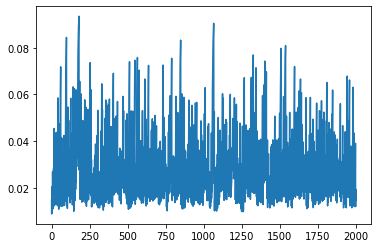

Weight value is  [[ 0.02829528  0.0067232  -0.00201445 -0.02461508  0.02193499 -0.00375116
   0.00698905 -0.0027155  -0.00658431  0.0326638   0.02370677  0.00580748
  -0.00910409 -0.02201976  0.03451633  0.03208911  0.03522641 -0.00626234
   0.00260323  0.03066679  0.0309683   0.0061082   0.00041586 -0.01275345
   0.01784683  0.03507078  0.03927123  0.01562291  0.00226185  0.01877403
   0.03296383  0.03034376  0.03382758  0.01826572  0.02163129  0.03713443
   0.00222463  0.04124902 -0.01594126  0.01299994  0.01580368 -0.008015
  -0.01537525  0.0650783   0.03110616  0.01054847 -0.06931444  0.06982206
   0.02184024  0.03568386  0.00026952  0.02821949  0.00503047  0.02747517
   0.00347418  0.00736816 -0.01660736  0.0422291   0.02313718  0.01516492
  -0.01551661]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


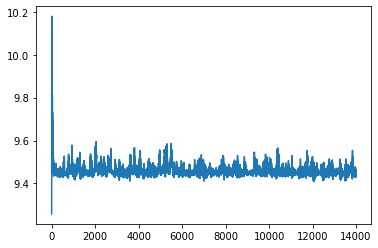

Weight value is  [[ 2.24401448e-02 -1.70624454e-02  1.59776048e-02  3.81504631e-03
   2.48342784e-02 -4.04089224e-03  1.53604966e-02  1.89935126e-02
   1.24676914e-02 -1.46457653e-02 -6.01279710e-03 -7.80481759e-03
   2.24623682e-02 -5.18822351e-03  2.38240727e-02  6.77639812e-03
  -9.80385212e-03 -1.14264922e-02 -1.09875760e-02  6.72311736e-05
   4.66053108e-03 -2.05068983e-02  3.07203542e-03  2.14929236e-02
  -1.95857120e-02 -6.32899468e-03 -1.33348200e-02  1.72261440e-03
  -2.33968407e-02 -1.42015783e-02  1.50728296e-02 -2.26891617e-02
   1.89275397e-02  2.06093550e-02 -1.98743164e-02  1.34413832e-02
   2.44760592e-02 -1.60486631e-02 -8.30428675e-03 -1.87348949e-02
  -1.07111129e-02 -2.62140622e-03  6.99457157e-03 -2.67240890e-03
   2.58508409e-03  2.11980910e-02  4.83742249e-04 -5.10535226e-03
   1.95876654e-02 -1.80075045e-02 -1.33614179e-02 -2.33401480e-02
   1.98691426e-02  2.07899570e-02  8.87873985e-03 -1.87592523e-02
   6.91283244e-03  1.11130545e-02 -2.48948190e-02  1.129482

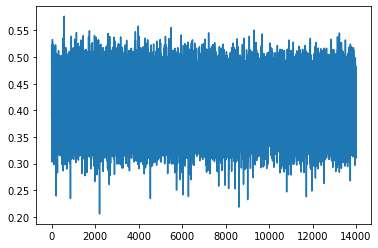

Weight value is  [[ 0.03034118  0.04020333  0.03379546  0.05459671  0.0423986  -0.00402926
   0.01185446  0.01876746  0.03850058  0.02372615  0.03327287  0.035777
   0.03578227  0.02573646  0.04968942  0.0079377   0.03232131  0.04916553
  -0.00074627  0.04440615 -0.00537251  0.02580716  0.0270914   0.02031945
   0.00384649  0.03611526  0.03653585  0.00782022  0.02120239  0.02051644
   0.0279923   0.05974098  0.05216741  0.06078258  0.03724122  0.04643977
   0.05122347  0.04101367  0.02484495  0.05347827  0.00769296  0.04324065
   0.00486572  0.02404251  0.0567395   0.03034814  0.03929607  0.01581069
   0.01625884  0.04751575  0.02933121  0.01571292  0.01040867  0.03039054
   0.01230068  0.04183006  0.02036552  0.04897343  0.03687465  0.03614979
   0.0353042 ]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


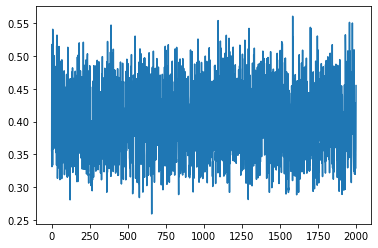

Weight value is  [[ 0.01638657  0.00459035  0.02745268  0.02105428  0.01583774  0.03016315
   0.02183891  0.02816216  0.04202537  0.02933119  0.0423023   0.02958451
   0.04650339  0.00122112  0.00103148  0.0273288   0.01644946  0.02108981
   0.02857615  0.01555299  0.00318302  0.01015674  0.02514811  0.04225801
  -0.00064864  0.01939212  0.02332563  0.01573152  0.01606159  0.00222404
   0.03143369  0.06664947  0.07248922  0.05963524  0.00917091  0.06330318
   0.04435972  0.05944117  0.05525441  0.02339768  0.03549264  0.05057797
   0.05675203  0.01990495  0.00768317  0.02852709  0.00048604  0.03558061
   0.02700685  0.00029728  0.01548156  0.04660881  0.0302905   0.05242805
   0.04960126  0.06092302  0.03355578  0.01874313  0.03153397  0.07619627
   0.02138804]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


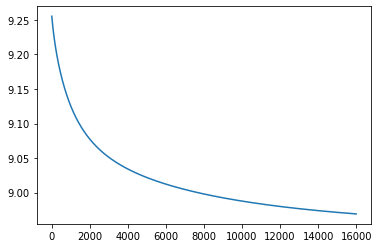

Weight value is  [[ 0.480384    0.23329398  0.16454009 -0.05297865 -0.53893033 -1.55023015
  -0.48940186 -0.05991387  0.80501091  0.57069943  0.36503253 -0.27228053
  -0.12162165  0.50531412  0.1398894   0.58678811 -0.09107534  0.33277723
  -0.94815697  1.17553504 -0.39159534  0.2012447  -0.08832704  0.34394721
  -0.50305019  0.20103853  0.02347453 -0.09455753  0.08337708 -0.48888567
  -0.20736259  0.57926653  0.5058709  -0.61142013 -0.20886302 -0.75382317
  -0.52720692 -0.79798462 -0.10131042  1.0438531   0.17795587 -0.29379268
  -0.44365378  1.04753338  0.76375727 -0.17842456 -0.26816279  0.46266356
   0.48696839 -0.87768844  0.25623769  0.01153644  0.21829976  0.33220336
  -1.23452947 -0.14617999  0.28117179  0.15334852 -0.61005588 -0.12674858
   0.24273684]] 

Accuracy is  0.453781512605042 

Precision is  0.47368421052631576 

Classification Report is                precision    recall  f1-score   support

         0.0       0.42      0.31      0.36        58
         1.0       0.

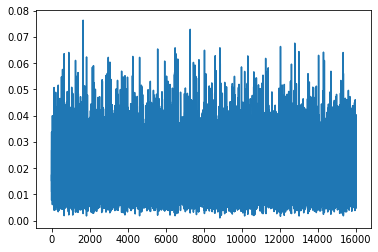

Weight value is  [[ 0.39810236 -0.02517867  0.24413669 -0.43144009 -0.53905127 -1.75702443
  -0.64420958 -0.06895562  0.75723981  0.74245438  0.32151211 -0.21585826
  -0.11926467  0.4589327   0.07307938  0.61452603 -0.15707809  0.14585037
  -1.05530215  1.30573917 -0.41161746  0.08244738 -0.04635983  0.53252875
  -0.50631036  0.11099691  0.05148273 -0.02427301  0.08351943 -0.36185337
  -0.05720849  0.98115719  0.66519586 -0.82610386 -0.38843542 -0.81643364
  -0.71554789 -1.06181765 -0.15192615  1.18173824  0.30192267 -0.31761448
  -0.56148877  1.38688684  0.60517225 -0.17272822 -0.37996815  0.50513756
   0.53448498 -1.12437499  0.312866    0.19193832  0.28733269  0.44033987
  -1.21786029 -0.40343372  0.54259832  0.09571083 -0.7123342  -0.11935433
   0.33027967]] 

Accuracy is  0.4789915966386555 

Precision is  0.4878048780487805 

Classification Report is                precision    recall  f1-score   support

         0.0       0.47      0.64      0.54        58
         1.0       0.

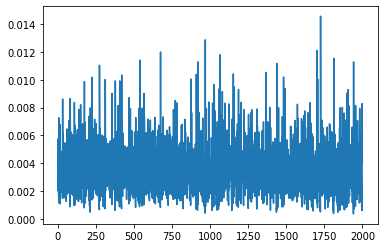

Weight value is  [[-0.07136158 -0.10400625  0.20285095  0.20199351  0.13095269 -0.42415618
  -0.06569394  0.01322888 -0.00313754  0.25753605 -0.09657826 -0.10207646
   0.04532204  0.0786732   0.33975856 -0.11267811  0.19474125  0.32135874
   0.08967827  0.63370768  0.09703893  0.10640189 -0.19858933  0.0097438
  -0.04549842 -0.0670819  -0.10151634 -0.38407719 -0.09644136 -0.01198774
  -0.2354432   0.73774194  0.09573053 -0.49736621  0.08263586 -0.1803344
   0.09713771 -0.24554964  0.16107406  0.26727038 -0.548662   -0.53881879
  -0.54332142  0.85321285  0.13226471 -0.26996023 -0.30152983  0.34397645
   0.62057743 -0.12292111  0.30887863  0.04362775 -0.05815275  0.07508699
  -0.06789152 -0.62374467  0.11681947 -0.2753089  -0.17679902 -0.07105161
   0.08802861]] 

Accuracy is  0.4369747899159664 

Precision is  0.38461538461538464 

Classification Report is                precision    recall  f1-score   support

         0.0       0.45      0.72      0.56        58
         1.0       0.3

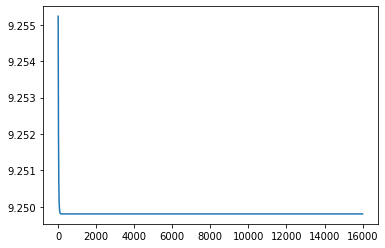

Weight value is  [[ 9.32667794e-05 -4.20346014e-04  2.09085805e-03  6.05909446e-03
   1.18256095e-03 -4.25811772e-03 -3.49985460e-04  4.03394287e-03
   8.65994456e-03  5.23933174e-03  1.42445358e-04 -1.08880342e-03
   2.38020092e-03  5.28013009e-03  3.06295525e-03  2.28756732e-04
  -1.27190256e-03  2.69846836e-03  3.29344395e-03  6.20413856e-03
  -1.42712430e-03 -1.07369039e-03  1.99852149e-03  4.92824266e-03
   1.30288155e-03 -3.50447083e-04 -2.13179266e-03  5.67949991e-04
   3.94615131e-03  1.52249633e-03 -1.82171406e-03  7.44426050e-04
   1.03547875e-03 -4.88924264e-03 -9.81400025e-04 -4.25508023e-03
  -9.14990724e-03 -8.16236388e-03 -2.41375246e-03  1.23939171e-03
   9.77140250e-04 -4.86742568e-03 -5.38547263e-03  1.16374796e-02
   8.02760730e-04 -3.41254406e-03 -6.19303264e-03  5.87626216e-04
   4.38052011e-03 -2.23027474e-03  2.77382000e-03 -3.09929871e-03
  -1.10351897e-03  3.83970757e-03 -3.33846960e-03 -1.67833124e-03
  -1.37217559e-03  1.63819462e-03 -3.03322318e-03 -9.804269

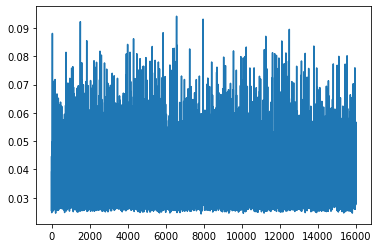

Weight value is  [[-0.04583299  0.01833194 -0.03575709 -0.01909044 -0.00090886 -0.0150935
   0.02100786 -0.03544109 -0.00974041  0.00164552 -0.01464552  0.01743976
  -0.03914716 -0.02711059 -0.00158679 -0.00284965  0.01576985 -0.04348477
  -0.03947927 -0.00345233 -0.01206268  0.01155795 -0.05318701 -0.0537335
  -0.02513267 -0.01191991  0.00974884 -0.0564063  -0.055324   -0.01728269
  -0.01302026 -0.03504384 -0.01948481 -0.00885757 -0.03433497 -0.03184338
  -0.05769635 -0.03503415 -0.01207195 -0.03302608 -0.02680068 -0.03202411
   0.00219931  0.00307592 -0.03225011 -0.02110119 -0.04045553 -0.00170644
   0.00026261 -0.03605917 -0.02876473 -0.03563292 -0.00038839 -0.0225208
  -0.02964243 -0.00691163 -0.0482462  -0.00222448 -0.01518198 -0.03358118
  -0.00776472]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

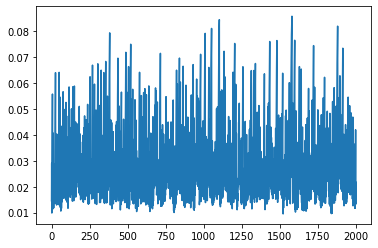

Weight value is  [[-0.0572826  -0.02589187  0.00365288 -0.01299984 -0.00309624 -0.01916618
  -0.0285157  -0.00923987  0.0089879  -0.00368915 -0.00999751 -0.02024078
   0.01063478 -0.01194913 -0.02552213 -0.00786043 -0.0269086  -0.00929534
  -0.00521524 -0.01205059 -0.00060075 -0.03198365 -0.01312911  0.00700198
  -0.00601662 -0.02073642 -0.02918893 -0.03592774 -0.01246733 -0.02077879
  -0.02638757  0.0217279  -0.04787534 -0.00591821 -0.03509297 -0.07603585
  -0.0074446  -0.02861134  0.01148392 -0.04729962 -0.03432396 -0.03666325
  -0.05057063  0.05264801 -0.03986016 -0.09180004 -0.02809137 -0.02007012
  -0.02123045 -0.05781167 -0.03126469 -0.02542438 -0.1011967  -0.04141599
  -0.05612599 -0.03669198 -0.05327352 -0.00647308 -0.04925972 -0.04403353
  -0.03691939]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

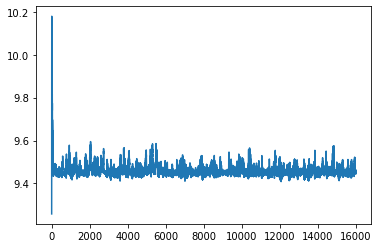

Weight value is  [[-0.01740797 -0.00134362 -0.01760648 -0.01006494 -0.00571679 -0.00272716
  -0.01616116 -0.0072941   0.00163298  0.01275008 -0.00792235 -0.01517282
  -0.02475613 -0.00815999 -0.01776104  0.00603288  0.01002504  0.01829352
  -0.02074861 -0.02414911 -0.01323721  0.01050968  0.00918402 -0.01762559
   0.00989029 -0.01946452  0.01454068  0.01785195 -0.01310579 -0.01494834
   0.00641398 -0.0220014   0.00258863  0.01815254  0.00986625 -0.00369041
  -0.02107504 -0.00876077 -0.01764162 -0.0171978  -0.01809165 -0.01304536
   0.00143219  0.01480032  0.01443268 -0.01610283  0.00623625 -0.01313132
   0.00765263 -0.0109802   0.01893432 -0.00245615  0.00243856  0.00920802
   0.00778482  0.02452101  0.00723793  0.0225266   0.01787602 -0.00412241
  -0.01983832]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

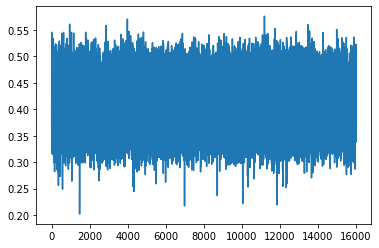

Weight value is  [[-4.40416673e-02 -2.91061179e-03  1.99467893e-03 -3.57114640e-02
  -9.12119983e-05 -2.74740066e-02 -1.58422321e-02 -1.99066054e-02
  -1.01164888e-02 -2.17047206e-02  1.44605531e-02 -1.73831322e-02
  -4.44030754e-02 -1.26658131e-02 -1.30345076e-02  1.42200238e-02
   3.82658982e-03  1.06064028e-02 -2.71107055e-02  4.64949889e-03
  -1.50209625e-02 -2.29821486e-02 -7.39067120e-03 -3.76182153e-02
   1.39885414e-02 -1.73819923e-02 -3.44886003e-03  4.80427870e-03
  -2.81762419e-02 -1.75316608e-02  5.14571025e-03  1.24383914e-02
  -4.37424292e-03 -4.60937363e-02 -3.04293658e-02 -3.63295902e-02
  -2.01202130e-02 -4.66680293e-02 -4.70800845e-03 -3.53491167e-02
   2.16295281e-03 -2.10668470e-02 -1.33323303e-02 -3.13895466e-02
  -5.58759920e-02 -4.05760088e-02 -3.90417915e-02 -4.57393648e-02
  -1.72847022e-02 -6.81681742e-02 -4.63303953e-02 -3.70113897e-02
  -3.33277005e-02 -4.35448959e-02 -2.81798006e-02 -1.71240339e-02
  -5.57121656e-03 -2.16923561e-02 -2.75856036e-02 -3.030320

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

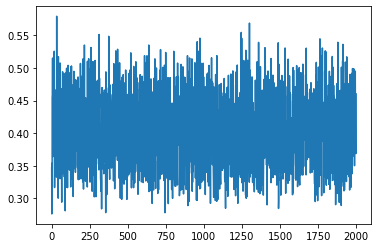

Weight value is  [[-0.00119371  0.06777554  0.04507527  0.03721798  0.02927775 -0.00370197
   0.06515286  0.03348405  0.0322579   0.00011796  0.01387817  0.05204417
   0.02970696  0.02408571  0.00735881  0.00223078  0.0453825   0.02389961
   0.02168018  0.02480344 -0.02008197  0.05444954  0.01420609  0.02915608
   0.02549508 -0.00823757  0.05750262  0.00760765  0.02623299 -0.00153046
  -0.0089895   0.01513474  0.02750445  0.02292467  0.04431955  0.016111
   0.01699891  0.01995183  0.02308134  0.01396398  0.05349865  0.04365036
   0.04472038  0.0513295   0.02836441  0.04293038  0.02264188  0.02130541
   0.0556776   0.06875741  0.01804754  0.04950681  0.02968508  0.0638038
   0.03201569  0.0124382   0.02981905  0.05605808  0.04351761  0.04709153
   0.00156337]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


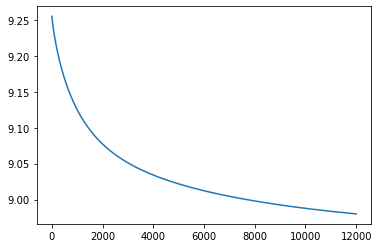

Weight value is  [[ 0.36163823  0.16076147  0.09779342 -0.01930548 -0.4819677  -1.36290265
  -0.39772985 -0.01112132  0.71301496  0.53219262  0.26611931 -0.21426435
  -0.07875774  0.43830366  0.12889784  0.5014836  -0.09255111  0.25785593
  -0.72872683  1.02242176 -0.32217245  0.16897445 -0.04828738  0.30657563
  -0.42959937  0.16806483  0.00717583 -0.09385533  0.05659632 -0.3940144
  -0.20106909  0.5617263   0.49907654 -0.59339602 -0.14358325 -0.69923664
  -0.5181722  -0.77628207 -0.09157538  0.87546834  0.17835886 -0.28038144
  -0.43195224  1.03817597  0.6244421  -0.18938647 -0.25544002  0.44818271
   0.48760731 -0.73651835  0.25349162  0.00245822  0.21421316  0.32372103
  -1.06292285 -0.15780132  0.271259    0.17211153 -0.59498083 -0.13739451
   0.24036885]] 

Accuracy is  0.4957983193277311 

Precision is  0.5066666666666667 

Classification Report is                precision    recall  f1-score   support

         0.0       0.48      0.36      0.41        58
         1.0       0.5

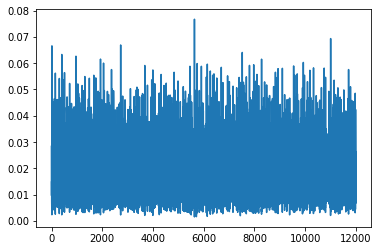

Weight value is  [[ 0.32909468  0.1901255  -0.1629771  -0.25201743 -0.59922108 -1.6269898
  -0.50726761  0.05075406  0.73430423  0.40587479  0.07509104 -0.26198442
   0.07289377  0.559938    0.19159051  0.6330572  -0.10570403  0.31085573
  -0.91992569  1.19988458 -0.3385467   0.11013102 -0.20821611  0.16717926
  -0.64966558  0.22056068  0.22981894 -0.16528155 -0.0857063  -0.43695285
  -0.20631559  0.83854352  0.53916714 -0.86362579 -0.11466755 -0.75368414
  -0.89916806 -0.95189628 -0.0722936   0.77530485  0.19225462 -0.5451502
  -0.62125933  1.23354132  0.39253778 -0.23972476 -0.16096178  0.4547289
   0.42781488 -0.86587744  0.14433117 -0.06115535 -0.02803173  0.44888168
  -1.09694657 -0.39488298  0.40640661  0.38592061 -0.95275514 -0.39977073
   0.25862223]] 

Accuracy is  0.4789915966386555 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.48      0.98      0.65        58
         1.0       0.00      0.00      

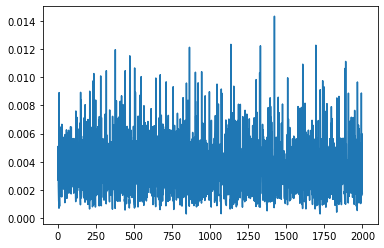

Weight value is  [[-0.00582594 -0.53006137 -0.10037609  0.26265842 -0.01811574 -0.43843947
  -0.0038805   0.22525165  0.41516021  0.11744554  0.00867103  0.10345364
  -0.11826341  0.31414298  0.28066028  0.28569347 -0.00875171 -0.00414673
   0.31695943  0.3351322  -0.146042    0.15444666 -0.11459392  0.35862967
  -0.00623811  0.1358428   0.22790087 -0.0425856   0.28694559 -0.22348617
  -0.12443722  0.7731387   0.21671979  0.06359515 -0.23635923 -0.23069621
  -0.50843691 -0.57925106 -0.04624012 -0.03296717  0.17129316 -0.28097099
  -0.70535098  0.84604563 -0.28572737  0.24658805 -0.30388823 -0.00442732
   0.2127986  -0.3939266  -0.00442954 -0.17863178 -0.12462339  0.10375023
  -0.45193618 -0.09635957  0.03094359 -0.34765382 -0.13392176 -0.16109669
   0.17412963]] 

Accuracy is  0.46218487394957986 

Precision is  0.4117647058823529 

Classification Report is                precision    recall  f1-score   support

         0.0       0.47      0.83      0.60        58
         1.0       0

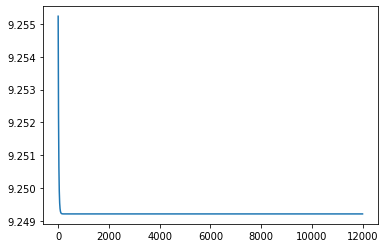

Weight value is  [[ 0.00011116 -0.0004807   0.00229315  0.00668297  0.0012941  -0.00473926
  -0.0004002   0.00444407  0.0095738   0.00579753  0.00014709 -0.00121046
   0.00261069  0.00582623  0.00338518  0.000251   -0.00140857  0.00296552
   0.00362148  0.00687039 -0.00158953 -0.00118257  0.00219431  0.00543884
   0.00143086 -0.00039063 -0.00235664  0.00060497  0.00434882  0.00167432
  -0.00202609  0.00086051  0.00118928 -0.0054019  -0.00107818 -0.00471271
  -0.01011659 -0.0090192  -0.00264897  0.00138968  0.00109468 -0.00537135
  -0.00594571  0.0129303   0.00089997 -0.00377974 -0.00684052  0.00068761
   0.00487728 -0.00247042  0.00308434 -0.00341253 -0.00119797  0.00427053
  -0.00370174 -0.00186222 -0.00149714  0.00184158 -0.00335764 -0.00108233
   0.00251263]] 

Accuracy is  0.44537815126050423 

Precision is  0.45454545454545453 

Classification Report is                precision    recall  f1-score   support

         0.0       0.44      0.48      0.46        58
         1.0       

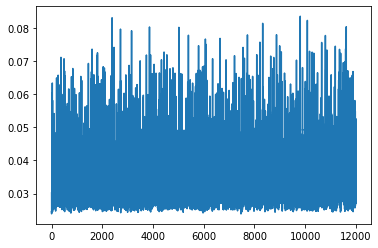

Weight value is  [[ 0.01045364 -0.02772397 -0.00650576 -0.02424915  0.00651602  0.00121672
  -0.03239526 -0.01424913 -0.0220078   0.00157237 -0.00107161 -0.02859149
   0.00773109 -0.00446539  0.01546328  0.00518263 -0.0220417   0.00130087
  -0.01469552  0.00951486  0.0110143  -0.01390375  0.00096322 -0.00439207
   0.01199664  0.00165296 -0.016433    0.0062106  -0.0151493   0.00920228
   0.00435367  0.06092101  0.01848581  0.01802772  0.00477996 -0.00387634
   0.06137212  0.01492815  0.02271084  0.01004357  0.01323601  0.05351163
   0.00612671  0.00985236  0.00557772  0.01007962  0.05142375  0.00851679
   0.02371954  0.00293608 -0.00823686  0.03152788 -0.00259051 -0.00264308
   0.00373051  0.01216053  0.04320345  0.01730097  0.02296153  0.01119733
   0.00238075]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


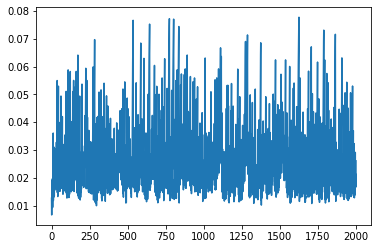

Weight value is  [[ 0.05349453  0.03720459  0.01370262  0.03449344  0.03390605 -0.00520698
   0.01241049  0.01517227  0.05442538  0.04284524  0.0061658   0.01104904
   0.01587799  0.04001249  0.02864745 -0.02130926 -0.02532972  0.02309238
   0.04678394  0.04376935  0.00010285 -0.0223973   0.01036424  0.05068622
   0.00078776 -0.02710493 -0.05261413  0.0264374   0.04872637  0.0177965
  -0.0378293  -0.04279218  0.00827922  0.01414777  0.06477687  0.04363698
   0.03422666  0.03491058  0.01686616  0.04308809  0.06094504  0.02536801
   0.07465425  0.05036524  0.04620432  0.05061062  0.02701253  0.03929016
   0.03985071  0.04508197  0.08154884  0.03589329  0.08629673  0.0180903
   0.05692172  0.06027809  0.04395994  0.04706148 -0.00950391  0.05105891
   0.08253657]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


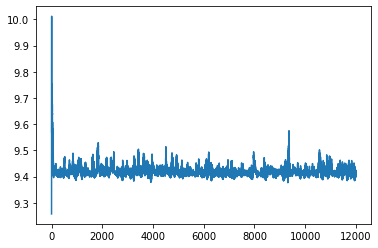

Weight value is  [[-7.67117890e-03  1.44999254e-02 -1.03779410e-02 -1.30829646e-02
  -1.16617243e-02  1.03135527e-02  3.21133618e-03  1.47602272e-02
   1.50569760e-02  1.10392124e-02  7.22595674e-03  4.94321182e-03
  -1.56658096e-02  1.34215252e-02  2.07296219e-02  2.06716343e-02
   9.93643482e-03 -6.56263371e-03 -1.56615202e-02 -6.16404713e-03
  -2.02999628e-02  5.67240731e-03 -1.45231891e-02  2.45253378e-03
  -9.10713732e-03 -1.66668803e-02 -6.91340136e-03  2.18912927e-02
  -7.23752361e-03 -8.61847483e-03  1.41675573e-03  4.95246012e-03
  -1.27664361e-02 -2.04750588e-02  1.12210681e-02 -2.09718805e-02
  -2.11952287e-02  1.71364744e-03  1.65154169e-02 -8.76891868e-03
  -5.04431356e-03  2.87614165e-03  2.09397542e-02 -4.38892196e-05
   2.07567337e-02  1.06368315e-02  9.83521206e-04  1.33250392e-02
   7.19494113e-03  5.13227708e-03  2.28578391e-02  1.79066982e-02
  -1.45105376e-02 -2.07838701e-02  1.39587920e-02  1.48796570e-02
  -1.07872501e-02 -1.25499230e-02  1.19145451e-02 -8.933421

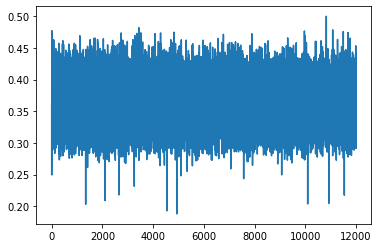

Weight value is  [[ 8.34404094e-02  1.43408744e-02  4.50731962e-03  2.37325150e-02
   1.51868581e-02  9.19330110e-03 -6.86501726e-03  2.19852754e-03
   1.25876085e-02  7.21263369e-03  3.20888809e-03  3.55332360e-02
   7.73637381e-03  2.40349361e-02  1.64822720e-02 -8.72928897e-03
   3.69067144e-02 -1.26846600e-02 -1.30414665e-02  3.29824631e-02
   1.51072906e-02  1.13199863e-02 -5.21934796e-03 -4.93730873e-03
   2.83749823e-02 -1.48942990e-04 -8.25934046e-03 -7.07451250e-05
  -4.49871946e-03  3.40790752e-02  3.20461163e-02  2.31585690e-02
   2.40051151e-02 -1.92606763e-03  3.47248479e-02  2.46906619e-03
   3.38716163e-02  3.95225625e-02  3.55408694e-02  7.84096903e-02
   1.84230173e-03  1.98642393e-02  1.93687872e-02  2.32703299e-02
   7.37438061e-02  1.50258156e-02 -2.11110127e-03  1.12591706e-02
   7.30909932e-03  6.59488749e-02  3.49673610e-02  3.11367112e-02
   4.11057160e-02  1.07658490e-03  7.20680532e-02  1.88203476e-02
   1.04063936e-02  3.64050158e-02  6.51291046e-03  6.507860

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


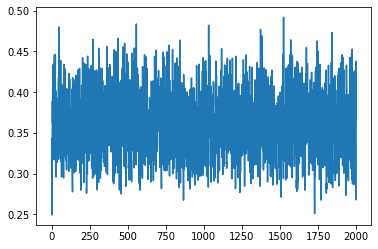

Weight value is  [[-0.01665749 -0.03866824 -0.02750156 -0.03623519 -0.02387678 -0.01332093
  -0.01542424  0.001211   -0.01268245 -0.03259633 -0.02878046 -0.04313115
  -0.02781315 -0.01061499  0.0071076   0.01475626 -0.0132371   0.00558078
  -0.03040201  0.00947586  0.00973716 -0.0388458  -0.01949342 -0.0237724
  -0.03085128 -0.00778083 -0.00391409 -0.01188474 -0.02382093 -0.03648259
   0.00957063 -0.00132014 -0.01703999 -0.01720913 -0.05699574 -0.04598213
  -0.0383214  -0.04585984 -0.02822049 -0.02933371 -0.06053388 -0.00921957
  -0.03688861 -0.01189742 -0.04031538 -0.0397908  -0.01257692 -0.04006247
  -0.04159193 -0.0530207  -0.03878     0.01908626 -0.0361065  -0.0032637
  -0.05867009 -0.04024185 -0.0361465  -0.03037597 -0.00916922 -0.03870874
  -0.04880798]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

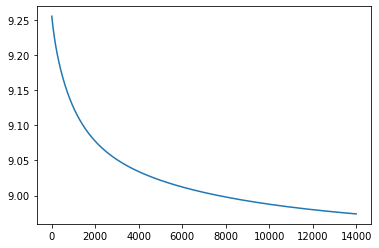

Weight value is  [[ 0.42239364  0.19961178  0.13156208 -0.03645049 -0.51358353 -1.46422342
  -0.44580832 -0.03589322  0.76068486  0.55509889  0.31799996 -0.24474262
  -0.10106545  0.47354955  0.13424324  0.54830714 -0.09320363  0.29604377
  -0.84232113  1.10456788 -0.35775002  0.18634547 -0.06851378  0.32677249
  -0.47010592  0.18576449  0.0163342  -0.093338    0.06872146 -0.44402101
  -0.20525464  0.57158452  0.50334932 -0.60395495 -0.17551041 -0.72964672
  -0.52312038 -0.78907095 -0.09650226  0.96577573  0.17830784 -0.2879189
  -0.43867832  1.04355637  0.69832997 -0.18305589 -0.26219963  0.45704302
   0.48834872 -0.81098794  0.2550569   0.0073647   0.21745029  0.32856846
  -1.15510029 -0.15152667  0.27720414  0.16165147 -0.60418339 -0.13293792
   0.24182722]] 

Accuracy is  0.47058823529411764 

Precision is  0.4864864864864865 

Classification Report is                precision    recall  f1-score   support

         0.0       0.44      0.34      0.39        58
         1.0       0.

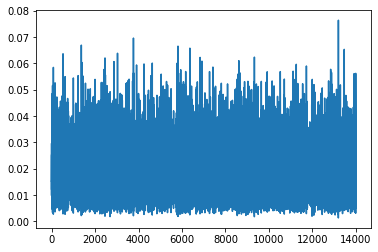

Weight value is  [[ 0.3871042   0.11159141 -0.00269893 -0.11806533 -0.49538381 -1.82181637
  -0.51177768  0.04330012  1.03381195  0.78516429  0.38429292 -0.39360497
  -0.12129829  0.66466686  0.31108854  0.51377228 -0.15747532  0.2934707
  -0.70874467  1.34764611 -0.38957851  0.38395972  0.03646431  0.46908209
  -0.59095866  0.16047368 -0.07129074  0.02884027  0.15356251 -0.48654911
  -0.30221625  0.75909383  0.54043314 -0.69648051 -0.234805   -0.629743
  -0.59562145 -0.65787949 -0.08478     1.1053063   0.20738818 -0.08060296
  -0.43730497  1.14102072  0.8809691  -0.21348355 -0.25424672  0.46804469
   0.67474111 -0.53772903  0.47821629 -0.03414054  0.26742786  0.39231841
  -1.2939546  -0.20105109  0.46699457  0.08074184 -0.80468696 -0.20375357
   0.33885759]] 

Accuracy is  0.5294117647058824 

Precision is  0.5229357798165137 

Classification Report is                precision    recall  f1-score   support

         0.0       0.60      0.10      0.18        58
         1.0       0.52 

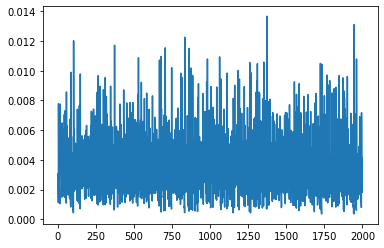

Weight value is  [[ 0.05069964 -0.05995689  0.26167997  0.26401675  0.09423373 -0.37421629
   0.09467349  0.23756145  0.2358573   0.53145619  0.31938212  0.112905
  -0.06921105 -0.20805383  0.12066498  0.12872435  0.0523464  -0.03179279
  -0.42185781  0.64021149 -0.17961963 -0.04630452 -0.07398134  0.1044358
  -0.20957712 -0.0997518   0.04936405 -0.10265062  0.00891778  0.23552853
  -0.17024968  0.24002585 -0.14694343  0.05951864 -0.01120204 -0.0376289
  -0.24443048 -1.13459885 -0.41873918  0.06751588  0.16211793 -0.12365363
   0.02990188  0.53451536  0.11608255 -0.26018769 -0.33482734  0.72725583
   0.38323573  0.06227824 -0.10056468  0.35364384  0.17809374  0.2358676
  -0.28698653 -0.05979119  0.08753174 -0.0795506   0.28253003 -0.17456638
   0.06898022]] 

Accuracy is  0.5294117647058824 

Precision is  0.5252525252525253 

Classification Report is                precision    recall  f1-score   support

         0.0       0.55      0.19      0.28        58
         1.0       0.53   

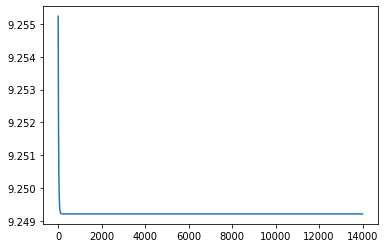

Weight value is  [[ 0.00011116 -0.0004807   0.00229315  0.00668297  0.0012941  -0.00473926
  -0.0004002   0.00444407  0.0095738   0.00579753  0.00014709 -0.00121046
   0.00261069  0.00582623  0.00338518  0.000251   -0.00140857  0.00296552
   0.00362148  0.00687039 -0.00158953 -0.00118257  0.00219431  0.00543884
   0.00143086 -0.00039063 -0.00235664  0.00060497  0.00434882  0.00167432
  -0.00202609  0.00086051  0.00118928 -0.0054019  -0.00107818 -0.00471271
  -0.01011659 -0.0090192  -0.00264897  0.00138968  0.00109468 -0.00537135
  -0.00594571  0.0129303   0.00089997 -0.00377974 -0.00684052  0.00068761
   0.00487728 -0.00247042  0.00308434 -0.00341253 -0.00119797  0.00427053
  -0.00370174 -0.00186222 -0.00149714  0.00184158 -0.00335764 -0.00108233
   0.00251263]] 

Accuracy is  0.44537815126050423 

Precision is  0.45454545454545453 

Classification Report is                precision    recall  f1-score   support

         0.0       0.44      0.48      0.46        58
         1.0       

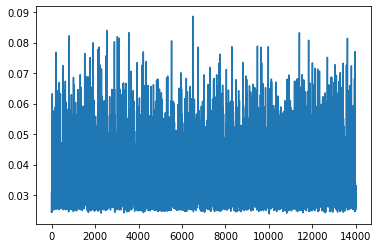

Weight value is  [[ 0.00874082 -0.01013193  0.03678904  0.02281614  0.0264461   0.02425085
  -0.01506615  0.03162256  0.03027586  0.03515224  0.02100394 -0.00218055
   0.04674355  0.01993026  0.01504093  0.02119759 -0.01573729  0.03033936
   0.02227399  0.02434534  0.0119933  -0.01717488  0.04230248  0.02577755
   0.01970386  0.01937889 -0.02382222  0.04172226  0.04481919  0.03282361
   0.01637089 -0.01004774 -0.03289661 -0.00585699  0.00975233  0.00366284
  -0.03595422 -0.04362967  0.02799523  0.00531933  0.01832359 -0.02947498
  -0.01576186  0.03528907  0.00933337 -0.02016857 -0.020393   -0.00436197
   0.02469395  0.00274833  0.00754699 -0.00369816 -0.01676449  0.0140742
  -0.00786045  0.00321912  0.00991151 -0.01405291  0.02557035 -0.0004088
   0.00178913]] 

Accuracy is  0.5210084033613446 

Precision is  0.5169491525423728 

Classification Report is                precision    recall  f1-score   support

         0.0       1.00      0.02      0.03        58
         1.0       0.52

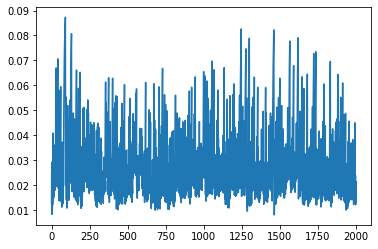

Weight value is  [[-0.01106972 -0.06553302  0.01718017 -0.01373497  0.00076368  0.0188786
  -0.0390794   0.01228474  0.01771057 -0.00858127 -0.00951855 -0.02786617
  -0.00305395 -0.02915161 -0.02758257  0.02198448 -0.04745686  0.01574654
  -0.01534561 -0.02165696 -0.0079248  -0.00447333  0.01792683 -0.00389825
  -0.01187161 -0.00302283 -0.04129666  0.00354585 -0.02162043 -0.00675279
  -0.01967708 -0.0117403   0.00399351  0.01961234 -0.00443141  0.00315211
  -0.03423987  0.02492533 -0.00282275  0.01320209  0.00404066 -0.04378993
   0.02221244  0.02924652 -0.00346326 -0.02391074 -0.01777692  0.03176433
  -0.00834057 -0.012617   -0.08733005 -0.01174608 -0.00026638  0.03759716
  -0.00391744 -0.00909271 -0.00288982  0.03229129  0.00916571 -0.00312135
  -0.05017977]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

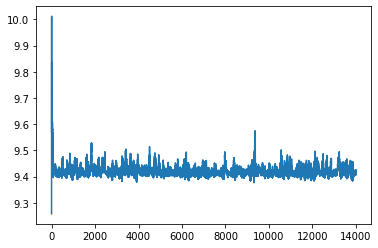

Weight value is  [[ 0.01672969 -0.00600867  0.00046526  0.00705384 -0.00832882 -0.00059474
  -0.01086153  0.00278532 -0.02092403  0.01853627 -0.00972694  0.00129687
  -0.01768697 -0.00695097 -0.01433858  0.00516982 -0.01550357  0.02204879
  -0.01266875  0.00676176 -0.02130266 -0.00686899 -0.0167723  -0.01181196
   0.00273124 -0.00264144  0.00993     0.01203923  0.01409258 -0.01971718
   0.00375488  0.01559229 -0.01521264  0.02011031  0.01160124  0.00678315
  -0.02176556  0.01540596 -0.0127808  -0.01176112  0.00620314 -0.00962415
   0.00733133  0.00394408  0.02220307 -0.01115238 -0.01141377  0.01214486
  -0.00081825  0.01837173 -0.00511054  0.00858963  0.00363421  0.0106156
   0.00677896 -0.00584869  0.02087515  0.01353147 -0.01898313 -0.00510267
   0.00991579]] 

Accuracy is  0.5294117647058824 

Precision is  0.5221238938053098 

Classification Report is                precision    recall  f1-score   support

         0.0       0.67      0.07      0.12        58
         1.0       0.5

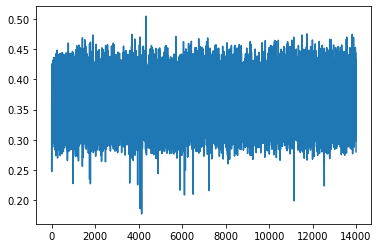

Weight value is  [[-0.09619604 -0.04408124  0.00415395 -0.01656473 -0.01525986  0.01479065
  -0.02721633 -0.03643606 -0.00512434  0.00064478 -0.00273727 -0.0028589
  -0.00217041  0.00303351  0.01123606  0.00246575 -0.02358202  0.00066227
   0.00416448 -0.01190956 -0.02055057 -0.01305656 -0.01469065 -0.02089869
   0.00016147 -0.01358417 -0.0016769   0.00270579 -0.00557187  0.00683739
   0.00705033 -0.01521245 -0.02362783 -0.03719792 -0.03408339 -0.04161273
   0.01066926 -0.01015696 -0.00907932 -0.04854622 -0.03074784 -0.02127001
  -0.02286772 -0.01166016 -0.05386911 -0.01290994 -0.02436408 -0.00708115
  -0.00757355 -0.03209162 -0.006728   -0.02253896 -0.00738605 -0.03838688
  -0.05723186 -0.02017248 -0.00658503 -0.03597038 -0.01986843 -0.06084754
  -0.00348295]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

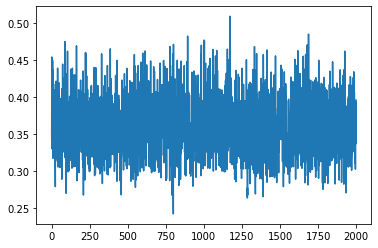

Weight value is  [[ 0.04321355  0.02108116  0.02904917  0.03405406  0.02209395 -0.00593321
   0.00493973  0.00977257  0.02933531  0.04394964  0.0151521   0.02400331
   0.0374406   0.00899814  0.01196871  0.03212363  0.03808081  0.00768231
   0.02554562  0.01492622  0.01954945  0.0385427   0.02073422  0.02006948
   0.04571684  0.01747022  0.02447287  0.02236647  0.02816248  0.04993123
   0.04343649  0.0049946   0.03629408  0.02333301  0.0259041   0.03596247
   0.0023715  -0.00410438  0.01786229  0.02185966  0.02426561  0.03706771
   0.04151797  0.01976479  0.06915517  0.05013158  0.03265741  0.00639569
   0.01878102  0.00673108  0.01866199  0.06474209  0.01019894  0.04697837
   0.05807278  0.02671705  0.06486522  0.06976533  0.01436877  0.0683532
   0.03548644]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


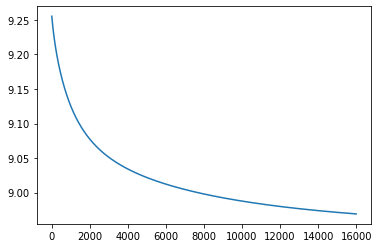

Weight value is  [[ 0.480384    0.23329398  0.16454009 -0.05297865 -0.53893033 -1.55023015
  -0.48940186 -0.05991387  0.80501091  0.57069943  0.36503253 -0.27228053
  -0.12162165  0.50531412  0.1398894   0.58678811 -0.09107534  0.33277723
  -0.94815697  1.17553504 -0.39159534  0.2012447  -0.08832704  0.34394721
  -0.50305019  0.20103853  0.02347453 -0.09455753  0.08337708 -0.48888567
  -0.20736259  0.57926653  0.5058709  -0.61142013 -0.20886302 -0.75382317
  -0.52720692 -0.79798462 -0.10131042  1.0438531   0.17795587 -0.29379268
  -0.44365378  1.04753338  0.76375727 -0.17842456 -0.26816279  0.46266356
   0.48696839 -0.87768844  0.25623769  0.01153644  0.21829976  0.33220336
  -1.23452947 -0.14617999  0.28117179  0.15334852 -0.61005588 -0.12674858
   0.24273684]] 

Accuracy is  0.453781512605042 

Precision is  0.47368421052631576 

Classification Report is                precision    recall  f1-score   support

         0.0       0.42      0.31      0.36        58
         1.0       0.

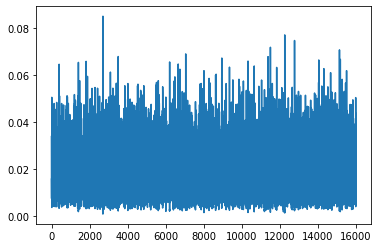

Weight value is  [[ 0.63896988 -0.02966206  0.24985087  0.1912316  -0.60575859 -1.64672733
  -0.30518866 -0.01382752  0.9007883   0.90876476  0.2891954  -0.4590436
  -0.07294092  0.47156332  0.35380343  0.85538137 -0.02842623  0.41027807
  -0.90202767  1.38842136 -0.52312143  0.41399518 -0.01609103  0.52916884
  -0.57996376  0.22763349  0.30005034  0.00980103  0.26165831 -0.56664139
  -0.36124085  0.81897304  0.75244158 -0.73795181 -0.46508079 -0.64587397
  -0.51147648 -0.98590241 -0.08500911  1.24745466  0.40044381 -0.45573629
  -0.22575695  1.21191418  0.86845272  0.00226392 -0.2421361   0.33087997
   0.68650998 -0.70592617  0.43220529  0.30868748  0.18774122  0.38176533
  -1.37494924 -0.08846097  0.54960743  0.13786854 -1.11553819 -0.21372839
   0.37961517]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


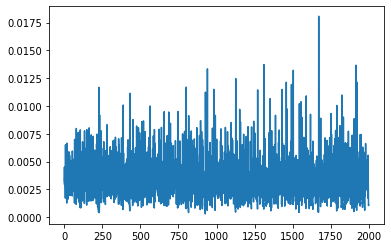

Weight value is  [[ 0.28409398  0.26064944 -0.03856314 -0.19745779  0.21232121  0.03177313
  -0.37766964 -0.31841232  0.22577758  0.49376047  0.21023838 -0.03367747
  -0.33446375  0.05854281  0.08340512  0.445323   -0.08781928 -0.18499328
   0.06228204  0.65190587  0.02892784 -0.0162501  -0.07018179  0.07056919
   0.01902176  0.40836878 -0.06798057 -0.10907547  0.25975777  0.19213897
   0.19297633  0.17201165 -0.01667135 -0.84773291  0.3424599   0.13445264
  -0.25464313 -0.10806694 -0.50042475  0.34801266  0.08894195 -0.32643004
   0.1212004   0.93759405  0.22745526  0.19596339  0.02532201 -0.06220419
   0.58966665 -0.06899273  0.10279871 -0.05462597 -0.35580194  0.48458303
   0.21374945 -0.23903103  0.40487457  0.0891861  -0.2224926   0.21212188
  -0.0329102 ]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


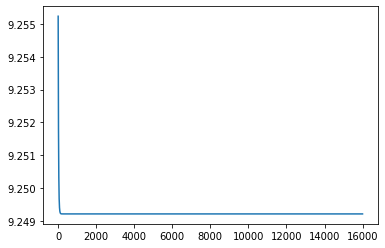

Weight value is  [[ 0.00011116 -0.0004807   0.00229315  0.00668297  0.0012941  -0.00473926
  -0.0004002   0.00444407  0.0095738   0.00579753  0.00014709 -0.00121046
   0.00261069  0.00582623  0.00338518  0.000251   -0.00140857  0.00296552
   0.00362148  0.00687039 -0.00158953 -0.00118257  0.00219431  0.00543884
   0.00143086 -0.00039063 -0.00235664  0.00060497  0.00434882  0.00167432
  -0.00202609  0.00086051  0.00118928 -0.0054019  -0.00107818 -0.00471271
  -0.01011659 -0.0090192  -0.00264897  0.00138968  0.00109468 -0.00537135
  -0.00594571  0.0129303   0.00089997 -0.00377974 -0.00684052  0.00068761
   0.00487728 -0.00247042  0.00308434 -0.00341253 -0.00119797  0.00427053
  -0.00370174 -0.00186222 -0.00149714  0.00184158 -0.00335764 -0.00108233
   0.00251263]] 

Accuracy is  0.44537815126050423 

Precision is  0.45454545454545453 

Classification Report is                precision    recall  f1-score   support

         0.0       0.44      0.48      0.46        58
         1.0       

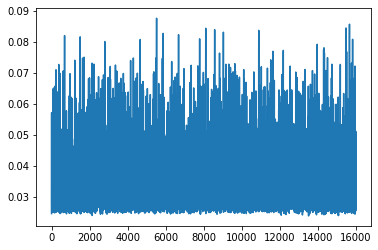

Weight value is  [[-0.01920077  0.00687913  0.01605667  0.01844867  0.02236195 -0.00219828
  -0.01283268  0.00687107  0.01378216  0.01124149 -0.00263916 -0.00391524
   0.01510752  0.02343156  0.01537317  0.01079148 -0.02787223  0.01871904
   0.01992257  0.01893035 -0.00287964 -0.00532737  0.03265364  0.03461406
   0.01001749 -0.00224987 -0.01105104  0.0238946   0.0262896   0.0065233
  -0.00901115 -0.01035881 -0.04783878 -0.0223941  -0.02077182 -0.00454779
  -0.03160016 -0.05055198 -0.02095187 -0.02005319 -0.0362536  -0.01633254
  -0.04268729 -0.00224129 -0.01403483 -0.03066695 -0.02471053 -0.01577641
   0.0035156  -0.02425224 -0.03614085 -0.02476757 -0.04997798 -0.03130555
  -0.02207582 -0.02259646 -0.02066197 -0.03942129 -0.01899238 -0.01966248
  -0.01229799]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

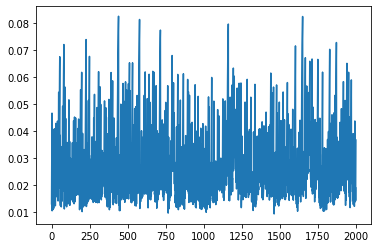

Weight value is  [[ 0.08516911  0.05751752  0.03445398  0.06894743  0.03182236  0.0079976
   0.05458908  0.03267664  0.05053462  0.02322331  0.01800608  0.02595372
   0.00895793  0.02531492  0.0363794   0.05355172  0.06591081  0.0461517
   0.05895095  0.04286008  0.02029455  0.04096347  0.0357356   0.05290715
   0.04144039  0.0265733   0.04993342  0.02963265  0.06585813  0.02722307
   0.01804944  0.06799429  0.05029395 -0.00598975  0.06718501  0.04938681
   0.0706897   0.01182677  0.01842128  0.08335703  0.00797321  0.10581186
   0.04867033  0.06441731  0.06024473  0.01919744  0.07234918  0.02876262
   0.02879058  0.05535503  0.04887351  0.07462456 -0.00257919  0.0697738
   0.05758156  0.01694894  0.09633889  0.02789025  0.02109279  0.06077523
   0.07725418]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


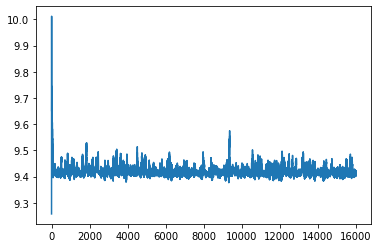

Weight value is  [[ 4.33320767e-03  1.83409309e-02  1.61539301e-03  2.24356905e-02
  -1.56862947e-02  7.51118010e-03  1.79464634e-02 -1.06090934e-02
   2.34803791e-02  1.49920588e-02 -3.66150860e-03 -5.44084393e-03
   1.98051901e-02  8.25656554e-03 -1.29315875e-02  1.08090865e-02
   2.08421591e-03 -2.39001683e-03  2.09468194e-02  1.13485928e-02
  -2.61939144e-03  1.93086896e-02  1.90014688e-02  1.22745985e-02
   4.88140762e-03 -1.48254433e-02 -1.98748301e-02 -4.68304447e-04
  -1.66924360e-02  2.83943458e-03 -1.84947912e-02 -1.63971547e-02
  -6.53966640e-03 -2.16068890e-02  1.24110109e-03  8.64472180e-03
  -1.49179521e-02 -5.30392714e-03  7.26304437e-03  1.92475006e-02
   2.20132417e-02 -1.57031873e-02  4.88690222e-03  1.29199202e-02
   1.37764070e-02 -1.96160274e-02 -1.78336020e-02  1.92774400e-02
   3.05428859e-05  1.97014234e-02  2.01102112e-02  5.88779924e-03
  -1.02544574e-02  7.22990465e-03 -9.19524011e-03 -1.55374946e-02
   1.34908214e-02  7.47187758e-03  2.58931899e-03 -1.082271

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


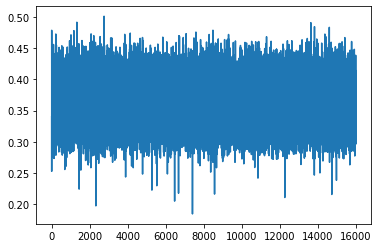

Weight value is  [[ 0.0264936   0.02578215  0.0158268   0.04211695  0.01950578 -0.00716762
   0.03010607  0.03098515  0.0047104   0.00560919 -0.00313987  0.04539891
   0.03608882  0.00715806  0.02080569  0.01372966  0.00460939  0.04359194
   0.02995389  0.01110067  0.01513456  0.04052729  0.04829731  0.02744944
   0.03629336  0.02564811  0.03510725  0.01540268  0.02215951  0.02664661
  -0.00796489  0.01536706  0.02862855  0.03577889  0.03666225  0.03881154
   0.00239413  0.01586436  0.06612518  0.01821229  0.04746565  0.01763701
   0.01647891  0.03182659  0.05435706  0.04286041  0.02490299  0.00868164
   0.03442338  0.02065585  0.03202508  0.00997062  0.04094081  0.05052402
   0.02680365  0.03060683  0.03489767  0.04091799  0.03788184  0.05677145
   0.0347181 ]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


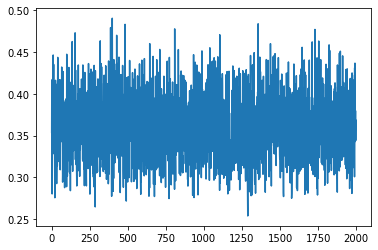

Weight value is  [[-0.05927828 -0.02681123  0.01332836 -0.01465008 -0.00897756 -0.00104565
  -0.03234185 -0.00669547  0.0025812  -0.02757446 -0.00202476 -0.01191449
  -0.00554543  0.00897879 -0.01432715 -0.00851338 -0.01723129 -0.02551634
  -0.03769957 -0.02412357 -0.04468858 -0.00202781 -0.0195109   0.00441069
  -0.00491657 -0.03772346 -0.03046749 -0.04222034 -0.00300336 -0.01053457
  -0.01382531 -0.05828397 -0.0382331  -0.04238117 -0.01668219 -0.04600371
  -0.02687419 -0.06620122 -0.04302631 -0.02732243 -0.03643936 -0.02562744
  -0.01482597 -0.009624   -0.03850837 -0.02404098 -0.02380155 -0.01633551
  -0.05839186 -0.04322534 -0.0494191  -0.02762798 -0.01440328 -0.02957767
  -0.04927999 -0.01814554 -0.03217258 -0.05344968 -0.02427898 -0.02428849
  -0.04011263]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

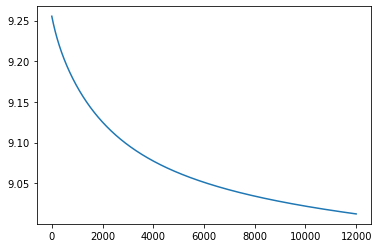

Weight value is  [[ 0.16408922  0.01641701  0.00786721  0.0433727  -0.32216116 -0.92138655
  -0.22285785  0.06336502  0.53549995  0.39840038  0.08359368 -0.11090787
  -0.00959939  0.30102964  0.1123732   0.28807543 -0.06870813  0.1339743
  -0.33650646  0.68071283 -0.20710876  0.09403555  0.003275    0.22583546
  -0.24637029  0.09105726 -0.03275634 -0.10644373  0.04373029 -0.20681226
  -0.17185118  0.49454269  0.4446555  -0.50695277 -0.06837453 -0.53706909
  -0.48069913 -0.67035203 -0.08049839  0.5109375   0.16740513 -0.23224116
  -0.3817487   0.98347663  0.34133301 -0.21785255 -0.22800422  0.375337
   0.44713258 -0.45393302  0.24065166 -0.01989934  0.16655316  0.29310893
  -0.68160269 -0.17605756  0.2189862   0.21255463 -0.50782749 -0.12857428
   0.22028591]] 

Accuracy is  0.5126050420168067 

Precision is  0.5211267605633803 

Classification Report is                precision    recall  f1-score   support

         0.0       0.50      0.41      0.45        58
         1.0       0.52 

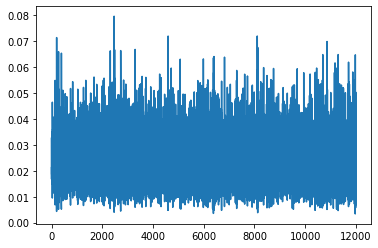

Weight value is  [[ 0.27248345  0.00464159 -0.03368562  0.07372727 -0.3458468  -1.02944025
  -0.02141302  0.0454395   0.58463928  0.28102156  0.04382529 -0.04359806
  -0.0147607   0.33314897  0.09700167  0.28511697 -0.06434276 -0.03858846
  -0.34969025  0.64220299 -0.17617831  0.08710521  0.02694784  0.10502228
  -0.38752282  0.10584826  0.05054025 -0.12248174  0.03063573 -0.25218486
  -0.14281531  0.42351948  0.75358854 -0.42895765 -0.05350441 -0.48430154
  -0.62752629 -0.56331897 -0.13257263  0.6440764   0.0818062  -0.28608213
  -0.34303132  1.12987761  0.41627164 -0.29267415 -0.19807044  0.50649673
   0.48100378 -0.43438786  0.28727647  0.04706568  0.31593686  0.36673303
  -0.70554274 -0.08612138  0.26053605  0.22455115 -0.57727665 -0.1341481
   0.26575503]] 

Accuracy is  0.5126050420168067 

Precision is  0.5130434782608696 

Classification Report is                precision    recall  f1-score   support

         0.0       0.50      0.03      0.06        58
         1.0       0.5

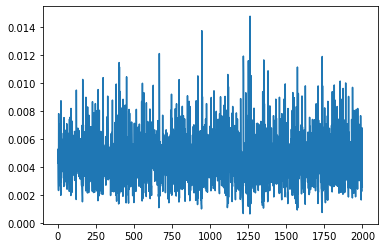

Weight value is  [[-0.05974848  0.18135463  0.01860452  0.0433238  -0.17441314 -0.37683616
   0.06328481  0.13353944  0.24940699  0.0162469   0.11202178  0.1212193
   0.19708558 -0.05603396 -0.1128008   0.02669002  0.0025473  -0.00386931
  -0.06825297  0.03131668 -0.02629926  0.0759482   0.20548076  0.08521555
  -0.28607458  0.04871659 -0.25578948 -0.15397315  0.05312593 -0.11031515
  -0.05463681  0.00161062  0.17953754 -0.04091651  0.09061306 -0.2793437
  -0.3144199  -0.54419384  0.04371801 -0.04502886  0.12593197 -0.05469928
  -0.28102652  0.53469005 -0.00708843 -0.1214751  -0.10928171  0.06960491
   0.18888442 -0.1630929   0.14231    -0.32582998  0.06590994  0.40117761
  -0.15897864 -0.53252903  0.18314939  0.24833475 -0.15115381 -0.1316667
  -0.17969965]] 

Accuracy is  0.47058823529411764 

Precision is  0.25 

Classification Report is                precision    recall  f1-score   support

         0.0       0.48      0.95      0.64        58
         1.0       0.25      0.02    

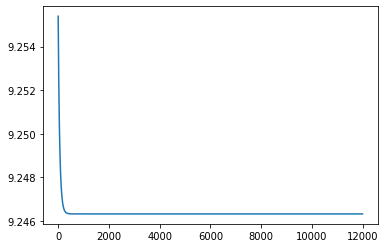

Weight value is  [[ 0.0001989  -0.00082266  0.00322251  0.0096663   0.00179255 -0.00716773
  -0.00068647  0.00638958  0.01400951  0.00851786  0.00013826 -0.00182757
   0.00366977  0.00844468  0.00494055  0.00035131 -0.00208758  0.0042107
   0.00515679  0.01013226 -0.00241415 -0.00170758  0.00309897  0.00788812
   0.00201908 -0.0005974  -0.00345783  0.0007162   0.00626167  0.0023806
  -0.00305544  0.00151745  0.00204117 -0.00790118 -0.00154845 -0.00697534
  -0.0148278  -0.01318794 -0.00375506  0.00215538  0.00169343 -0.00780438
  -0.00866159  0.01937272  0.00138899 -0.00559562 -0.00998046  0.00126222
   0.00736994 -0.00366849  0.00462935 -0.00490809 -0.00161139  0.00641905
  -0.00551557 -0.00278637 -0.00206082  0.00289785 -0.00496053 -0.00159123
   0.00375158]] 

Accuracy is  0.4369747899159664 

Precision is  0.44642857142857145 

Classification Report is                precision    recall  f1-score   support

         0.0       0.43      0.47      0.45        58
         1.0       0.4

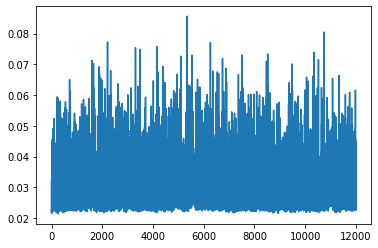

Weight value is  [[-0.03509411 -0.01093493 -0.00566137  0.00199914 -0.003634   -0.01434791
  -0.0165685  -0.00132471  0.01105453 -0.00756399 -0.0197706  -0.02730111
  -0.01396566 -0.01113934 -0.00663541 -0.00428304 -0.0311338  -0.0001395
  -0.00206272  0.00082694 -0.01362966 -0.02437377 -0.00370479 -0.01193196
  -0.01336343 -0.00478944 -0.02226814  0.00182785 -0.00496019 -0.00331825
  -0.00590117 -0.02719828 -0.01590583 -0.02075465 -0.03319282 -0.03687183
  -0.04859632 -0.04660258 -0.01896098 -0.0242703  -0.00819461 -0.03222612
  -0.02817578  0.0247857  -0.02875026 -0.04332032 -0.03110157 -0.01970192
  -0.01052354 -0.03244531 -0.01777726 -0.0224593  -0.03163671 -0.01313659
  -0.03479627 -0.03023424 -0.01507435 -0.02524752 -0.023389   -0.03395119
  -0.00254863]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

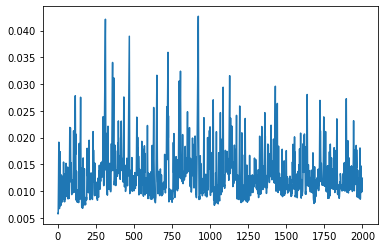

Weight value is  [[ 2.97330993e-02 -5.10152254e-05  4.61993129e-02  7.81480148e-03
   3.58398463e-02  6.32095387e-03  2.46449265e-02  5.70154692e-02
   2.07064174e-02  3.97487634e-02  2.06575236e-02  9.20971263e-03
   5.64592626e-02  2.87982317e-02  5.39219013e-02  2.37058329e-02
   4.77518414e-03  5.07364792e-02  2.03183834e-02  4.03722102e-02
   1.63996904e-02  2.86456265e-03  3.90890275e-02  2.52672240e-02
   4.74474877e-02  2.15151353e-02  8.07424672e-03  4.59990803e-02
   1.84929338e-02  3.27809510e-02  9.33741816e-03 -2.92758299e-03
  -2.97794826e-02  3.00808333e-02  1.29164288e-02 -7.05824128e-03
   3.53988426e-02 -2.98110141e-02  3.06544264e-03  2.30592845e-02
  -2.22445301e-03  5.67243933e-02 -3.18671198e-02  6.04688766e-02
   2.62703257e-02  2.62454169e-02  3.24051853e-02  1.74255017e-02
   1.34409059e-02  2.38848356e-02  3.62173399e-02  1.61590802e-02
  -2.48696765e-02  2.42023321e-02  2.18786297e-02  3.85492015e-02
  -2.12674374e-02  6.21954889e-03  1.75258721e-02  2.080485

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


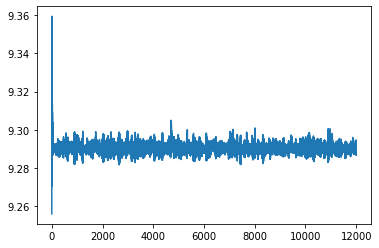

Weight value is  [[-6.70558768e-03  1.82212014e-03  5.54588254e-03 -5.71928044e-03
   4.59476615e-03 -6.99546461e-03  2.03641382e-03  6.16953092e-04
  -4.41065838e-03  1.92386484e-03 -2.90339322e-03  3.87869301e-03
   4.79433253e-03 -5.14336085e-03  5.29734463e-03  3.18804724e-03
  -5.35548897e-03 -5.06908506e-03 -3.19767685e-03  2.04432910e-04
   5.40096137e-03 -3.21835335e-03  5.45955183e-03 -3.52446760e-03
   2.17679110e-04 -7.41944292e-03  1.25698467e-03  7.05859225e-03
  -5.19134749e-04 -5.76473017e-03  1.89181524e-03  4.55538999e-03
   6.30722006e-03 -6.43455833e-03  5.78867683e-03 -7.39505874e-03
   6.35967491e-03 -3.53806669e-03 -1.22616753e-03 -4.04691077e-03
  -1.16683856e-05  6.45571594e-03 -6.91335735e-03 -7.29347858e-03
  -2.87062225e-03 -7.62029671e-03  4.41635675e-03 -5.09112979e-03
  -6.56192495e-03  5.61081243e-03 -1.40201661e-03 -2.64062236e-03
  -2.42684294e-03 -4.05455542e-03  8.40414272e-04 -2.33225520e-03
  -1.47633327e-03 -4.11089523e-03  2.41455452e-03  5.247605

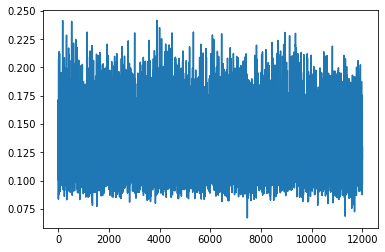

Weight value is  [[-0.01705319 -0.01101564  0.00178742 -0.0042775  -0.00444375 -0.00015586
  -0.01569599 -0.01044865 -0.01390844 -0.011458   -0.00517665 -0.00770755
   0.00143014 -0.00295466 -0.00796191 -0.01431576 -0.01044414  0.00323272
  -0.00835647 -0.00644718 -0.00515379 -0.01733153 -0.00403325 -0.00882161
  -0.00924239  0.00121147 -0.01309216 -0.005042   -0.0030728  -0.01104379
  -0.00849967 -0.00960143 -0.00894855 -0.01119826 -0.01745367 -0.01053706
  -0.00302259 -0.01006475 -0.00577675 -0.01030716 -0.01018504 -0.00217636
  -0.0220643  -0.01031517 -0.0131427  -0.02291757 -0.01896265 -0.02048376
  -0.01125663 -0.01030892 -0.01537716 -0.01217875 -0.0154178  -0.01314292
  -0.01601432 -0.02302308 -0.00781172 -0.02541346 -0.01386298 -0.0229073
  -0.01133101]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

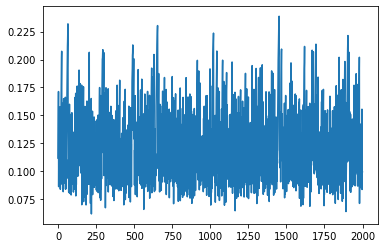

Weight value is  [[-0.01444324 -0.00790883 -0.00194803 -0.01629042 -0.0013762  -0.01131682
  -0.01070171 -0.0070167  -0.01859456 -0.00348333 -0.00636785 -0.0083891
  -0.01629637 -0.01306496 -0.0138188  -0.01098048 -0.00605824 -0.01288005
  -0.01113821 -0.00128998 -0.01115288 -0.00227342 -0.00753634 -0.0162272
  -0.0010732  -0.0105869  -0.01227612 -0.00754578 -0.01369427 -0.00897568
  -0.00919814 -0.00166454 -0.00456986 -0.0065087  -0.01727228 -0.00476876
   0.01171501 -0.01141394 -0.01235648 -0.01260369 -0.01512898  0.0049779
  -0.02412102 -0.00063072 -0.01171642 -0.00933218  0.01165566 -0.01940509
  -0.01048627 -0.01829416 -0.01268165 -0.01570034 -0.01017939 -0.01136454
  -0.01082567 -0.01050703 -0.00556564 -0.01489795 -0.01155345 -0.0104112
  -0.01369246]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

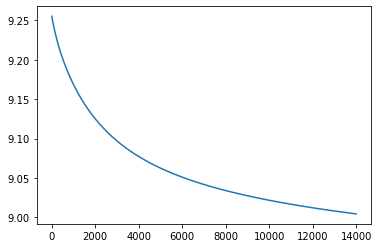

Weight value is  [[ 0.1982443   0.04198515  0.01963653  0.03060533 -0.3587613  -1.01423778
  -0.2554094   0.05186961  0.57051258  0.42935459  0.11588018 -0.12816265
  -0.01983548  0.32842887  0.11575416  0.33340634 -0.07492562  0.15580498
  -0.40727731  0.75041535 -0.22689714  0.10978129 -0.00298825  0.24170608
  -0.28450295  0.10758166 -0.02496037 -0.10373592  0.04279495 -0.24230473
  -0.17874243  0.51394675  0.46301006 -0.532283   -0.07787251 -0.57556732
  -0.4924066  -0.7013594  -0.08174001  0.5830082   0.17204887 -0.24500306
  -0.39631786  1.00232754  0.39548883 -0.21324419 -0.23378938  0.39586542
   0.46148001 -0.50850447  0.24488029 -0.01504775  0.1813049   0.3011463
  -0.75893249 -0.17460227  0.23452034  0.20665826 -0.53450882 -0.1337567
   0.22735447]] 

Accuracy is  0.5126050420168067 

Precision is  0.5211267605633803 

Classification Report is                precision    recall  f1-score   support

         0.0       0.50      0.41      0.45        58
         1.0       0.52

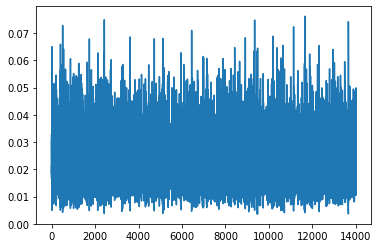

Weight value is  [[ 0.1781057   0.04628586 -0.07205559  0.04249575 -0.29703953 -0.96001141
  -0.37929388  0.00984051  0.60585604  0.59619718  0.26777294 -0.09343155
   0.06497489  0.25442381  0.17676317  0.34106348 -0.14314711  0.21639718
  -0.52866076  0.85399178 -0.24195905  0.08568934  0.01731893  0.14458045
  -0.22432172  0.05354832 -0.00695397 -0.11412734 -0.02387764 -0.18171474
  -0.22769595  0.64792255  0.66658303 -0.48471365 -0.03748675 -0.65847758
  -0.4139508  -0.61894931  0.14141482  0.65748078  0.12302819 -0.30093979
  -0.52848033  1.15168334  0.29893739 -0.14815202 -0.24322413  0.32099681
   0.48778832 -0.54513139  0.24856601 -0.03368201  0.30292443  0.36894807
  -0.78903089 -0.27063722  0.26204527  0.18214156 -0.56180253 -0.09936111
   0.24766222]] 

Accuracy is  0.46218487394957986 

Precision is  0.4838709677419355 

Classification Report is                precision    recall  f1-score   support

         0.0       0.38      0.17      0.24        58
         1.0       0

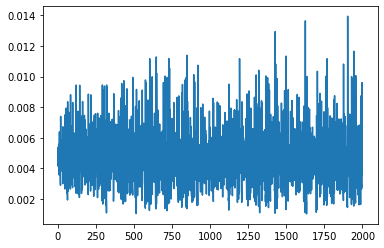

Weight value is  [[ 0.03043151 -0.00933609 -0.00801522  0.12294042 -0.12680976 -0.38391422
  -0.10046286  0.0555199   0.16937325  0.12750122 -0.15798189  0.13488528
  -0.04535368  0.17564867 -0.07801428  0.05829244  0.02366955  0.01523245
   0.12064531  0.15734848 -0.21569055 -0.00579809 -0.10601897 -0.01152779
  -0.23602124 -0.17463956 -0.10479258 -0.16010219  0.01462355 -0.19266261
  -0.45378987  0.01150804  0.27477118 -0.02895618 -0.04115413  0.04759317
   0.10431355 -0.00542204  0.16129064  0.16359153  0.23260832 -0.11413553
   0.00622731  0.49688083 -0.06000152 -0.17901481 -0.03127018  0.26399998
   0.14261728 -0.028092    0.03293859 -0.00681454 -0.13657924  0.12991374
  -0.17422009 -0.35751483 -0.08517795  0.30558959 -0.09571814  0.00172005
   0.09091014]] 

Accuracy is  0.5126050420168067 

Precision is  0.5161290322580645 

Classification Report is                precision    recall  f1-score   support

         0.0       0.50      0.22      0.31        58
         1.0       0.

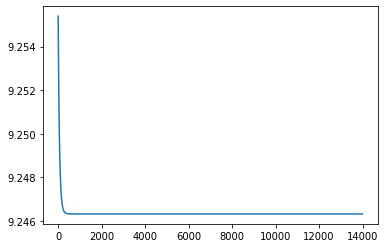

Weight value is  [[ 0.0001989  -0.00082266  0.00322251  0.0096663   0.00179255 -0.00716773
  -0.00068647  0.00638958  0.01400951  0.00851786  0.00013826 -0.00182757
   0.00366977  0.00844468  0.00494055  0.00035131 -0.00208758  0.0042107
   0.00515679  0.01013226 -0.00241415 -0.00170758  0.00309897  0.00788812
   0.00201908 -0.0005974  -0.00345783  0.0007162   0.00626167  0.0023806
  -0.00305544  0.00151745  0.00204117 -0.00790118 -0.00154845 -0.00697534
  -0.0148278  -0.01318794 -0.00375506  0.00215538  0.00169343 -0.00780438
  -0.00866159  0.01937272  0.00138899 -0.00559562 -0.00998046  0.00126222
   0.00736994 -0.00366849  0.00462935 -0.00490809 -0.00161139  0.00641905
  -0.00551557 -0.00278637 -0.00206082  0.00289785 -0.00496053 -0.00159123
   0.00375158]] 

Accuracy is  0.4369747899159664 

Precision is  0.44642857142857145 

Classification Report is                precision    recall  f1-score   support

         0.0       0.43      0.47      0.45        58
         1.0       0.4

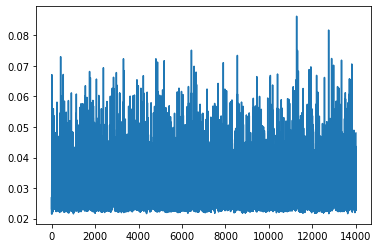

Weight value is  [[-0.03606747 -0.03196767 -0.01180729 -0.03291195 -0.01383404 -0.01771848
  -0.03459304 -0.00601965 -0.00567116  0.00289688  0.00221632 -0.04719958
   0.00674106  0.00171482 -0.00532404  0.00573465 -0.05178597  0.00770362
  -0.00683568  0.00859534 -0.00220281 -0.03241768  0.02354866  0.02533416
   0.00489093  0.00533102 -0.04652287  0.0110256   0.00836514  0.004766
   0.00068102 -0.0050484  -0.01545807 -0.02255949 -0.03176813 -0.0261112
  -0.03738146 -0.03370355 -0.01390373 -0.02658424 -0.00018098 -0.0063643
  -0.03792491 -0.0014644  -0.02421674 -0.03355852 -0.03138913 -0.02529824
  -0.00809286 -0.03502326 -0.0144084  -0.02609285 -0.05178441 -0.02745282
  -0.03747405 -0.02001209 -0.02481415 -0.03981817 -0.0252746  -0.02555464
  -0.02108488]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

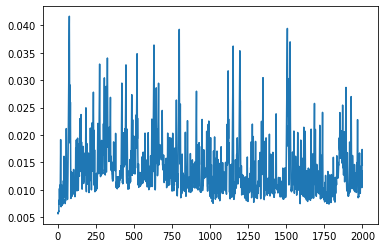

Weight value is  [[-3.59703502e-02 -1.95073841e-02 -2.35445283e-02 -2.46372523e-02
  -2.49016824e-02 -3.93973307e-02 -2.63451085e-02 -3.32185595e-02
  -1.57238398e-02 -8.12301053e-03 -6.64599372e-03 -3.20892318e-02
   2.84924600e-03  2.91790759e-02 -2.54485735e-05 -1.63795738e-02
  -5.95929885e-03 -4.38467096e-03  2.46315674e-02  3.65342264e-02
   1.77133281e-02 -2.43682128e-02 -3.45958528e-04  2.13450839e-03
   2.07389398e-03  1.03653507e-03 -1.77896716e-02 -7.47929012e-03
  -2.09632700e-03  6.01958860e-03  1.09864372e-02 -4.65810701e-02
  -1.64742032e-02 -7.61695341e-03 -2.44180428e-02 -1.48709172e-02
  -3.90673459e-02 -5.29846393e-02 -1.48773758e-02 -2.24798301e-02
   8.38052144e-03 -8.25086526e-03 -7.90280814e-02 -1.28919367e-02
  -3.15471377e-02 -1.00864999e-02 -3.59621332e-02 -4.01915366e-02
  -1.42812737e-02 -3.51115449e-02  1.00006932e-02  1.77004125e-02
  -5.01517278e-02 -2.88811287e-02 -5.44766931e-02 -4.04620165e-02
  -1.72049318e-03 -1.59508955e-02 -3.00647021e-02 -2.667166

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

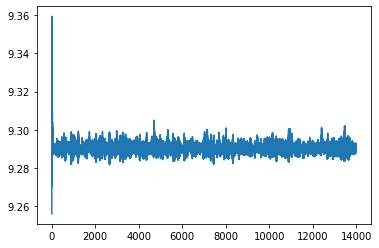

Weight value is  [[ 0.00486674 -0.00495599 -0.00287091 -0.00396589  0.00550882  0.00492824
  -0.00218086  0.00122858 -0.00729737 -0.00256616  0.00451693  0.00203578
  -0.00401179 -0.0008417  -0.00629428 -0.00342797 -0.0037954   0.00207403
   0.00661237 -0.00220045  0.00674889  0.00606041  0.00406579 -0.00407454
   0.00533964  0.00173323  0.00118198 -0.00669392 -0.00555955 -0.00407264
  -0.00243348  0.0030082  -0.00192787 -0.00632726 -0.0050179   0.00015201
  -0.00307445  0.00414068  0.00228123  0.00596635  0.00435435  0.00711295
  -0.00445071 -0.00695142  0.00239116  0.00022606 -0.00285421 -0.00262257
   0.00133816 -0.00512448  0.00514124 -0.00116395 -0.00652293 -0.00562054
  -0.00574255  0.00642498 -0.00231673 -0.00363087 -0.00049183 -0.00311693
  -0.00243109]] 

Accuracy is  0.4957983193277311 

Precision is  0.6666666666666666 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      0.98      0.66        58
         1.0       0.

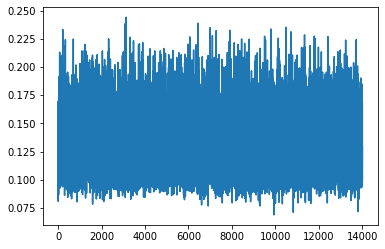

Weight value is  [[-0.02474758 -0.01052184 -0.00912298 -0.00674756 -0.01270744 -0.01015833
  -0.0034879  -0.01364399 -0.00624551 -0.00520335 -0.01080119 -0.00478398
  -0.0132824  -0.0094834  -0.00520588 -0.00942854 -0.01050603 -0.00036997
  -0.00999905 -0.00260702 -0.00811146 -0.01220949 -0.00132484 -0.00877952
  -0.00959546  0.00169433 -0.00503895  0.00065586 -0.00100787 -0.01178142
   0.00337353 -0.01456559 -0.01577434 -0.02095831 -0.02357776 -0.02028569
  -0.00827839 -0.02467241 -0.0094318  -0.01160676 -0.01833497 -0.00045748
  -0.01719577 -0.01030657 -0.02030511 -0.01830436 -0.01195629 -0.01340071
  -0.01443109 -0.02722452 -0.01869027 -0.0060026  -0.02015374 -0.02066723
  -0.01374491 -0.01234077 -0.01129811 -0.01395652 -0.01851298 -0.01737168
  -0.02164917]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

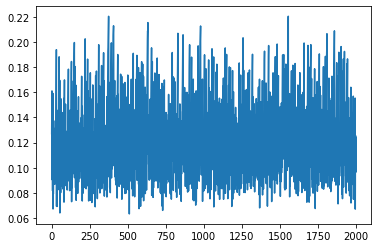

Weight value is  [[-0.02102476  0.01113187 -0.00440323 -0.00466708 -0.00503969  0.00475467
   0.0106458   0.00963166  0.01046203 -0.00018323  0.00275644  0.00515185
   0.00829288 -0.00614266 -0.00545231 -0.00894799  0.01143328 -0.00451587
  -0.00058878 -0.00825724  0.00089932  0.01148087  0.00010853 -0.01347838
   0.00235424  0.00218018  0.00997738 -0.00232098 -0.00930746  0.00564936
  -0.01019048 -0.00441093 -0.02320017 -0.01188673 -0.01721438 -0.0260551
  -0.0144649  -0.02558302 -0.02957415 -0.01939827 -0.02772328 -0.00992981
  -0.01530306 -0.03179065 -0.01436016 -0.01114137 -0.01115927  0.0034385
  -0.02725995 -0.0154353  -0.01868602 -0.01043142 -0.02005516 -0.01405799
  -0.00377767  0.00121684 -0.01937605 -0.01911858  0.00085417 -0.01013605
  -0.00183874]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

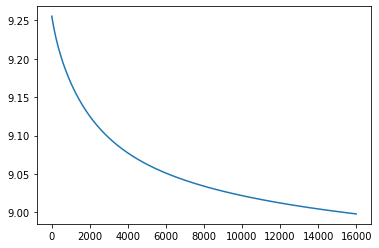

Weight value is  [[ 0.23206558  0.0675769   0.03334286  0.01915685 -0.39037421 -1.0978851
  -0.28657586  0.0396154   0.60272336  0.456359    0.14785138 -0.1458784
  -0.03115656  0.35363696  0.11864526  0.37425951 -0.08039253  0.17706988
  -0.47598249  0.81420103 -0.24650509  0.12395017 -0.01060957  0.25646422
  -0.31937293  0.12223898 -0.01754145 -0.10095358  0.04321755 -0.27600071
  -0.18475267  0.52835901  0.47582556 -0.55141776 -0.08875618 -0.60816003
  -0.50071466 -0.72482621 -0.08318575  0.65020525  0.17490434 -0.25519233
  -0.40724581  1.01491611  0.44680873 -0.20795944 -0.23887754  0.41182115
   0.4715215  -0.55968453  0.24772267 -0.01072733  0.19247172  0.3075473
  -0.82991308 -0.17182957  0.24621401  0.19955647 -0.55417642 -0.13700073
   0.23214747]] 

Accuracy is  0.5042016806722689 

Precision is  0.5138888888888888 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      0.40      0.44        58
         1.0       0.51 

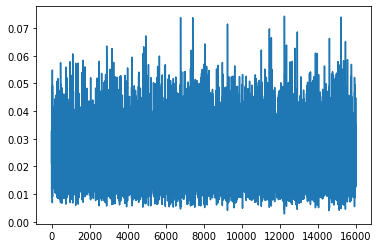

Weight value is  [[ 0.23422536 -0.16126992  0.17884624 -0.01461487 -0.33914171 -1.17439495
  -0.23727057  0.22844597  0.75376439  0.55992512  0.04373948 -0.08639471
   0.04600056  0.34449844  0.20970756  0.34090451 -0.07618552  0.10928166
  -0.48460596  0.92570963 -0.19782706  0.14308743  0.06418375  0.33901795
  -0.37587501  0.09880884 -0.11946903 -0.10920071  0.12611007 -0.3365159
  -0.10813476  0.66151146  0.49451834 -0.61192595 -0.09394237 -0.69470496
  -0.50961804 -0.60567832 -0.04248943  0.50627239  0.15484068 -0.26144125
  -0.36831473  1.10783588  0.40241785 -0.22410877 -0.28757659  0.54876657
   0.51782686 -0.55712808  0.29254717  0.09300391  0.21287234  0.40915347
  -0.73263877 -0.1792462   0.30023231  0.20000773 -0.61900909 -0.02518817
   0.23402667]] 

Accuracy is  0.5294117647058824 

Precision is  0.5229357798165137 

Classification Report is                precision    recall  f1-score   support

         0.0       0.60      0.10      0.18        58
         1.0       0.5

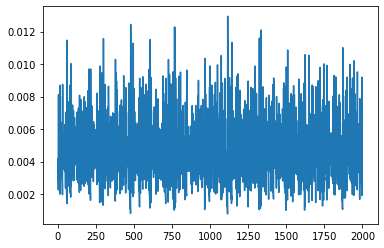

Weight value is  [[-0.0195699  -0.13777481  0.01855103  0.08581978  0.06784154 -0.23200927
  -0.10702304  0.08689322  0.22676448 -0.01255781 -0.0748673  -0.27086809
  -0.06996278  0.17290834 -0.12492808 -0.18562299 -0.02077502  0.02960018
   0.08147201  0.17104216 -0.14553626 -0.07548561 -0.00509058  0.23341217
  -0.0694071  -0.19116615 -0.21907573 -0.1093361   0.10754249 -0.04052667
  -0.17331204  0.21495615  0.15745052 -0.06827735 -0.08672569 -0.05733108
  -0.2299538  -0.16282217 -0.05065027  0.0314368   0.04665078 -0.12064283
   0.03708369  0.51072728 -0.01939836 -0.172256   -0.15195314  0.31160855
   0.20070309 -0.15299081  0.12814705  0.02983626 -0.12460497  0.05071829
  -0.11173444  0.01533238  0.00447326  0.07982907 -0.1064962  -0.14970593
   0.07500428]] 

Accuracy is  0.44537815126050423 

Precision is  0.3333333333333333 

Classification Report is                precision    recall  f1-score   support

         0.0       0.46      0.83      0.59        58
         1.0       0

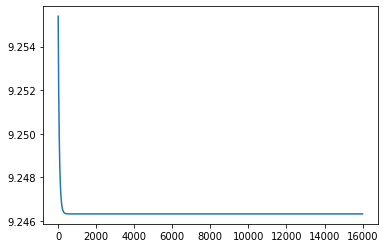

Weight value is  [[ 0.0001989  -0.00082266  0.00322251  0.0096663   0.00179255 -0.00716773
  -0.00068647  0.00638958  0.01400951  0.00851786  0.00013826 -0.00182757
   0.00366977  0.00844468  0.00494055  0.00035131 -0.00208758  0.0042107
   0.00515679  0.01013226 -0.00241415 -0.00170758  0.00309897  0.00788812
   0.00201908 -0.0005974  -0.00345783  0.0007162   0.00626167  0.0023806
  -0.00305544  0.00151745  0.00204117 -0.00790118 -0.00154845 -0.00697534
  -0.0148278  -0.01318794 -0.00375506  0.00215538  0.00169343 -0.00780438
  -0.00866159  0.01937272  0.00138899 -0.00559562 -0.00998046  0.00126222
   0.00736994 -0.00366849  0.00462935 -0.00490809 -0.00161139  0.00641905
  -0.00551557 -0.00278637 -0.00206082  0.00289785 -0.00496053 -0.00159123
   0.00375158]] 

Accuracy is  0.4369747899159664 

Precision is  0.44642857142857145 

Classification Report is                precision    recall  f1-score   support

         0.0       0.43      0.47      0.45        58
         1.0       0.4

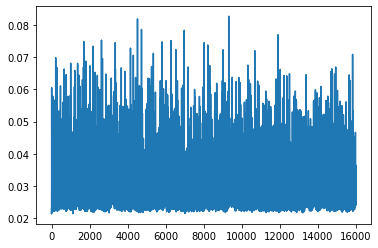

Weight value is  [[ 1.45163051e-02 -1.20088127e-02 -4.07944838e-03  8.58783968e-03
   6.60430357e-03 -1.34932587e-02 -1.26841775e-02  9.51548673e-03
   2.27986628e-02  1.81790690e-02 -2.16520411e-03  1.53484999e-03
   1.60956928e-02  2.27448411e-02  9.09717536e-03  7.91236024e-03
   4.14076779e-03  1.53883870e-02  2.26361812e-02  1.87564430e-02
   6.96146136e-03  6.26700006e-04  2.40734367e-02  3.51215127e-02
   8.71750799e-03  1.97527256e-03  1.03810488e-02  2.03512217e-02
   3.32220343e-02  6.63683915e-03  5.19176423e-03  8.37296636e-03
   2.29045291e-02  1.50666741e-02  1.41265548e-02  1.34109894e-02
  -1.83790242e-04 -3.13823728e-03 -6.61178779e-04  1.06403345e-02
   1.61862538e-02 -6.40384190e-03 -1.31089425e-02  4.59698689e-02
   1.11385938e-02  2.39057580e-04  2.10207763e-03 -5.58412238e-03
   2.10726630e-02  4.93864662e-03 -8.84841180e-05 -4.24121619e-04
  -1.60305617e-02  1.52515195e-02  1.38841727e-02  3.30305283e-03
   9.97145341e-03 -9.38612395e-03 -1.26575061e-02  1.388870

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


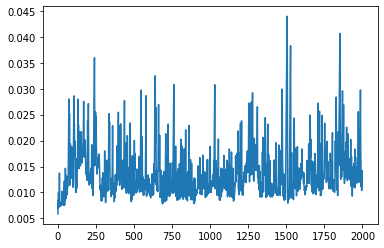

Weight value is  [[-0.04036391 -0.03621333 -0.01894576  0.03600133 -0.01394981 -0.02592697
  -0.0261351  -0.04090329  0.02761286 -0.01565238 -0.02479355  0.00605537
  -0.01355375  0.03374574 -0.02541784 -0.03029195 -0.01062351 -0.02756716
   0.02817658 -0.01080442 -0.00630177 -0.0142571  -0.04527801 -0.0158172
  -0.05543563 -0.02691813 -0.01734994 -0.05292795  0.00940751 -0.03737997
  -0.01361247 -0.0619112   0.00631487 -0.01234643 -0.02524766 -0.04049331
  -0.08598436 -0.02604328 -0.02854785 -0.03000786 -0.0238308  -0.08952598
  -0.01776546 -0.04666579 -0.04654399 -0.03934077 -0.02916479 -0.06813003
  -0.01855419 -0.04453835  0.0173038  -0.02892752 -0.02310062 -0.05009923
  -0.05425429 -0.02268753 -0.01925426 -0.03087659 -0.01403362 -0.04800607
   0.02024264]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

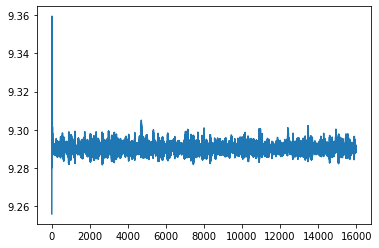

Weight value is  [[ 7.32840282e-03  5.02253110e-03  4.86311892e-03 -5.21565881e-04
  -6.84173950e-03  2.63345832e-03 -4.55350073e-03  3.33696476e-03
   6.29891761e-03 -5.35659377e-03 -2.11319455e-03  2.51512695e-03
   3.65216026e-03  5.10764602e-03 -9.81326666e-04  5.90887270e-03
   3.07752632e-04 -4.40593713e-03  2.83760274e-03 -2.72206106e-03
  -5.94708924e-03  2.84888133e-03  4.36816059e-03 -2.77071083e-03
  -2.72860992e-03 -3.12272724e-03  3.87588734e-03 -3.54127927e-03
   6.23825979e-03 -6.66899796e-04 -5.71664491e-03  3.85212048e-03
  -5.46350039e-03 -2.18733994e-03  4.16255725e-03 -3.17538225e-03
   5.55038622e-03  1.41144724e-03 -5.26034216e-03  5.96388230e-03
  -2.91356828e-03 -4.27899026e-03  2.19446550e-03 -3.10478465e-03
  -2.40059379e-03 -3.29188389e-03 -7.09132777e-03  4.29871332e-03
  -2.09455684e-03  3.92762009e-03  3.92454129e-05  3.41975368e-03
  -6.63204211e-03 -3.75965647e-03 -7.42932470e-03  3.71117684e-03
   1.22947643e-05  9.23078750e-04 -7.94927599e-05 -6.611262

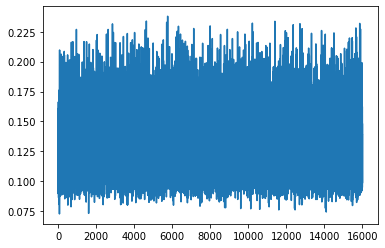

Weight value is  [[-0.02812611 -0.00423152 -0.0023031  -0.0037195  -0.0116327  -0.00154726
  -0.01831256 -0.01639647 -0.00855443 -0.00374865 -0.00409854 -0.01198881
  -0.0153411  -0.01138756 -0.00979929 -0.01092532 -0.01406951 -0.00480748
  -0.01663817 -0.00839246  0.00192887 -0.0138164  -0.011038   -0.01735263
  -0.0138356  -0.00970782 -0.01303616 -0.00236182 -0.01522256 -0.00803445
   0.0016886  -0.01435121 -0.01513866 -0.0236108  -0.01541998 -0.01783807
  -0.01511127 -0.01474464 -0.02289475 -0.01640564 -0.01114657 -0.00452048
  -0.01850329 -0.02060166 -0.01815653 -0.01499615 -0.00786925 -0.02005544
  -0.01358466 -0.01395186 -0.01177545 -0.01593859 -0.00699052 -0.01584849
  -0.01686307 -0.02494522 -0.00622259 -0.02642899 -0.00566057 -0.02521387
  -0.01578676]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

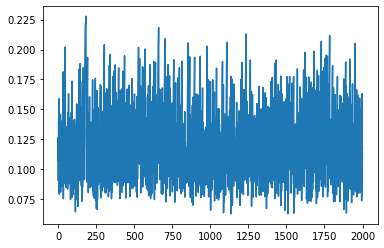

Weight value is  [[ 0.03153152  0.00798707  0.01788951  0.01165072  0.01869325  0.00501693
   0.00469492  0.01013636  0.02320167  0.00657401  0.00605692  0.0183194
   0.01248946  0.01573267  0.01276021  0.00930296  0.00604307  0.00449288
   0.00213894  0.01117644  0.01061752  0.00794478  0.01003863  0.01003196
   0.00908108  0.00259313  0.01561107  0.01072341  0.02063636  0.01262588
  -0.00138936  0.002112    0.01921687  0.00921043  0.02394592  0.01716919
   0.00934726  0.01470202  0.00657925  0.02830567  0.00781989  0.00190716
   0.01270655  0.00238253  0.02004353  0.0159246   0.00352112  0.0135469
   0.01676176  0.02416416  0.01081196 -0.00154617  0.01092981  0.00441056
   0.03106445  0.01941963  0.01066254  0.01868599  0.01748681  0.03137428
   0.008883  ]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


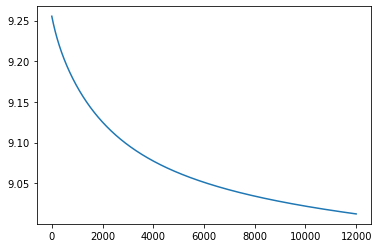

Weight value is  [[ 0.16408922  0.01641701  0.00786721  0.0433727  -0.32216116 -0.92138655
  -0.22285785  0.06336502  0.53549995  0.39840038  0.08359368 -0.11090787
  -0.00959939  0.30102964  0.1123732   0.28807543 -0.06870813  0.1339743
  -0.33650646  0.68071283 -0.20710876  0.09403555  0.003275    0.22583546
  -0.24637029  0.09105726 -0.03275634 -0.10644373  0.04373029 -0.20681226
  -0.17185118  0.49454269  0.4446555  -0.50695277 -0.06837453 -0.53706909
  -0.48069913 -0.67035203 -0.08049839  0.5109375   0.16740513 -0.23224116
  -0.3817487   0.98347663  0.34133301 -0.21785255 -0.22800422  0.375337
   0.44713258 -0.45393302  0.24065166 -0.01989934  0.16655316  0.29310893
  -0.68160269 -0.17605756  0.2189862   0.21255463 -0.50782749 -0.12857428
   0.22028591]] 

Accuracy is  0.5126050420168067 

Precision is  0.5211267605633803 

Classification Report is                precision    recall  f1-score   support

         0.0       0.50      0.41      0.45        58
         1.0       0.52 

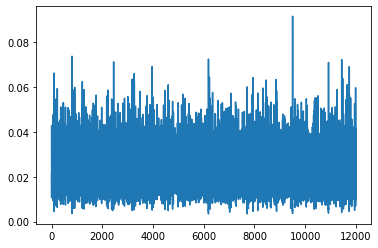

Weight value is  [[ 0.23709183 -0.09136708  0.1023126   0.16198927 -0.15002215 -0.89553112
  -0.14046075  0.12142075  0.62131152  0.5238051   0.12181506 -0.11072709
   0.09188007  0.37817243  0.14082815  0.31953401  0.00363246  0.19638649
  -0.34500484  0.63961043 -0.1928483   0.08493954  0.11814386  0.35338791
  -0.09692093  0.06893865  0.0233934   0.07662706  0.21291071 -0.1362939
  -0.15691328  0.44373779  0.37900104 -0.47952041 -0.10421907 -0.55818418
  -0.70303141 -0.66312763  0.07346948  0.53283732  0.10888294 -0.39878967
  -0.3687992   1.15203057  0.35649912 -0.25018793 -0.31419127  0.51095542
   0.52985976 -0.43248871  0.2620345  -0.13862967  0.21523144  0.49142129
  -0.70129484 -0.23383152  0.25266739  0.22217651 -0.48328698 -0.12259634
   0.18345328]] 

Accuracy is  0.5126050420168067 

Precision is  0.5135135135135135 

Classification Report is                precision    recall  f1-score   support

         0.0       0.50      0.07      0.12        58
         1.0       0.5

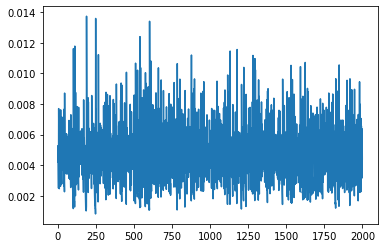

Weight value is  [[-2.87416721e-02  2.06750024e-02  6.28435042e-02 -6.13642704e-03
   2.13973833e-02 -2.32854776e-01 -6.38887690e-02  1.02745771e-01
   1.37300537e-01  2.22603026e-01  5.84704895e-02 -1.62280032e-01
  -5.32582531e-02 -1.62955519e-04 -4.30124177e-02  9.52830368e-02
  -1.52358352e-01  1.30577957e-01 -1.45878297e-01  2.14309657e-01
  -3.08812854e-02 -5.26903909e-02  1.25555367e-01 -7.39247418e-02
   1.69063610e-02  1.34005554e-01  3.33849114e-02  2.99449451e-01
  -2.94795970e-02  3.89914174e-02  1.13397032e-01  2.27257965e-01
   5.60185187e-03 -7.85956332e-02 -8.22172245e-02 -2.22153202e-01
  -8.19189062e-02 -1.60263742e-01  5.55347308e-02 -6.52162047e-03
   2.08719316e-02  6.71248276e-02 -2.08572985e-01  2.09132966e-01
   1.97991556e-02 -7.83293370e-02  9.55704811e-02  2.18604471e-01
   1.85633782e-01 -9.87818435e-02  2.48001882e-01  7.32005050e-02
   3.28328031e-03  2.82773060e-01 -1.32919202e-01 -1.04146415e-01
   9.64431349e-02  1.31308653e-01 -1.92016713e-01 -4.060644

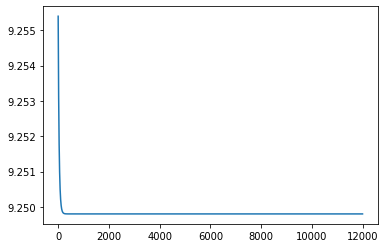

Weight value is  [[ 9.32667794e-05 -4.20346014e-04  2.09085805e-03  6.05909446e-03
   1.18256095e-03 -4.25811772e-03 -3.49985460e-04  4.03394287e-03
   8.65994456e-03  5.23933174e-03  1.42445358e-04 -1.08880342e-03
   2.38020092e-03  5.28013009e-03  3.06295525e-03  2.28756732e-04
  -1.27190256e-03  2.69846836e-03  3.29344395e-03  6.20413856e-03
  -1.42712430e-03 -1.07369039e-03  1.99852149e-03  4.92824266e-03
   1.30288155e-03 -3.50447083e-04 -2.13179266e-03  5.67949991e-04
   3.94615131e-03  1.52249633e-03 -1.82171406e-03  7.44426050e-04
   1.03547875e-03 -4.88924264e-03 -9.81400025e-04 -4.25508023e-03
  -9.14990724e-03 -8.16236388e-03 -2.41375246e-03  1.23939171e-03
   9.77140250e-04 -4.86742568e-03 -5.38547263e-03  1.16374796e-02
   8.02760730e-04 -3.41254406e-03 -6.19303264e-03  5.87626216e-04
   4.38052011e-03 -2.23027474e-03  2.77382000e-03 -3.09929871e-03
  -1.10351897e-03  3.83970757e-03 -3.33846960e-03 -1.67833124e-03
  -1.37217559e-03  1.63819462e-03 -3.03322318e-03 -9.804269

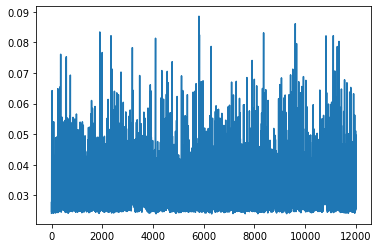

Weight value is  [[0.10495746 0.04487241 0.02763303 0.03731748 0.02708675 0.01353925
  0.03985591 0.03610151 0.0429326  0.03773721 0.02584063 0.05302068
  0.02471002 0.03214217 0.02936734 0.01489882 0.0509209  0.02958894
  0.0352865  0.04025808 0.01246106 0.04547808 0.03731918 0.04736542
  0.03360149 0.01112507 0.051886   0.03890718 0.04964088 0.03826502
  0.01849525 0.04774995 0.0753865  0.05217133 0.08706531 0.06221599
  0.0286769  0.05837893 0.04732503 0.09019249 0.0459391  0.03819372
  0.07481361 0.07889449 0.08768631 0.04867313 0.04649953 0.06461963
  0.06761882 0.08338374 0.05456417 0.03918534 0.06820326 0.05692563
  0.08278464 0.04727371 0.0451757  0.07708783 0.04874904 0.08197257
  0.0682314 ]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51      1.00      0.68        61

    accuracy               

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


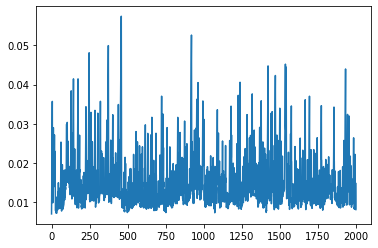

Weight value is  [[ 0.02209376  0.00127105  0.00293513  0.01667195  0.02167371  0.00400331
  -0.00232575  0.00610364  0.01704468  0.00409168  0.00616103 -0.00066727
  -0.00987089  0.00298566 -0.01310596  0.00054915  0.01209833  0.00859862
   0.01621124  0.00050097 -0.00054508 -0.008199   -0.00520093  0.00417673
  -0.01763995 -0.00147576  0.00151894  0.00812539  0.00967449  0.003991
   0.00264066  0.01162405 -0.00345592  0.03284072  0.01095478  0.01288576
   0.00194628 -0.0174948   0.03808489  0.01847896 -0.00314925  0.02280482
   0.03298264  0.02321668  0.02856794 -0.01635067  0.00702199  0.01261481
   0.01773279  0.01449676  0.0340974  -0.01453428  0.01752337  0.00278097
   0.01451858  0.00132033 -0.01030764  0.02296707  0.00553266  0.01290747
  -0.00536137]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


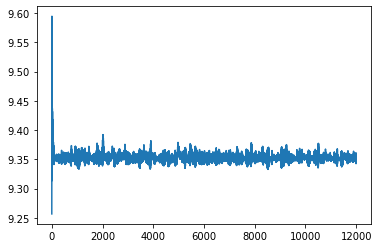

Weight value is  [[-0.00310086 -0.00972593 -0.00103286 -0.01018427 -0.00095176  0.01087737
   0.00484941  0.00398523 -0.00888011  0.00142782 -0.00953573  0.00653889
  -0.00500414  0.00686508  0.00793136 -0.00518105 -0.01103244  0.0120682
   0.00282273 -0.01206127 -0.00044293  0.00523407  0.00894138 -0.00920944
   0.0005541  -0.00968452  0.01049733  0.0054977  -0.00702535 -0.00750226
   0.00085389  0.00601868  0.01153019  0.00538262  0.00781725 -0.0109056
   0.00069291  0.0002011  -0.00950358 -0.00224793 -0.00784592 -0.00682349
  -0.00876724  0.01123693  0.00380424 -0.00114313  0.01206586  0.01237918
   0.01125031 -0.00506237 -0.00112797 -0.00941523  0.00331749 -0.00974615
  -0.01176073 -0.00779025 -0.00693285 -0.01114781  0.00896209 -0.00301817
   0.00493386]] 

Accuracy is  0.5294117647058824 

Precision is  0.6923076923076923 

Classification Report is                precision    recall  f1-score   support

         0.0       0.51      0.93      0.66        58
         1.0       0.69

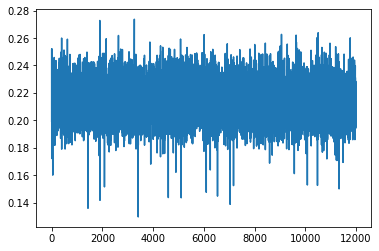

Weight value is  [[-2.00509463e-02 -1.42045743e-02 -8.57708350e-03 -1.55357770e-02
   5.07530040e-03  3.21913237e-03 -5.69409815e-03 -4.98794450e-03
   8.36043252e-03 -5.20100517e-03 -8.23456422e-03 -1.78686477e-02
  -1.08258981e-02  4.49139627e-03 -5.57449612e-03 -1.59843897e-02
  -1.70368800e-02 -4.70060238e-03 -2.63900964e-03  3.39034782e-03
  -2.89356467e-03 -1.44700711e-02 -2.31098921e-02 -5.36346126e-03
  -1.03048171e-02  6.71738483e-05 -8.07102719e-03 -1.27329280e-02
   1.64983906e-03 -1.26466505e-02 -1.53727001e-02 -3.87201042e-03
  -1.13143898e-02 -2.62127522e-02 -2.73436988e-02 -5.77736565e-03
  -1.13491647e-02 -2.38152534e-02 -2.15686043e-02 -3.13232542e-02
  -8.69571357e-03 -2.22553838e-02 -1.74450322e-02 -6.29956753e-03
  -2.31670539e-02 -1.99819400e-02 -2.24142407e-02 -1.75475397e-02
  -4.42086214e-03 -1.84560033e-02 -1.19484527e-02 -2.33921944e-02
  -1.91206622e-02 -1.95324016e-02 -1.87124374e-02  2.13300288e-03
  -1.40336130e-02 -1.63734619e-02 -2.41443547e-02 -3.185939

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

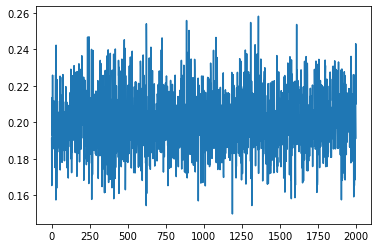

Weight value is  [[ 0.00174569 -0.0381043  -0.02139206 -0.01704406  0.00172892 -0.01200089
  -0.02980614 -0.01378416 -0.02021301 -0.00425427 -0.02196887 -0.02874785
  -0.02261511 -0.0255906  -0.01689738  0.00247407 -0.01041371 -0.01546256
  -0.02163306 -0.02769592 -0.01439105 -0.00983687 -0.0212895  -0.01143777
  -0.02289193 -0.00555237 -0.01466739 -0.02158622 -0.0295444  -0.02700559
  -0.00980404  0.0062764   0.01302964 -0.00625524  0.00845122 -0.00758543
  -0.00466598 -0.01353394 -0.00554498  0.00419368 -0.0005335  -0.01576388
  -0.02245598 -0.01203136 -0.00336022 -0.02367997 -0.01311627 -0.00701305
  -0.01306511 -0.00472249  0.00407667 -0.0007809  -0.01443947 -0.00616287
   0.00024072 -0.00681479 -0.01783011 -0.00791877 -0.00024442 -0.01890687
  -0.01910187]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

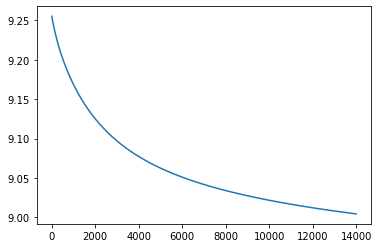

Weight value is  [[ 0.1982443   0.04198515  0.01963653  0.03060533 -0.3587613  -1.01423778
  -0.2554094   0.05186961  0.57051258  0.42935459  0.11588018 -0.12816265
  -0.01983548  0.32842887  0.11575416  0.33340634 -0.07492562  0.15580498
  -0.40727731  0.75041535 -0.22689714  0.10978129 -0.00298825  0.24170608
  -0.28450295  0.10758166 -0.02496037 -0.10373592  0.04279495 -0.24230473
  -0.17874243  0.51394675  0.46301006 -0.532283   -0.07787251 -0.57556732
  -0.4924066  -0.7013594  -0.08174001  0.5830082   0.17204887 -0.24500306
  -0.39631786  1.00232754  0.39548883 -0.21324419 -0.23378938  0.39586542
   0.46148001 -0.50850447  0.24488029 -0.01504775  0.1813049   0.3011463
  -0.75893249 -0.17460227  0.23452034  0.20665826 -0.53450882 -0.1337567
   0.22735447]] 

Accuracy is  0.5126050420168067 

Precision is  0.5211267605633803 

Classification Report is                precision    recall  f1-score   support

         0.0       0.50      0.41      0.45        58
         1.0       0.52

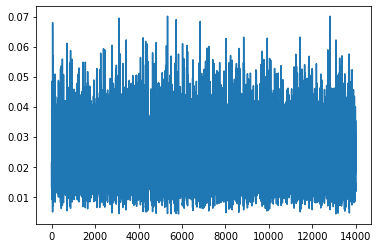

Weight value is  [[ 0.31336336  0.02193984  0.13203283  0.06794852 -0.29008298 -0.9573262
  -0.27618472  0.16387487  0.63888228  0.38834305  0.14662582  0.00720246
  -0.01883495  0.37966242  0.14140746  0.33685604  0.02248931  0.26478757
  -0.33813975  0.89576709 -0.24745811  0.17773458 -0.04090735  0.27391663
  -0.29571378  0.0536112   0.03474186 -0.03482604  0.17389995 -0.15217022
  -0.1459143   0.59357149  0.56302929 -0.44254166  0.03755107 -0.42037168
  -0.55203389 -0.75235062 -0.08086966  0.64823372  0.17375524 -0.40848033
  -0.40800963  1.13984495  0.31264576 -0.28731839 -0.08198762  0.45955036
   0.43999083 -0.5917291   0.37392057 -0.09054961  0.31240486  0.38852603
  -0.74493407 -0.15302992  0.16286187  0.36003014 -0.65238633 -0.09176686
   0.46579708]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


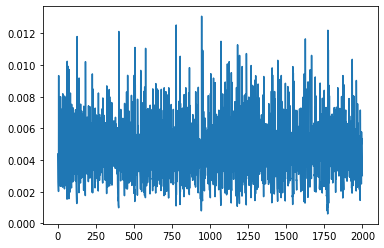

Weight value is  [[ 0.01060151  0.04930653  0.15499614  0.32980069 -0.06515    -0.22911716
   0.17722714  0.27926411  0.31831838  0.20796579  0.0523246  -0.04786854
   0.15763116  0.29000723  0.25798755  0.0916391   0.01588488  0.13062228
   0.11853351  0.41206828  0.03514094  0.06205442  0.10413558  0.10503667
   0.00169096 -0.03512921 -0.16507564 -0.07056806  0.06350626 -0.01696259
  -0.03088968  0.32537859  0.13600897 -0.15983336 -0.01243961 -0.17371387
  -0.50122722 -0.17092377 -0.00103389  0.00124152 -0.02745608 -0.1881313
  -0.18223547  0.31049468  0.06193818  0.07903389 -0.37827193  0.10840742
  -0.01012391 -0.01743816  0.21990464 -0.06902891  0.01656388  0.0568747
  -0.16898329 -0.23800423  0.10931305  0.1003706  -0.08195439 -0.0163277
   0.21412283]] 

Accuracy is  0.5378151260504201 

Precision is  0.5258620689655172 

Classification Report is                precision    recall  f1-score   support

         0.0       1.00      0.05      0.10        58
         1.0       0.53 

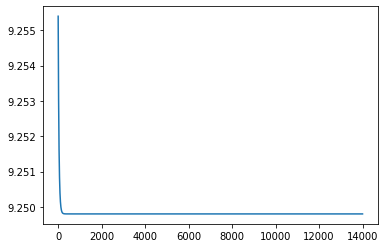

Weight value is  [[ 9.32667794e-05 -4.20346014e-04  2.09085805e-03  6.05909446e-03
   1.18256095e-03 -4.25811772e-03 -3.49985460e-04  4.03394287e-03
   8.65994456e-03  5.23933174e-03  1.42445358e-04 -1.08880342e-03
   2.38020092e-03  5.28013009e-03  3.06295525e-03  2.28756732e-04
  -1.27190256e-03  2.69846836e-03  3.29344395e-03  6.20413856e-03
  -1.42712430e-03 -1.07369039e-03  1.99852149e-03  4.92824266e-03
   1.30288155e-03 -3.50447083e-04 -2.13179266e-03  5.67949991e-04
   3.94615131e-03  1.52249633e-03 -1.82171406e-03  7.44426050e-04
   1.03547875e-03 -4.88924264e-03 -9.81400025e-04 -4.25508023e-03
  -9.14990724e-03 -8.16236388e-03 -2.41375246e-03  1.23939171e-03
   9.77140250e-04 -4.86742568e-03 -5.38547263e-03  1.16374796e-02
   8.02760730e-04 -3.41254406e-03 -6.19303264e-03  5.87626216e-04
   4.38052011e-03 -2.23027474e-03  2.77382000e-03 -3.09929871e-03
  -1.10351897e-03  3.83970757e-03 -3.33846960e-03 -1.67833124e-03
  -1.37217559e-03  1.63819462e-03 -3.03322318e-03 -9.804269

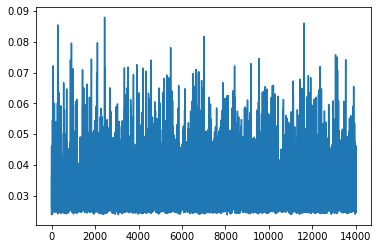

Weight value is  [[ 9.88813123e-03 -6.00646485e-03 -8.53542691e-04  7.31320156e-03
   2.72275927e-03 -1.86010354e-02 -8.21099710e-03  3.92748487e-03
   8.53540360e-03  7.68432716e-03 -6.87663992e-03 -1.67379176e-03
   3.57661913e-03 -3.54551770e-03  2.41972964e-03 -8.83917760e-03
  -3.88183200e-03  1.37541899e-02 -5.86131536e-05  9.13645931e-03
  -1.20302839e-02 -1.01354078e-03  1.67081267e-02  1.59010646e-02
   1.20672861e-02 -8.29889495e-03 -4.08827091e-03  1.68437118e-02
   1.17616571e-02  1.34156140e-02 -1.19542903e-02  6.32564078e-03
   9.30910516e-03  3.10767076e-03  5.57066229e-03  3.70394127e-04
  -3.62964320e-03 -3.24462398e-03  8.26784891e-03  8.20392075e-03
  -3.79544471e-03  5.08105746e-04 -3.92961028e-04  1.69412654e-02
   8.66957975e-03  7.74461599e-03 -6.48511153e-03 -9.55895489e-03
   2.05883859e-02 -5.39244111e-04 -2.00052331e-02 -5.41966762e-03
  -8.14106529e-03  6.83964264e-03  4.26428489e-03 -4.07985661e-03
   2.30476893e-03 -1.63897953e-02 -3.08373982e-03  7.867870

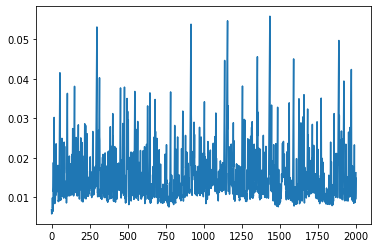

Weight value is  [[-0.05186091 -0.04039548 -0.01294598 -0.0190889  -0.00707787 -0.02629369
  -0.05319693 -0.03808401 -0.02276172 -0.02006592 -0.02848202 -0.0485687
  -0.03446888 -0.02786885 -0.01486963 -0.00961108 -0.0423748  -0.03018277
  -0.03009385 -0.01966253 -0.02050079 -0.03258121 -0.01840313 -0.03258573
  -0.02652015 -0.01283089 -0.03438282 -0.02161497 -0.0321729  -0.02848824
  -0.01524169 -0.04604564 -0.0268248  -0.02619292 -0.04428406 -0.02743473
  -0.00483963 -0.02993235 -0.00240184 -0.02939376 -0.01802942 -0.046307
  -0.01271862 -0.02686598 -0.0218862  -0.02277876 -0.02499318 -0.01417777
  -0.00637442 -0.042938   -0.00910751 -0.03294086 -0.03596395 -0.02285973
  -0.04809576 -0.03616852 -0.02182549 -0.01757004 -0.01711473 -0.04446173
   0.00055621]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

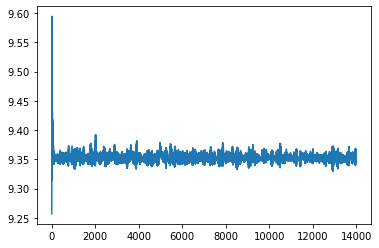

Weight value is  [[-0.0086606   0.00058241 -0.01028762  0.01155556 -0.01091602  0.00057589
  -0.00790745 -0.00537052 -0.00737832 -0.00393775  0.0014533   0.00126984
   0.00044342  0.01031711 -0.0094946   0.00623915 -0.0027864   0.00826791
   0.0063133   0.00476863  0.00367561 -0.00456554 -0.00844442 -0.00038601
  -0.00535674 -0.00282051 -0.00308303 -0.00865933  0.00230893 -0.00202885
   0.00932516 -0.0012147  -0.00857946 -0.0075882  -0.00251679 -0.00978093
  -0.00805332 -0.0092788   0.00042626 -0.00172779  0.00805347  0.00466252
   0.00190831 -0.01199173  0.00963662 -0.00551332  0.0056563  -0.00274279
  -0.00389774 -0.00036707  0.00740591 -0.00670609  0.00759042  0.00072195
  -0.01269356  0.00361399  0.00854017  0.0070299  -0.00209667 -0.01081708
  -0.01084894]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

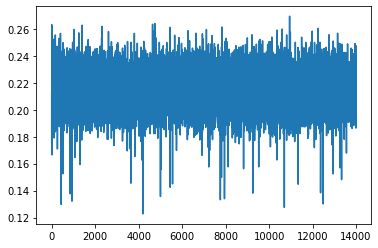

Weight value is  [[ 0.02067671  0.00318247  0.01485961  0.00567612  0.01561183 -0.00408476
   0.02011911  0.01782391  0.01596011  0.01724552  0.01487291  0.02016717
   0.0017224  -0.00102001  0.00092949  0.00550353  0.01351068  0.00663167
  -0.00242204  0.00246075  0.00266865  0.01033557  0.0064377   0.01456332
   0.01345937  0.01151925  0.0251139   0.01891508  0.01026847  0.00257247
  -0.00651544  0.00203776  0.02154391  0.02599859  0.00725602  0.00764719
   0.00336205  0.01727713  0.01539044  0.00578322  0.01784162  0.00449459
   0.02927237  0.02022453  0.00458126  0.02483829  0.01469565  0.02376878
   0.01062617  0.00367827  0.01491209  0.01326148  0.00829983  0.01047412
   0.00306056  0.00715434  0.00860446  0.02243817  0.02086671  0.00682941
   0.00778641]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


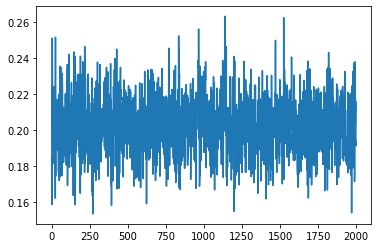

Weight value is  [[-3.79975789e-02 -2.32251645e-02  1.90762743e-03 -1.78916050e-02
  -5.60192820e-03 -7.51732399e-03 -1.47637509e-02  4.47183452e-04
  -1.21952819e-02 -1.08535228e-02 -1.64366146e-02 -1.81914717e-02
  -2.09399546e-04 -1.22120681e-02 -1.25718757e-02 -1.63559777e-03
  -2.35987328e-02 -2.50164912e-03 -1.60468715e-02 -1.10918789e-02
  -1.74387527e-03  1.20138359e-04  3.28948286e-03 -1.37177379e-02
  -4.63491840e-03  4.79076215e-03 -1.32151058e-02  8.01209586e-03
   2.22314697e-03 -1.83199279e-02 -8.71259564e-03 -1.95495995e-03
  -1.00165952e-02 -2.10626169e-03 -2.50010933e-02 -2.38421308e-02
  -2.32207896e-02 -1.73241614e-02 -6.60393137e-03 -1.29612658e-02
  -1.00159902e-02 -8.79480379e-03 -1.13163583e-02  9.56072188e-05
  -1.50566644e-02 -1.59646687e-02 -1.08714650e-02 -1.29539563e-02
  -4.30145602e-03 -3.54143351e-02 -1.79615680e-02 -2.39893605e-02
  -3.10038852e-02 -8.47079727e-03 -3.91648385e-02 -1.23134269e-02
  -1.18002820e-02 -1.30896614e-02 -6.32587914e-03 -1.460042

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

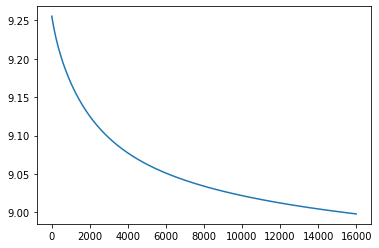

Weight value is  [[ 0.23206558  0.0675769   0.03334286  0.01915685 -0.39037421 -1.0978851
  -0.28657586  0.0396154   0.60272336  0.456359    0.14785138 -0.1458784
  -0.03115656  0.35363696  0.11864526  0.37425951 -0.08039253  0.17706988
  -0.47598249  0.81420103 -0.24650509  0.12395017 -0.01060957  0.25646422
  -0.31937293  0.12223898 -0.01754145 -0.10095358  0.04321755 -0.27600071
  -0.18475267  0.52835901  0.47582556 -0.55141776 -0.08875618 -0.60816003
  -0.50071466 -0.72482621 -0.08318575  0.65020525  0.17490434 -0.25519233
  -0.40724581  1.01491611  0.44680873 -0.20795944 -0.23887754  0.41182115
   0.4715215  -0.55968453  0.24772267 -0.01072733  0.19247172  0.3075473
  -0.82991308 -0.17182957  0.24621401  0.19955647 -0.55417642 -0.13700073
   0.23214747]] 

Accuracy is  0.5042016806722689 

Precision is  0.5138888888888888 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      0.40      0.44        58
         1.0       0.51 

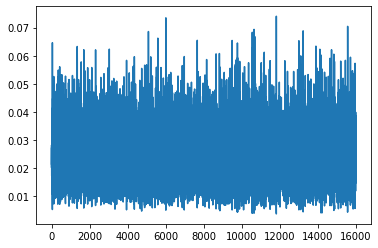

Weight value is  [[ 0.2367973   0.03460293  0.01751389 -0.01757482 -0.44776956 -1.16391294
  -0.26039848  0.13265953  0.46672905  0.42232555  0.06371219 -0.09662361
  -0.2013965   0.24128641  0.1872929   0.37251099 -0.10341831  0.09494567
  -0.41796055  0.9419416  -0.34386637  0.16109858 -0.04527875  0.23063576
  -0.33780074  0.09887857 -0.00507768 -0.11225714  0.09535238 -0.10131743
  -0.35434565  0.60992066  0.43439838 -0.66401236 -0.02443132 -0.760144
  -0.71131564 -0.85318052 -0.18198417  0.59650724  0.03678306 -0.28669523
  -0.41182378  1.19595946  0.41878885 -0.24999864 -0.35407176  0.40759386
   0.49509407 -0.52779171  0.28481295  0.00684564  0.29091531  0.40650198
  -0.82936151 -0.23692523  0.28308493  0.16355143 -0.65825599 -0.1811299
   0.21691019]] 

Accuracy is  0.5042016806722689 

Precision is  0.5416666666666666 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      0.81      0.61        58
         1.0       0.54 

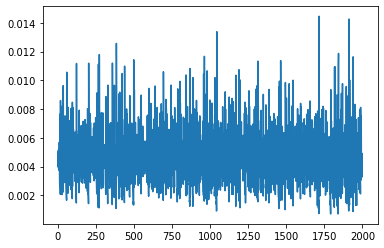

Weight value is  [[ 0.05047679 -0.03767839  0.09625471  0.31010539  0.00549304 -0.15399183
  -0.08224581 -0.0303209   0.18746834  0.18089188 -0.00192587  0.09995673
   0.08782796  0.24486791  0.11991268  0.08884343  0.11348125 -0.03515223
   0.0628516   0.23132629 -0.10476525  0.23276986  0.05813845 -0.1108793
  -0.08260179  0.02904746  0.03675523 -0.06830094 -0.00644299 -0.01663285
  -0.0911442   0.10618516  0.1595901   0.12111094 -0.04285918 -0.12744988
  -0.41177922 -0.1625051   0.05809154  0.13019152  0.22122195 -0.43256124
  -0.04986961  0.46226176  0.06902836 -0.09406471 -0.10318301  0.42837236
   0.06718156 -0.19880364 -0.00993072 -0.22044571 -0.10506431  0.27039736
  -0.05147837 -0.00545062  0.36813507  0.25419559 -0.23724724 -0.1186263
   0.09123571]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


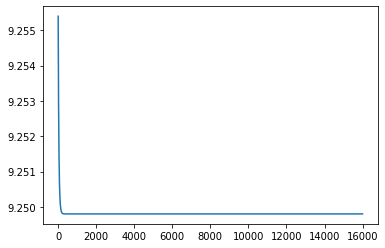

Weight value is  [[ 9.32667794e-05 -4.20346014e-04  2.09085805e-03  6.05909446e-03
   1.18256095e-03 -4.25811772e-03 -3.49985460e-04  4.03394287e-03
   8.65994456e-03  5.23933174e-03  1.42445358e-04 -1.08880342e-03
   2.38020092e-03  5.28013009e-03  3.06295525e-03  2.28756732e-04
  -1.27190256e-03  2.69846836e-03  3.29344395e-03  6.20413856e-03
  -1.42712430e-03 -1.07369039e-03  1.99852149e-03  4.92824266e-03
   1.30288155e-03 -3.50447083e-04 -2.13179266e-03  5.67949991e-04
   3.94615131e-03  1.52249633e-03 -1.82171406e-03  7.44426050e-04
   1.03547875e-03 -4.88924264e-03 -9.81400025e-04 -4.25508023e-03
  -9.14990724e-03 -8.16236388e-03 -2.41375246e-03  1.23939171e-03
   9.77140250e-04 -4.86742568e-03 -5.38547263e-03  1.16374796e-02
   8.02760730e-04 -3.41254406e-03 -6.19303264e-03  5.87626216e-04
   4.38052011e-03 -2.23027474e-03  2.77382000e-03 -3.09929871e-03
  -1.10351897e-03  3.83970757e-03 -3.33846960e-03 -1.67833124e-03
  -1.37217559e-03  1.63819462e-03 -3.03322318e-03 -9.804269

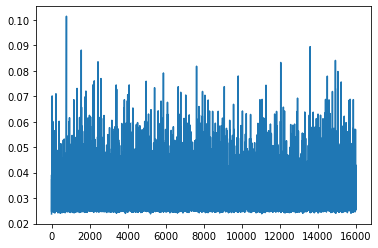

Weight value is  [[-0.03738417 -0.00677332 -0.01224591 -0.01242614 -0.02057997 -0.01848607
   0.00053086 -0.02258079 -0.01595747 -0.0138421  -0.0123611  -0.01171697
  -0.02881025 -0.02481681 -0.0294909  -0.01249611  0.00876595 -0.02478444
  -0.02545222 -0.02403833 -0.01147452 -0.00046344 -0.03401647 -0.036185
  -0.02342047 -0.00314278  0.00351181 -0.02603091 -0.02771436 -0.01796058
  -0.00723217 -0.0013359  -0.01264142 -0.0232277  -0.03074899 -0.02109132
  -0.01548543 -0.02380986 -0.02871594 -0.03010379 -0.01173529 -0.00632467
  -0.00198794 -0.00077744 -0.02717193 -0.01465213 -0.01420231 -0.00376119
  -0.02030269 -0.03148992 -0.01122929 -0.01431621 -0.00605752 -0.01701315
  -0.02944    -0.03644364 -0.00299616 -0.00638525 -0.0125947  -0.02361726
  -0.01992644]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

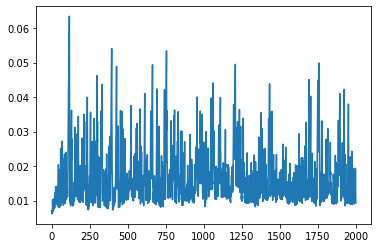

Weight value is  [[ 0.01777455  0.00692773 -0.0034375   0.02226274  0.02589803  0.0065946
   0.01068097  0.00437339  0.01894262  0.02861078 -0.01244417 -0.0019256
  -0.00431299  0.02854929  0.03068477 -0.00892302  0.00416214 -0.0032336
   0.01476304  0.03530539 -0.00357887 -0.00570319 -0.00289229  0.02147664
   0.02262021 -0.01141476  0.01478082  0.00429017  0.02780597  0.03201
  -0.00111621  0.03382281  0.00893503 -0.0188558  -0.0015452  -0.00165135
  -0.00943332  0.00403203  0.005227    0.0133306  -0.02126138  0.00880976
   0.0226891   0.00660621  0.00483583 -0.01295553  0.00348306  0.00985665
   0.04979272  0.00346247  0.02559003 -0.00813173 -0.00076158  0.0040818
   0.00291348  0.00121038 -0.00956475  0.02820573  0.01278843  0.00900972
   0.00532175]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


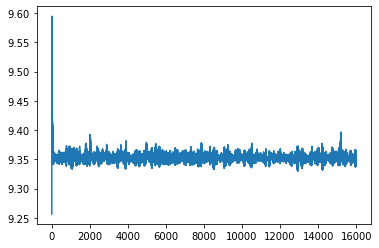

Weight value is  [[ 0.01243267  0.00599498 -0.00317741  0.00300671 -0.00330301 -0.00028772
  -0.00035069  0.00569401  0.01138177  0.00801324 -0.0012108  -0.00617275
   0.00063996  0.00722197 -0.00783178  0.00379339  0.00361545 -0.0026783
   0.00018481 -0.0095845  -0.00730975  0.00666841 -0.00711583  0.002715
   0.00664085 -0.0117596   0.00659043 -0.00218739  0.00545521 -0.00462779
   0.00260387 -0.00775634  0.00185903  0.00963834  0.00452407  0.00043602
   0.01178377  0.01208158 -0.01108316 -0.0087028   0.00055066 -0.00671753
  -0.00760633 -0.00837169  0.00786858 -0.00534922  0.00205724  0.01180088
   0.00978273 -0.00445186 -0.00618143 -0.00160358 -0.00705909 -0.00984871
   0.00400825 -0.00619746  0.00265206  0.00638101 -0.010615   -0.0012069
   0.00241628]] 

Accuracy is  0.5210084033613446 

Precision is  0.5192307692307693 

Classification Report is                precision    recall  f1-score   support

         0.0       0.53      0.14      0.22        58
         1.0       0.52  

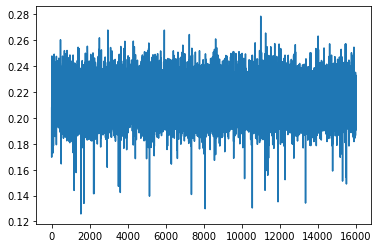

Weight value is  [[ 2.48207571e-02  3.89638381e-03  1.23320757e-02  1.88790963e-02
   7.69196840e-05  1.04425740e-02  2.92776726e-02  2.25075092e-02
  -2.24989548e-03  9.87521457e-03 -1.99470297e-03  1.29972990e-02
   4.95576154e-03  4.33724931e-03  1.58705265e-02  6.84492810e-03
   1.74055922e-02  4.59292385e-03  1.58335258e-03  8.04023559e-03
  -1.60076182e-03  2.38757804e-02  1.15488853e-02  7.27819458e-03
  -1.64452603e-03  8.68723764e-03  1.70717676e-02 -3.13729446e-03
   1.22871489e-02  4.67101193e-03  2.88774687e-03  7.31859693e-03
   2.10013464e-02  1.77130420e-02  1.33038373e-02  9.17221750e-03
   1.97450241e-02  1.94983739e-03  1.99426619e-02  9.03880516e-03
   1.80133037e-02  9.87480327e-03  1.20360783e-02  2.14338353e-02
   1.60400141e-02  8.83797824e-03  4.13887269e-03  2.11094727e-02
   2.39309137e-02  6.16629195e-03  2.38441352e-02  2.36773262e-02
   2.98274657e-02  5.66418475e-03  1.04094750e-02  2.18302870e-02
   5.62560586e-03  1.42519830e-02  7.32382501e-03  2.477277

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


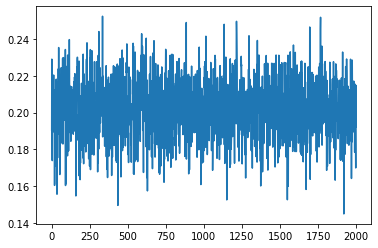

Weight value is  [[ 0.03110511  0.00943243  0.01006503  0.01302291  0.01193389  0.01352005
   0.01419356  0.00150326  0.00616211  0.01039999  0.00746932  0.01397247
   0.00811378 -0.00402266  0.00597828  0.00054494  0.01143897  0.0215196
   0.00704249  0.00483757  0.01221957  0.01189237  0.01161432  0.00408918
  -0.00438068  0.00635766  0.01450749  0.02486282  0.01808692 -0.00517863
   0.00569869  0.01195445  0.00743406  0.01324298  0.0125023   0.00383757
   0.01577895  0.01936611  0.02117101  0.01607893  0.01754237  0.04129746
   0.00614871  0.00338136  0.02639402  0.01979154  0.00930407 -0.00400571
   0.00893294  0.01862397 -0.00062685  0.01122765  0.01609571  0.02400471
   0.00830572  0.01051924  0.01243941  0.00108053  0.01584838  0.02838508
   0.02099171]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


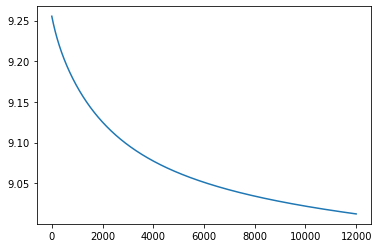

Weight value is  [[ 0.16408922  0.01641701  0.00786721  0.0433727  -0.32216116 -0.92138655
  -0.22285785  0.06336502  0.53549995  0.39840038  0.08359368 -0.11090787
  -0.00959939  0.30102964  0.1123732   0.28807543 -0.06870813  0.1339743
  -0.33650646  0.68071283 -0.20710876  0.09403555  0.003275    0.22583546
  -0.24637029  0.09105726 -0.03275634 -0.10644373  0.04373029 -0.20681226
  -0.17185118  0.49454269  0.4446555  -0.50695277 -0.06837453 -0.53706909
  -0.48069913 -0.67035203 -0.08049839  0.5109375   0.16740513 -0.23224116
  -0.3817487   0.98347663  0.34133301 -0.21785255 -0.22800422  0.375337
   0.44713258 -0.45393302  0.24065166 -0.01989934  0.16655316  0.29310893
  -0.68160269 -0.17605756  0.2189862   0.21255463 -0.50782749 -0.12857428
   0.22028591]] 

Accuracy is  0.5126050420168067 

Precision is  0.5211267605633803 

Classification Report is                precision    recall  f1-score   support

         0.0       0.50      0.41      0.45        58
         1.0       0.52 

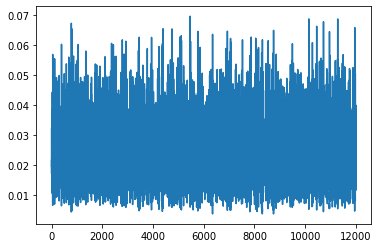

Weight value is  [[ 0.14149292  0.07102777  0.10126831  0.05712315 -0.23692105 -0.9765663
  -0.20156956  0.01413762  0.48886302  0.27258752 -0.02153018 -0.17910431
  -0.04878538  0.25057668  0.07641073  0.28914821  0.00497161  0.08939828
  -0.32942491  0.68388737 -0.12780194  0.06154295 -0.0215517   0.17980769
  -0.2362033   0.1783531  -0.00538584 -0.2018642  -0.00992903 -0.33858821
  -0.14157992  0.44253967  0.33993569 -0.68878325 -0.20109179 -0.71997804
  -0.47141767 -0.82281235 -0.07985369  0.44530184  0.14192252 -0.29624493
  -0.38332501  0.97213809  0.26661289 -0.25450299 -0.18434597  0.50611175
   0.40607686 -0.48758709  0.25748734 -0.07364278  0.08001082  0.0870373
  -0.79460606 -0.2560857   0.04533442  0.23820249 -0.58624032 -0.16003893
   0.35422832]] 

Accuracy is  0.4789915966386555 

Precision is  0.4 

Classification Report is                precision    recall  f1-score   support

         0.0       0.48      0.95      0.64        58
         1.0       0.40      0.03     

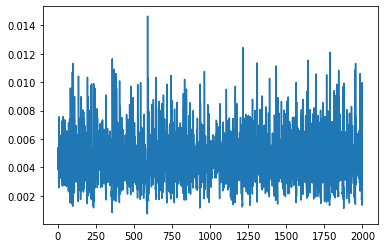

Weight value is  [[-0.01686761  0.04243827  0.1567057  -0.02298116 -0.13184002 -0.23981269
  -0.02978694  0.17797926  0.01781023  0.00359586 -0.09872367 -0.00917576
   0.03934179  0.02448769  0.09389028 -0.08518687 -0.03527321  0.13570349
  -0.19951565  0.23375124 -0.26304852 -0.09853354 -0.02191312  0.09421503
   0.01573085 -0.0435276   0.09569587 -0.00324455  0.01302853  0.08529312
  -0.17061023  0.21027154 -0.00096831 -0.06820096 -0.03690418 -0.32021096
   0.04300868 -0.11532226 -0.15656332  0.13828579  0.15955866  0.01628101
  -0.03759579  0.73031378  0.00818877 -0.11581461 -0.33046369  0.03232371
   0.40538346 -0.03376354  0.46282965 -0.22220165  0.17663598  0.0683485
  -0.3029079  -0.07870051  0.05343705  0.22277414 -0.06923127 -0.11009274
   0.11767726]] 

Accuracy is  0.5210084033613446 

Precision is  0.5172413793103449 

Classification Report is                precision    recall  f1-score   support

         0.0       0.67      0.03      0.07        58
         1.0       0.5

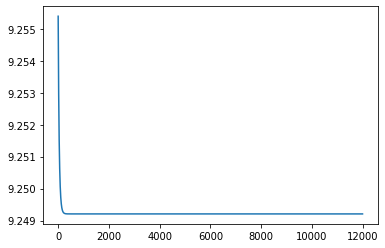

Weight value is  [[ 0.00011116 -0.0004807   0.00229315  0.00668297  0.0012941  -0.00473926
  -0.0004002   0.00444407  0.0095738   0.00579753  0.00014709 -0.00121046
   0.00261069  0.00582623  0.00338518  0.000251   -0.00140857  0.00296552
   0.00362148  0.00687039 -0.00158953 -0.00118257  0.00219431  0.00543884
   0.00143086 -0.00039063 -0.00235664  0.00060497  0.00434882  0.00167432
  -0.00202609  0.00086051  0.00118928 -0.0054019  -0.00107818 -0.00471271
  -0.01011659 -0.0090192  -0.00264897  0.00138968  0.00109468 -0.00537135
  -0.00594571  0.0129303   0.00089997 -0.00377974 -0.00684052  0.00068761
   0.00487728 -0.00247042  0.00308434 -0.00341253 -0.00119797  0.00427053
  -0.00370174 -0.00186222 -0.00149714  0.00184158 -0.00335764 -0.00108233
   0.00251263]] 

Accuracy is  0.44537815126050423 

Precision is  0.45454545454545453 

Classification Report is                precision    recall  f1-score   support

         0.0       0.44      0.48      0.46        58
         1.0       

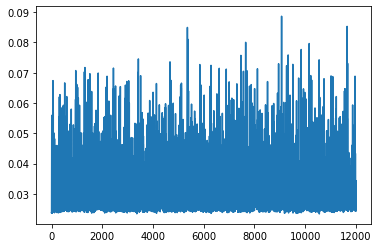

Weight value is  [[0.06802598 0.01944092 0.01722197 0.03297606 0.01975893 0.00196533
  0.01099411 0.02763701 0.03717056 0.03083347 0.00807428 0.0132566
  0.0207021  0.03411418 0.0256152  0.00567967 0.00509106 0.02670331
  0.02888633 0.03533566 0.00955138 0.01745946 0.03278729 0.04558707
  0.02323997 0.00965646 0.01561646 0.03783199 0.04564469 0.03002085
  0.01126307 0.02567867 0.0344968  0.02915513 0.05958154 0.0423555
  0.02728672 0.03359086 0.03142343 0.05842709 0.03269021 0.03717722
  0.03376931 0.03811799 0.05944794 0.03671384 0.02998894 0.03891529
  0.04434804 0.05917584 0.02992665 0.03344712 0.04242993 0.0402859
  0.05328256 0.017581   0.02763613 0.06042135 0.03703712 0.0561164
  0.04206661]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51      1.00      0.68        61

    accuracy                   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


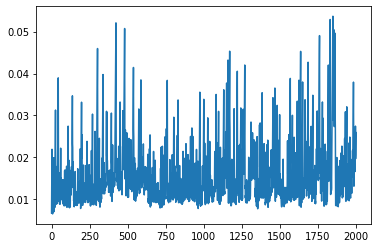

Weight value is  [[ 0.07243771  0.0299749   0.03847233  0.04806999  0.02892775  0.01658162
   0.01720109  0.05627813  0.03565723  0.03661016  0.02228774  0.06191829
   0.08068887  0.07679819  0.05031543  0.0428369   0.04068239  0.0657649
   0.04452464  0.04732047  0.02596751  0.0360612   0.05139088  0.04233742
   0.03560482  0.01050863  0.04698939  0.05337462  0.03728045  0.02568832
   0.01759208  0.0103013   0.02479454  0.01751672  0.05111166  0.06552915
  -0.0074934  -0.01425568  0.01664542  0.05370924  0.06185984  0.01300489
   0.00884514  0.01520909  0.05125991  0.05058454 -0.01373221  0.00517467
   0.02639682  0.05308035  0.02942816  0.00575058  0.03420124  0.04437839
   0.04531287  0.04175226 -0.01630507  0.02475277  0.04217991  0.05326844
   0.04151206]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


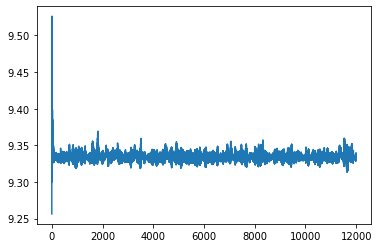

Weight value is  [[ 8.77121443e-03 -9.69104981e-03  7.46867490e-03  1.10880890e-02
  -1.00239551e-03 -1.09406808e-03  4.04504387e-03  5.41282634e-03
  -1.15227445e-03  1.11150800e-02  1.05585251e-03  2.65871067e-03
  -9.38878665e-03 -7.50538818e-04 -4.84421895e-03  5.00079346e-03
   1.52815352e-03 -8.42695321e-03  1.70843720e-03  4.86571763e-03
   4.33809791e-03 -2.65941754e-03  1.07746237e-02 -4.59540821e-03
   2.35107915e-03  4.79381479e-03 -7.29032866e-03  9.97020914e-03
  -1.01279159e-02  1.59120394e-03 -7.00490223e-03  9.49622496e-04
  -1.03601065e-02 -1.06447349e-02  4.90578093e-03 -2.97083526e-05
   1.07633719e-02 -5.26980006e-03  4.74698454e-03 -4.89909320e-03
   1.78543856e-03  6.49683269e-04  6.22623583e-03  3.36708191e-03
   1.13695953e-02 -1.05086201e-02 -2.63477853e-04  4.40635191e-03
   9.33627098e-03  2.48832335e-03 -2.39349512e-03  8.00267348e-03
  -8.44710626e-03 -2.13711000e-03  8.50891655e-03 -6.30630348e-03
  -4.09006104e-03 -3.81552434e-03  9.18399890e-03 -2.751556

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


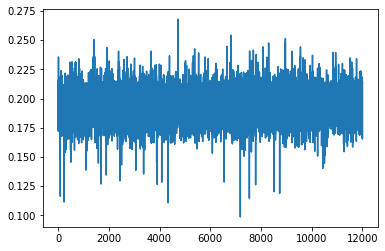

Weight value is  [[ 0.02414212  0.01334508  0.00592123  0.01182022  0.00343343 -0.00248245
   0.00690122  0.01832363  0.00168902  0.01422007 -0.00156894  0.01504089
   0.00912603  0.0113657   0.0258422  -0.00060239  0.00420845  0.01024389
   0.0134359   0.00666738 -0.00049912  0.02038077 -0.00286353  0.00370505
   0.00230663  0.01330595  0.01548901  0.01518657  0.01220137  0.01625133
   0.0108285   0.00719166  0.00934521  0.00988764  0.02600201  0.01490242
   0.00116021  0.00403287  0.00917814  0.01539382  0.01886104  0.00372821
   0.02314765  0.00276967  0.00895569  0.01096359  0.00525527  0.01880046
   0.01040466  0.00691916  0.01836881  0.00157585  0.02549918  0.00891894
   0.00269625  0.01055329  0.00713652  0.00856075  0.00685267  0.00652425
   0.01698706]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


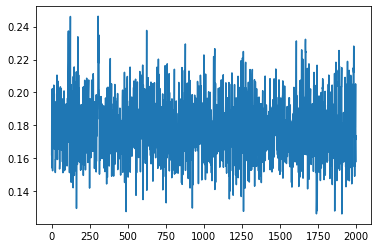

Weight value is  [[-0.02366393 -0.01735026 -0.02378573 -0.02818593 -0.01328274 -0.01136204
  -0.0151767  -0.00036837 -0.00554081 -0.00874902 -0.01450926 -0.00110153
  -0.01341227 -0.00714747 -0.00447766  0.00369383 -0.01242983 -0.00871648
  -0.011996   -0.01734679  0.0035851  -0.00280379 -0.00133678 -0.01133397
   0.00623255 -0.00200215 -0.00346227 -0.02386225 -0.02319298 -0.01350958
  -0.01267286 -0.00813718 -0.00344508 -0.00801855 -0.01624321 -0.02516887
  -0.01769122 -0.01034978 -0.00066996 -0.02333043 -0.02193903 -0.00025055
  -0.01361497 -0.00066637 -0.0161436  -0.01131684 -0.01159069 -0.01725878
   0.00128105 -0.01378345 -0.002257    0.00199245 -0.01206742 -0.00272916
  -0.01984595 -0.0093092  -0.0221935  -0.02084015 -0.00573346  0.00269742
  -0.01614784]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

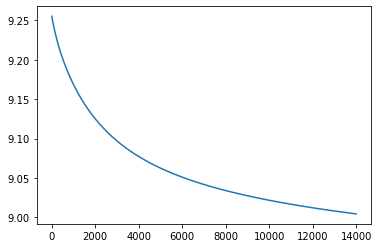

Weight value is  [[ 0.1982443   0.04198515  0.01963653  0.03060533 -0.3587613  -1.01423778
  -0.2554094   0.05186961  0.57051258  0.42935459  0.11588018 -0.12816265
  -0.01983548  0.32842887  0.11575416  0.33340634 -0.07492562  0.15580498
  -0.40727731  0.75041535 -0.22689714  0.10978129 -0.00298825  0.24170608
  -0.28450295  0.10758166 -0.02496037 -0.10373592  0.04279495 -0.24230473
  -0.17874243  0.51394675  0.46301006 -0.532283   -0.07787251 -0.57556732
  -0.4924066  -0.7013594  -0.08174001  0.5830082   0.17204887 -0.24500306
  -0.39631786  1.00232754  0.39548883 -0.21324419 -0.23378938  0.39586542
   0.46148001 -0.50850447  0.24488029 -0.01504775  0.1813049   0.3011463
  -0.75893249 -0.17460227  0.23452034  0.20665826 -0.53450882 -0.1337567
   0.22735447]] 

Accuracy is  0.5126050420168067 

Precision is  0.5211267605633803 

Classification Report is                precision    recall  f1-score   support

         0.0       0.50      0.41      0.45        58
         1.0       0.52

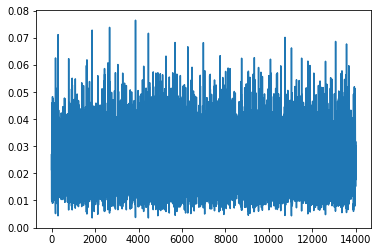

Weight value is  [[ 2.85599273e-01  3.63425508e-02  2.77875532e-02  3.64580795e-02
  -2.70334465e-01 -1.01804693e+00 -2.20473559e-01 -1.94710640e-02
   5.67570537e-01  4.79377317e-01  5.41085979e-02 -1.60493936e-01
  -1.63879581e-02  3.22501676e-01  1.22584802e-01  2.92963101e-01
  -7.08028499e-02  1.54333882e-01 -4.70303059e-01  7.75414052e-01
  -2.50707864e-01  8.98505125e-02  1.10437168e-01  2.70821619e-01
  -3.27785035e-01  6.98755966e-02 -1.16239529e-03 -5.13407928e-02
   1.06785691e-01 -2.34488440e-01 -1.40202892e-01  3.57653408e-01
   4.71820730e-01 -3.15321442e-01 -1.42516261e-02 -4.89353231e-01
  -6.98339797e-01 -7.54542646e-01 -1.07397458e-01  6.29821371e-01
   1.53666521e-01 -1.94676384e-01 -2.85637716e-01  1.26872243e+00
   4.68868443e-01 -2.25233822e-01 -2.48657506e-01  4.64715640e-01
   4.82042722e-01 -4.49643865e-01  3.61249930e-01  5.48789321e-02
   3.34581401e-01  2.91669759e-01 -6.70220542e-01 -1.50708150e-01
   2.49383109e-01  1.04035711e-01 -4.94365945e-01 -1.199701

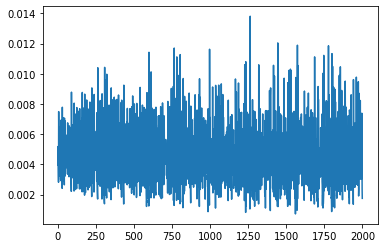

Weight value is  [[ 0.05541933  0.10970259  0.01094223  0.22288858 -0.00191105 -0.10163529
   0.05818794  0.20016523  0.33186395  0.23065089  0.2229427   0.09158206
   0.00867051  0.12593762 -0.05152758  0.1828681  -0.14583004 -0.05005711
  -0.00762729  0.09737183 -0.07674045 -0.13881202 -0.0433038   0.14594339
  -0.02954652 -0.02377167 -0.0569537   0.08199759  0.16822112 -0.01169812
  -0.08331191  0.45890376  0.1198245  -0.19832569 -0.05119282 -0.17483445
  -0.06306451 -0.3559329  -0.15170688  0.07751535  0.08156957  0.07976249
  -0.27093939  0.62006844 -0.01015829 -0.08947296 -0.18829638  0.16078427
   0.12574771 -0.06231194  0.09586197  0.00684746  0.1131517   0.27727178
  -0.012419    0.10068363  0.05718415  0.17612013  0.09198357  0.04885389
   0.02181024]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


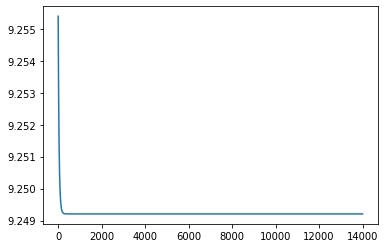

Weight value is  [[ 0.00011116 -0.0004807   0.00229315  0.00668297  0.0012941  -0.00473926
  -0.0004002   0.00444407  0.0095738   0.00579753  0.00014709 -0.00121046
   0.00261069  0.00582623  0.00338518  0.000251   -0.00140857  0.00296552
   0.00362148  0.00687039 -0.00158953 -0.00118257  0.00219431  0.00543884
   0.00143086 -0.00039063 -0.00235664  0.00060497  0.00434882  0.00167432
  -0.00202609  0.00086051  0.00118928 -0.0054019  -0.00107818 -0.00471271
  -0.01011659 -0.0090192  -0.00264897  0.00138968  0.00109468 -0.00537135
  -0.00594571  0.0129303   0.00089997 -0.00377974 -0.00684052  0.00068761
   0.00487728 -0.00247042  0.00308434 -0.00341253 -0.00119797  0.00427053
  -0.00370174 -0.00186222 -0.00149714  0.00184158 -0.00335764 -0.00108233
   0.00251263]] 

Accuracy is  0.44537815126050423 

Precision is  0.45454545454545453 

Classification Report is                precision    recall  f1-score   support

         0.0       0.44      0.48      0.46        58
         1.0       

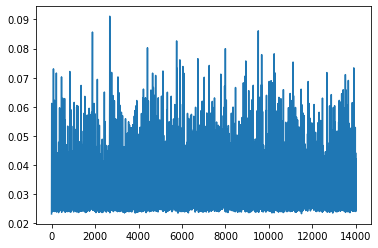

Weight value is  [[-5.49527511e-03  1.26272515e-02 -2.46776426e-03 -5.29406282e-03
  -5.00574006e-03 -4.79202107e-04  1.84856677e-02  4.41431844e-03
   5.36929644e-03  1.92049007e-03  3.32427063e-04 -5.88636086e-03
  -1.38578519e-02 -1.23576534e-02 -4.87216117e-03 -1.85651927e-03
   5.83347852e-03 -8.92403697e-03 -7.03233860e-03  2.28650896e-03
  -7.26545982e-03  4.06718196e-03 -1.02917109e-02 -5.43486673e-03
   4.16066061e-03  3.99527759e-03  9.74801533e-03 -9.07322641e-03
  -3.90393546e-03  2.30557581e-05  4.21864264e-03 -1.30561768e-02
  -5.75074756e-03 -8.60567346e-03 -4.79780984e-03 -1.39575460e-02
  -1.86186023e-02 -1.40704792e-02 -9.01270189e-03 -6.52717464e-03
  -4.56840102e-03 -1.19034384e-02 -7.68022404e-03  1.76568148e-02
  -3.31853496e-03  6.09412526e-03 -1.42102074e-02  3.25778683e-03
   1.04961906e-02 -7.72047952e-03  1.62448120e-02 -1.34420536e-02
  -9.96255548e-03  5.48791918e-03 -8.13267649e-03 -2.07447809e-03
  -4.52420518e-03 -5.27853695e-03 -1.17531688e-02 -9.448535

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

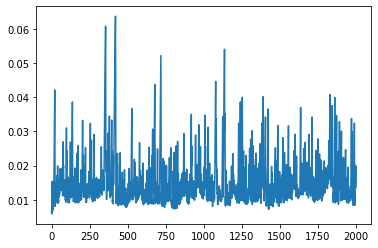

Weight value is  [[-0.0619122  -0.06178768 -0.02304495 -0.00243148 -0.01323609 -0.00536061
  -0.05519004 -0.03622472 -0.01689195 -0.01497341 -0.01944806 -0.05241802
  -0.00659507 -0.00208073 -0.01297614 -0.01745217 -0.05003628 -0.01865565
  -0.01279682 -0.02647907 -0.02052106 -0.04910532 -0.02503814 -0.00180317
  -0.03938289 -0.02042893 -0.03827244 -0.0227689  -0.00320208 -0.03150632
  -0.01029765 -0.00680977 -0.01600799 -0.02190108 -0.06143907 -0.05028568
  -0.03880629  0.00254312 -0.03107337 -0.06805754 -0.03113699 -0.04394662
  -0.03544683 -0.0389029  -0.05156313 -0.02462476 -0.01782994 -0.02508866
  -0.04097389 -0.05237152 -0.0121441   0.00802168 -0.02319529 -0.05174987
  -0.03797097  0.00662525 -0.02099815 -0.06279668 -0.07398932 -0.05392635
   0.01077743]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

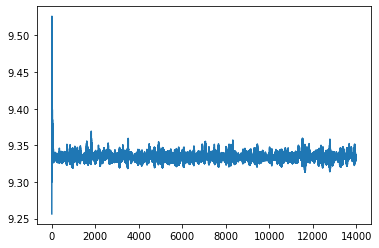

Weight value is  [[ 0.00440345 -0.00286012  0.01032366 -0.00462481 -0.00274657 -0.00879809
  -0.00894463 -0.00425173  0.00041694 -0.0110516  -0.0102798  -0.00739669
   0.00835204  0.00789026 -0.00393514 -0.00592589  0.00259232  0.00235915
   0.00020856  0.00744424  0.00120024  0.00539848  0.00561988  0.00676959
   0.00467402  0.0093672  -0.00792595  0.00048669 -0.00327942 -0.00729544
  -0.0083349  -0.00222741 -0.00200175 -0.00231793 -0.00944806  0.00199735
   0.00081846 -0.01083279  0.00098393  0.00164164 -0.00154629  0.00816718
   0.01054093 -0.00391837 -0.00183094 -0.00915794  0.0069049  -0.00623014
  -0.00492346 -0.00442027 -0.00292929 -0.00577038 -0.01040348  0.00419395
  -0.00893807 -0.00417632  0.00212814 -0.00141271  0.00641836  0.0079845
   0.00822713]] 

Accuracy is  0.47058823529411764 

Precision is  0.25 

Classification Report is                precision    recall  f1-score   support

         0.0       0.48      0.95      0.64        58
         1.0       0.25      0.02  

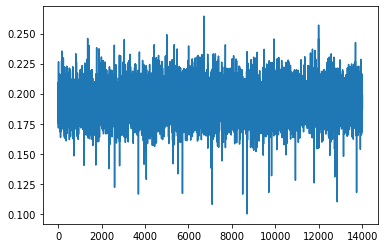

Weight value is  [[-5.01965196e-02 -8.19499267e-03 -1.34855730e-02  2.25694027e-03
   3.94417541e-03 -6.36091237e-03 -1.21588432e-02 -1.15167828e-02
   1.64126683e-03 -1.24538424e-02 -1.46674922e-03 -6.16904270e-03
  -5.34587862e-03 -3.94648079e-03 -7.09143824e-03 -1.28698538e-02
  -6.62652082e-03 -1.19933565e-02  5.63868395e-03 -1.56064606e-02
   4.05108119e-03 -3.88037582e-03  3.21282846e-03 -1.04814971e-02
  -8.07189695e-03  1.42887821e-03 -1.40507172e-03 -1.37064428e-05
  -6.46217313e-03 -1.10163042e-02 -9.55337262e-03 -5.81040440e-03
  -2.20575361e-02 -1.28612974e-02 -3.90068367e-02 -2.89898325e-02
   1.16803977e-03 -2.07956978e-02  1.27033630e-03 -4.15150449e-02
  -1.78097956e-02 -4.94399389e-03 -2.57118101e-02 -4.63737896e-03
  -2.56386055e-02 -1.70502872e-02 -1.24805480e-02 -1.37913747e-02
  -1.08663187e-03 -2.51172050e-02 -1.24995570e-02 -1.34062870e-02
  -1.90796143e-02 -2.20560087e-02 -3.75508454e-02 -1.19806758e-02
  -3.93059409e-03 -1.07483677e-02 -1.49686597e-02 -4.424230

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

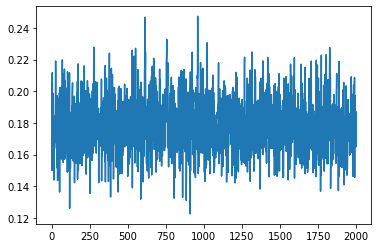

Weight value is  [[-1.59659650e-03  7.37171118e-03  4.61946663e-03 -1.24278393e-02
  -2.05240977e-02 -1.02202522e-02  3.64132245e-03 -1.42608262e-03
   4.39370644e-03 -1.93299490e-02 -1.80705578e-02 -1.44860836e-02
  -9.53591635e-03 -1.80745363e-02 -8.55064094e-03  1.54623079e-03
  -2.18971985e-02 -1.01175276e-02 -5.04857898e-03 -2.23051441e-02
   4.59221266e-05 -7.76734762e-03 -3.33456893e-03 -9.22885643e-03
  -1.50542735e-02 -5.89107458e-05 -2.06826661e-02 -3.30888857e-03
  -2.76333404e-03 -2.24998051e-02  5.67287613e-03 -2.43440911e-03
  -1.80260667e-02 -9.43790669e-03 -1.71617038e-02 -2.17683074e-02
  -1.27021417e-02 -1.65712294e-02 -2.06546618e-02 -1.09197417e-02
  -1.31181238e-02 -1.34126923e-02 -4.79928261e-03 -1.96541430e-02
  -3.01436895e-02 -1.86417907e-02 -2.57798333e-02 -1.58250784e-02
  -2.30285151e-02 -1.45739094e-02 -4.79851979e-03 -1.45070472e-02
  -5.69124515e-04 -2.11184104e-02 -1.13499527e-03 -1.59678420e-02
  -1.43457563e-03 -1.63518375e-02 -1.47385252e-02 -4.947332

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

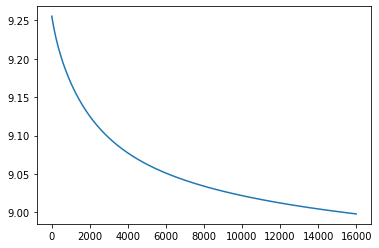

Weight value is  [[ 0.23206558  0.0675769   0.03334286  0.01915685 -0.39037421 -1.0978851
  -0.28657586  0.0396154   0.60272336  0.456359    0.14785138 -0.1458784
  -0.03115656  0.35363696  0.11864526  0.37425951 -0.08039253  0.17706988
  -0.47598249  0.81420103 -0.24650509  0.12395017 -0.01060957  0.25646422
  -0.31937293  0.12223898 -0.01754145 -0.10095358  0.04321755 -0.27600071
  -0.18475267  0.52835901  0.47582556 -0.55141776 -0.08875618 -0.60816003
  -0.50071466 -0.72482621 -0.08318575  0.65020525  0.17490434 -0.25519233
  -0.40724581  1.01491611  0.44680873 -0.20795944 -0.23887754  0.41182115
   0.4715215  -0.55968453  0.24772267 -0.01072733  0.19247172  0.3075473
  -0.82991308 -0.17182957  0.24621401  0.19955647 -0.55417642 -0.13700073
   0.23214747]] 

Accuracy is  0.5042016806722689 

Precision is  0.5138888888888888 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      0.40      0.44        58
         1.0       0.51 

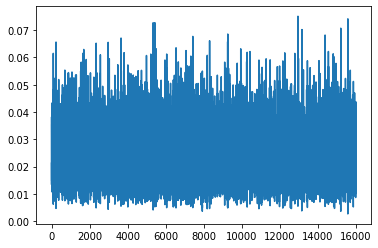

Weight value is  [[ 0.24567161 -0.01646289  0.1400617   0.07523004 -0.28201965 -1.19342193
  -0.36424635  0.25065173  0.72270424  0.54301907  0.27541183 -0.08138634
   0.0935479   0.40890317  0.15543919  0.23489772 -0.06104659  0.18521556
  -0.38259543  1.05564161 -0.25478866  0.15223642 -0.05197822  0.36084838
  -0.31686416  0.19224105  0.0406699  -0.15341347  0.17574755 -0.26154713
  -0.07827516  0.52177021  0.59298995 -0.54158734 -0.19113386 -0.71299767
  -0.56869316 -0.80670255 -0.13139943  0.7106199   0.0698485  -0.27021234
  -0.37300485  1.16593335  0.5684944  -0.3337536  -0.18271125  0.46693908
   0.47478318 -0.46376363  0.41217853  0.02395954  0.31232237  0.34472638
  -0.81557071 -0.14154146  0.22217406  0.21038357 -0.5513483  -0.03908796
   0.33913817]] 

Accuracy is  0.5126050420168067 

Precision is  0.5130434782608696 

Classification Report is                precision    recall  f1-score   support

         0.0       0.50      0.03      0.06        58
         1.0       0.

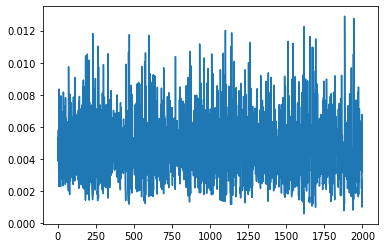

Weight value is  [[-0.06487884  0.12220066  0.02192227  0.02596268 -0.08699452 -0.44460765
  -0.08866669 -0.08305814  0.09168162  0.17275692 -0.24855161 -0.14139801
  -0.15764611  0.01051657  0.13756568 -0.3357551  -0.23029613 -0.10120396
  -0.04122298  0.29794224 -0.1994273  -0.09351735 -0.00962167  0.077922
   0.15046375 -0.10118554 -0.0163243   0.06742163  0.14684758  0.15844989
  -0.13235424  0.09060061 -0.14244208 -0.25788148 -0.16526613 -0.29062422
  -0.40947995 -0.30740533 -0.1963274   0.03213616  0.14150191 -0.07273803
   0.13154486  0.45333499 -0.01636947  0.10079916 -0.2487743   0.43852249
   0.02170511 -0.17645503  0.17761938 -0.15748602  0.12243235 -0.02466403
  -0.29040138 -0.01431845 -0.26326695  0.269774   -0.16885105 -0.06878637
   0.07769051]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

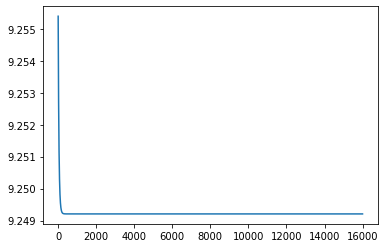

Weight value is  [[ 0.00011116 -0.0004807   0.00229315  0.00668297  0.0012941  -0.00473926
  -0.0004002   0.00444407  0.0095738   0.00579753  0.00014709 -0.00121046
   0.00261069  0.00582623  0.00338518  0.000251   -0.00140857  0.00296552
   0.00362148  0.00687039 -0.00158953 -0.00118257  0.00219431  0.00543884
   0.00143086 -0.00039063 -0.00235664  0.00060497  0.00434882  0.00167432
  -0.00202609  0.00086051  0.00118928 -0.0054019  -0.00107818 -0.00471271
  -0.01011659 -0.0090192  -0.00264897  0.00138968  0.00109468 -0.00537135
  -0.00594571  0.0129303   0.00089997 -0.00377974 -0.00684052  0.00068761
   0.00487728 -0.00247042  0.00308434 -0.00341253 -0.00119797  0.00427053
  -0.00370174 -0.00186222 -0.00149714  0.00184158 -0.00335764 -0.00108233
   0.00251263]] 

Accuracy is  0.44537815126050423 

Precision is  0.45454545454545453 

Classification Report is                precision    recall  f1-score   support

         0.0       0.44      0.48      0.46        58
         1.0       

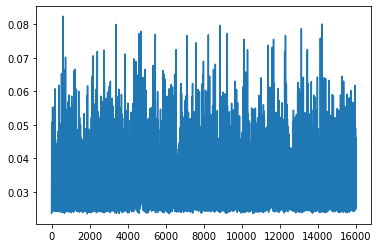

Weight value is  [[ 0.00604962 -0.01502504  0.00231745  0.01055109  0.00119657 -0.01211138
  -0.02067203  0.00220797  0.00921174  0.00841904 -0.0054651  -0.02777463
   0.01367914  0.01038651  0.00540582 -0.00525355 -0.02703538  0.00770024
   0.00534984  0.01387516  0.0014717  -0.02712663  0.01703839  0.01619107
   0.00360261 -0.00375378 -0.02231276  0.01892224  0.01861043  0.01173487
  -0.00495699 -0.00178605  0.02140104  0.01088215  0.00772923 -0.0019788
   0.00429383  0.01082931  0.01052367  0.00633041  0.00281891 -0.00446196
  -0.00080807  0.03220866  0.00434724  0.00019209  0.00595956  0.0063004
   0.01654885  0.00543736  0.01618897  0.00310481 -0.00553958  0.00805531
   0.00206788 -0.00893523  0.01917543  0.00302934  0.00930353 -0.00266022
  -0.00536301]] 

Accuracy is  0.5042016806722689 

Precision is  0.5084745762711864 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51

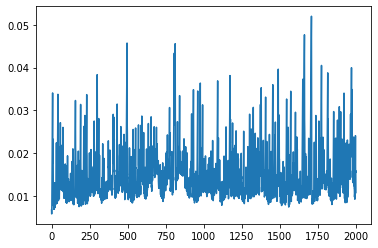

Weight value is  [[ 0.00688572  0.02308222  0.00748576 -0.00915849  0.00040716  0.0118014
  -0.002482    0.02364311  0.00554372  0.00134811  0.01838842 -0.0045993
   0.02070273 -0.02000371 -0.00886438  0.00822939 -0.00012096  0.03407796
   0.00721869  0.0085843   0.01527595  0.00115939  0.03701215 -0.00828515
   0.00377326  0.02152037  0.00186228  0.03518509  0.01251084  0.00608726
   0.02645525 -0.0123908   0.01801168 -0.00878172 -0.00253066  0.01208556
  -0.01901565 -0.00588609 -0.00423487  0.01228058  0.01187753  0.01887766
   0.00461904  0.04461397  0.00343175  0.01984384  0.00130251  0.01709823
   0.02002413  0.00837132  0.03572886 -0.00261898  0.03048309 -0.01633783
  -0.01381576  0.00701055  0.02050378  0.0192424  -0.03308942 -0.00351352
   0.02366871]] 

Accuracy is  0.5126050420168067 

Precision is  0.5126050420168067 

Classification Report is                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.51

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


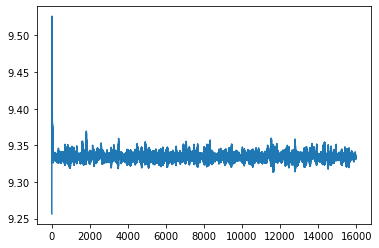

Weight value is  [[ 0.00640761  0.00578804 -0.00693286  0.00460149 -0.00275043  0.00703372
   0.00207462 -0.01086026  0.00418154 -0.00900582  0.00202671  0.00671172
   0.00690361 -0.00330539 -0.00090881  0.0070679   0.00530736 -0.00608268
   0.00102134 -0.01035235 -0.00076126 -0.00721079  0.00414228 -0.0011924
   0.00910877 -0.00750385 -0.00643712 -0.0048289   0.00676103  0.00842479
  -0.00834974 -0.00147199  0.01041227  0.01003899  0.00403175  0.00806587
  -0.00496548  0.00964174  0.00093864 -0.00899822 -0.00178132 -0.0028334
  -0.00456003 -0.00769742 -0.0096903  -0.00440871 -0.00451279  0.00806732
   0.00698641 -0.00623723 -0.00058427  0.00642212 -0.00957626 -0.00830993
   0.00146389  0.00127454 -0.01021541  0.00373691  0.00713061  0.00154398
   0.00912076]] 

Accuracy is  0.5462184873949579 

Precision is  0.5368421052631579 

Classification Report is                precision    recall  f1-score   support

         0.0       0.58      0.24      0.34        58
         1.0       0.54

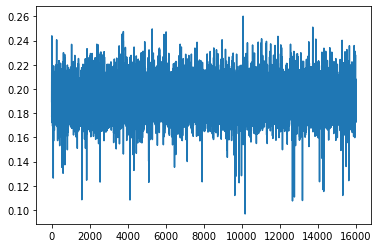

Weight value is  [[-0.02928184 -0.01657945 -0.00818922 -0.0184801  -0.01800975 -0.00085666
  -0.00743838 -0.0124829  -0.00640786 -0.00720093  0.00055841 -0.00206281
  -0.02013521 -0.01654549 -0.00949721  0.00092519 -0.01405167 -0.01375236
  -0.01527571 -0.02325424 -0.0003391  -0.00280555 -0.00768815 -0.01920635
  -0.00385739  0.00241055  0.00488907 -0.00907275 -0.01124254 -0.00388041
  -0.00323593 -0.018578   -0.00906936 -0.02164075 -0.01367203 -0.01671626
  -0.01770628 -0.00348035 -0.01579422 -0.01631324 -0.02106712 -0.01336111
  -0.015948   -0.01597959 -0.01328111 -0.02753243 -0.01198221  0.00377659
  -0.0196553  -0.01494712 -0.01205203 -0.01279191 -0.00210013 -0.02341647
  -0.03038918 -0.00968145 -0.01337016  0.00127391 -0.00693811 -0.023818
  -0.01365545]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

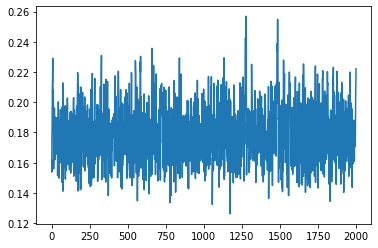

Weight value is  [[-0.05446284 -0.00398203  0.00067057  0.00218045 -0.00639509  0.00418701
  -0.00761767 -0.01067711 -0.00421478 -0.00819655 -0.00561975  0.00302491
  -0.01090907 -0.01612363 -0.00977938 -0.01173283 -0.01049956 -0.01176448
   0.00342929 -0.00402247 -0.01466858 -0.01072697  0.00087911 -0.01334549
  -0.01909948  0.00222633  0.00270554  0.00775441 -0.015718   -0.00948857
   0.00196869 -0.02880687 -0.01394231 -0.02513772 -0.03788563 -0.0292188
  -0.01374696 -0.01613311 -0.02444406 -0.03642771 -0.01128195 -0.01297606
  -0.02438268 -0.00936485 -0.03681214 -0.02814626 -0.00821642 -0.01044906
  -0.03079675 -0.02618422 -0.01883693 -0.0071467  -0.03065892 -0.0170013
  -0.04887778 -0.02579248 -0.02202976 -0.01923809 -0.01987382 -0.03004935
  -0.01970689]] 

Accuracy is  0.48739495798319327 

Precision is  0.0 

Classification Report is                precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        58
         1.0       0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

In [35]:
batch_size = 5
n_epochs = 2000
for i in range (0,3):
  alpha = alphaoptions[i]
  for j in range (0,3):
    lamb = lamboptions[j]
    for k in range (0,3):
          iters = iterationsoptions[k]
          print("For alpha value ",alpha,", lambda value ",lamb,", ",iters," iterations, ",n_epochs," epochs and/or ",batch_size," batch size we get the following error and correlation values.\n")
          print("For Logistic Regression with Batch Gradient Descent. \n")
          LOR_BGD(alpha,iters)
          print("For Logistic Regression with Mini Batch Gradient Descent. \n")
          LOR_MBGD(alpha,iters,batch_size)
          print("For Logistic Regression with Stochastic Gradient Descent. \n")
          LOR_SGD(alpha,n_epochs)
          print("For Logistic Regression with Batch Gradient Descent and L2 Norm Regularisation. \n")
          LOR_L2_BGD(alpha,iters,lamb)
          print("For Logistic Regression with Mini Batch Gradient Descent and L2 Norm Regularisationn. \n")
          LOR_L2_MBGD(alpha,iters,batch_size,lamb)
          print("For Logistic Regression with Stochastic Gradient Descent and L2 Norm Regularisation. \n")
          LOR_L2_SGD(alpha,n_epochs,lamb)
          print("For Logistic Regression with Batch Gradient Descent and L1 Norm Regularisation. \n")
          LOR_L1_BGD(alpha,iters,lamb)
          print("For Logistic Regression with Mini Batch Gradient Descent and L1 Norm Regularisatio. \n")
          LOR_L1_MBGD(alpha,iters,batch_size,lamb)
          print("For Logistic Regression with Stochastic Gradient Descent and L1 Norm Regularisation. \n")
          LOR_L1_SGD(alpha,n_epochs,lamb)